# Classifiying Neutrinos In A Long Base-Line Neutrino Oscillation Experiment

### Rishi Kalra

#### Student Number: 20004926

## Contents
1. [Introduction](#introduction)
2. [Theory](#theory)
3. [Pre-Processing Data](#preprocessing)
4. [Task 1: CC-event Classifier](#task1)
5. [Task 2: Testing & Efficiency Investigation](#task2)
6. [Extension 1: Neutrino Energy](#nuenergy)
7. [Extension 2: Neutrino Flavour](#nuflavour)
8. [Extension 3: $y$ = lepton energy over neutrino energy](#)
9. [Extension 4: No. of protons or pions](#)
10. [Extension 5: Interaction mode](#)
11. [Overall Conclusion](#)

In [ ]:
# Import data stuff
import h5py
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import os

# import the urllib library
import urllib.request

# Import tensorflow stuff
import tensorflow as tf 
from tensorflow import keras
from keras.optimizers import Adam

# Import metrics stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score

# Import model stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Dense, Flatten, Dropout, SpatialDropout2D, SeparableConv2D, LeakyReLU
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
import tensorflow.keras.regularizers as regularizers
from tensorflow.keras.regularizers import L1L2

# More model stuff
from keras.backend import pool3d
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input, BatchNormalization
from keras.layers import Concatenate
from keras.models import Model
from keras.optimizers import Adamax
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping

# Install some extra libraries (if you wish)
!pip install ann_visualizer
!pip install visualkeras
# For visualisation
import visualkeras
from ann_visualizer.visualize import ann_viz

# To visualise models
from keras.utils import plot_model


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4179 sha256=ad08ef4f81e72630033f17c3e536c85fb6751188eaf2e3ec4e2545c778c951cf
  Stored in directory: /root/.cache/pip/wheels/2d/d8/86/67f4a249969eaaa31c6df569f4ebfa84634fae3af2c627107b
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 29.7 MB/s eta 0:00:00


In [ ]:
import enum
class Interaction(enum.Enum):
    kNumuQE =0           # Numu CC QE interaction
    kNumuRes =1           # Numu CC Resonant interaction
    kNumuDIS = 2          # Numu CC DIS interaction
    kNumuOther = 3        # Numu CC, other than above
    kNueQE = 4            # Nue CC QE interaction
    kNueRes = 5           # Nue CC Resonant interaction
    kNueDIS = 6           # Nue CC DIS interaction
    kNueOther = 7         # Nue CC, other than above
    kNutauQE = 8          # Nutau CC QE interaction
    kNutauRes = 9         # Nutau CC Resonant interaction
    kNutauDIS =10         # Nutau CC DIS interaction
    kNutauOther =11       # Nutau CC, other than above
    kNuElectronElastic = 12# NC Nu On E Scattering
    kNC =13                # NC interaction
    kCosmic =14           # Cosmic ray background
    kOther =15            # Something else.  Tau?  Hopefully we don't use this
    kNIntType=16          # Number of interaction types, used like a vector size

    
class FinalState(enum.Enum):
    kNumu0tr0sh=0          # Numu CC - no track no shower
    kNumu0tr1sh=1          # Numu CC - no track  1 shower
    kNumu0tr2sh=enum.auto()          # Numu CC - no track  2 shower
    kNumu0trMsh=enum.auto()          # Numu CC - no track 3+ shower
    kNumu1tr0sh=enum.auto()          # Numu CC -  1 track no shower
    kNumu1tr1sh=enum.auto()          # Numu CC -  1 track  1 shower
    kNumu1tr2sh=enum.auto()          # Numu CC -  1 track  2 shower
    kNumu1trMsh=enum.auto()          # Numu CC -  1 track 3+ shower
    kNumu2tr0sh=enum.auto()          # Numu CC -  2 track no shower
    kNumu2tr1sh=enum.auto()          # Numu CC -  2 track  1 shower
    kNumu2tr2sh=enum.auto()          # Numu CC -  2 track  2 shower
    kNumu2trMsh=enum.auto()          # Numu CC -  2 track 3+ shower
    kNumuMtr0sh=enum.auto()          # Numu CC - 3+ track no showe
    kNumuMtr1sh=enum.auto()          # Numu CC - 3+ track  1 shower
    kNumuMtr2sh=enum.auto()          # Numu CC - 3+ track  2 showe
    kNumuMtrMsh=enum.auto()          # Numu CC - 3+ track 3+ shower
    kNue0tr0sh=enum.auto()           # Nue CC - no track no shower
    kNue0tr1sh=enum.auto()           # Nue CC - no track  1 shower
    kNue0tr2sh=enum.auto()           # Nue CC - no track  2 showe
    kNue0trMsh=enum.auto()           # Nue CC - no track 3+ shower
    kNue1tr0sh=enum.auto()           # Nue CC -  1 track no shower
    kNue1tr1sh=enum.auto()           # Nue CC -  1 track  1 shower
    kNue1tr2sh=enum.auto()           # Nue CC -  1 track  2 shower
    kNue1trMsh=enum.auto()           # Nue CC -  1 track 3+ shower
    kNue2tr0sh=enum.auto()           # Nue CC -  2 track no shower
    kNue2tr1sh=enum.auto()           # Nue CC -  2 track  1 shower
    kNue2tr2sh=enum.auto()           # Nue CC -  2 track  2 shower
    kNue2trMsh=enum.auto()           # Nue CC -  2 track 3+ shower
    kNueMtr0sh=enum.auto()           # Nue CC - 3+ track no shower
    kNueMtr1sh=enum.auto()           # Nue CC - 3+ track  1 shower
    kNueMtr2sh=enum.auto()           # Nue CC - 3+ track  2 shower
    kNueMtrMsh=enum.auto()           # Nue CC - 3+ track 3+ shower
    kNC0tr0sh=enum.auto()           # NC CC - no track no shower
    kNC0tr1sh=enum.auto()           # NC CC - no track  1 shower
    kNC0tr2sh=enum.auto()           # NC CC - no track  2 shower
    kNC0trMsh=enum.auto()           # NC CC - no track 3+ shower
    kNC1tr0sh=enum.auto()           # NC CC -  1 track no shower
    kNC1tr1sh=enum.auto()           # NC CC -  1 track  1 shower
    kNC1tr2sh=enum.auto()           # NC CC -  1 track  2 shower
    kNC1trMsh=enum.auto()           # NC CC -  1 track 3+ shower
    kNC2tr0sh=enum.auto()           # NC CC -  2 track no shower
    kNC2tr1sh=enum.auto()           # NC CC -  2 track  1 shower
    kNC2tr2sh=enum.auto()           # NC CC -  2 track  2 shower
    kNC2trMsh=enum.auto()           # NC CC -  2 track 3+ shower
    kNCMtr0sh=enum.auto()           # NC CC - 3+ track no shower
    kNCMtr1sh=enum.auto()           # NC CC - 3+ track  1 shower
    kNCMtr2sh=enum.auto()           # NC CC - 3+ track  2 shower
    kNCMtrMsh=enum.auto()           # NC CC - 3+ track 3+ shower
    kCosmicFS=enum.auto()           # Cosmic ray background
    kOtherFS=enum.auto()            # Something else.  Tau?  Hopefully we don't use this
    kNFStType=enum.auto()            # Number of interaction types, used like a vector size



## Introduction

This project will use meta-data on simulated neutrino events, similar to those detected within the NoVA experiment to identify $\nu_{\mu}$ charged-current events. The affect of different meta-data on the performance of this classifier will be investigated. Further extensions to this project such as a regression model to identify neutrino energy and a multiple classification model have been implemented with reasonable accuracy.

## Theory

Neutrinos are electrically-neutral and almost massless particles that belong to the lepton family, similar to electrons. There are three types of neutrinos, each paired with a charged lepton: electron, muon, and tau. Neutrinos cannot be detected directly as they are neutral, but their interactions with material in a detector can be used to detect them.

Neutrinos interact with matter through the weak force, and their interactions can be either neutral current (mediated by the boson) or charged current (mediated by the boson). In CC interactions, the interacting neutrino transforms into its lepton partner, while NC interactions leave the neutrino unchanged. These interactions can be elastic, quasi-elastic, resonant, or deep-inelastic.

---

### Functions

Below, some useful helper functions have been defined.

In [ ]:
def make_dictionary(data):
    """
    This function creates a dictionary to store data associated with each key within the 'neutrino' group.
    
    Args:
    data (h5py file): A file object containing the data.
    
    Returns:
    A dictionary with keys representing the different datasets and values representing the data associated with each key.
    """
  
    # Store the data in df
    df = data
  
    # Get the keys within the 'neutrino' group
    keys = list(df['neutrino'].keys())

    # Create an empty dictionary to store the data associated with each key
    data_dict = {}

    # Loop over the keys and extract the data
    for key in keys:
        data = df['neutrino'][key][()]
        data_dict[key] = data
        
    # Extract the data associated with the 'cvnmap' key
    cvnmap_data = df['cvnmap'][()]
    data_dict['cvnmap'] = cvnmap_data

    return data_dict

def get_datasets(start=1, stop=5):
  """
  Retrieves multiple datasets from a URL and converts them into dictionaries with the same keys.

  Args:
      no_of_datasets (int): The number of datasets to retrieve (default is 5).

  Returns:
      list of dict: A list of dictionaries, where each dictionary represents a single dataset and has the same keys.
  """
  # Initialise an empty list to store the dictionaries
  data_dicts = []

  # Loop over the range of dataset numbers
  for i in range(start, stop + 1):
      # Retrieve the dataset from the URL
      urllib.request.urlretrieve('http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/nova/neutrino'+str(i)+'.h5', 
                                  'neutrino'+str(i)+'.h5')

      # Open the dataset
      data = h5py.File('neutrino'+str(i)+'.h5','r')

      # Convert the dataset to a dictionary
      data_dict = make_dictionary(data)

      # Append the dictionary to the list
      data_dicts.append(data_dict)
    
        # Close the dataset
      data.close()

      # Delete the dataset file to save disk space
      os.remove('neutrino'+str(i)+'.h5')

  # Return the list of dictionaries
  return data_dicts


def combine_dicts(dicts):
    """
    Combines a list of dictionaries with the same keys by concatenating the values for each key.

    Args:
        dicts (list of dict): A list of dictionaries with the same keys.

    Returns:
        dict: A new dictionary with the same keys as the input dictionaries and concatenated values for each key.
    """
    # Create an empty dictionary to store the combined values
    combined_dict = {}

    # Iterate over the keys of the first dictionary in the list
    for key in dicts[0]:
        # Create a new entry in the combined dictionary for the current key with an empty list as the value
        combined_dict[key] = []

        # Iterate over all dictionaries in the input list and concatenate the values for the current key
        for d in dicts:
            combined_dict[key].extend(d[key])

    # Return the combined dictionary
    return combined_dict


def extract_metadata(data_dict, interaction_only=True):
  '''
    This function extract_metadata takes a data_dict as input and extracts metadata from it.

  Args:

      data_dict: a dictionary containing data in the form of numpy arrays.

  Optional Args:

      interaction_only: a boolean indicating whether to only return the "interaction" metadata or all the metadata. Defaults to True.

  Returns:

      If interaction_only is True, the function returns the "interaction" metadata as a numpy array.
      If interaction_only is False, the function returns all the metadata as separate numpy arrays in the following order: 
      cycle, evt, finalstate, finalstateprong, interaction, lepenergy, nuenergy, parent, particles, 
      rec_training_idx, run, subevt, subrun, vtxx, vtxy, vtxz.
  '''

  # Initialise metadata array
  metadata = []

  # Get the data from dictionary to separate arrays
  for key in data_dict.keys():
    arr = np.array(data_dict.get(key))
    metadata.append(arr)

  # Turn to np array
  #metadata = np.array(metadata)

  # Array for each metadata
  cycle = metadata[0]
  evt = metadata[1]
  finalstate = metadata[2]
  finalstateprong = metadata[3]
  interaction = metadata[4]
  lepenergy = metadata[5]
  nuenergy = metadata[6]
  parent = metadata[7]
  particles = metadata[8]
  rec_training_idx = metadata[9]
  run = metadata[10]
  subevt = metadata[11]
  subrun = metadata[12]
  vtxx = metadata[13]
  vtxy = metadata[14]
  vtxz = metadata[15]
  cvnmap = metadata[16]

  # If we only want interaction data
  if interaction_only == True:
    return interaction, cvnmap

  # If we want everything
  else:
    return cycle, evt, finalstate, finalstateprong, interaction, lepenergy, nuenergy, parent, particles, rec_training_idx, run, subevt, subrun, vtxx, vtxy, vtxz, cvnmap

    

def get_cc_event_labels(interaction):
  '''
  This function get_cc_event_labels takes an "interaction" metadata as input and returns a boolean array with the same 
  shape as the input array.

  Args:

    interaction: a numpy array containing the "interaction" metadata.

  Returns:

    vmucc_event: a boolean array with the same shape as interaction where the value is True if the corresponding value in 
    interaction is 0, 1, 2, or 3, and False otherwise.
  '''

  # create a boolean array of the same shape as interaction
  vmucc_event = np.zeros_like(interaction, dtype=bool)

  # set the values in vmucc_event to True if the corresponding value in interaction is 0, 1, 2, or 3
  vmucc_event[(interaction == 0) | (interaction == 1) | (interaction == 2) | (interaction == 3)] = True

  # Arr of labels
  return vmucc_event



def get_data_and_labels(start=1, stop=5, metadata_type='interaction'):
    """
    This function retrieves data and labels from multiple neutrino datasets and returns them as arrays.
    
    Args:
    start (int): The index of the first dataset to retrieve.
    stop (int): The index of the last dataset to retrieve.
    
    Returns:
    Two arrays containing the data and labels respectively.
    """
  
    # Get dictionaries for each dataset and combine them
    data_dicts = get_datasets(start, stop)
    combined_dict = combine_dicts(data_dicts)

    # Extract interactions and cvnmap from the combined dictionary
    pre_labels, cvnmap = extract_metadata1(combined_dict, metadata_type=metadata_type)

    # Reshape cvnmap into a 4D array
    data = cvnmap.reshape(len(cvnmap), 100, 80, 2)

    if metadata_type == 'interaction':
        
        # Get labels from the interactions data
        labels = get_cc_event_labels(pre_labels)
        return data, labels

        
    else:
        return data, pre_labels
    
    

def image_generator(event_imgs, vmucc_event):
    """
    This generator yields batches of image arrays and their corresponding labels (vmucc_event).
    
    Args:
    event_imgs (numpy array): An array of image data.
    vmucc_event (numpy array): An array of labels.
    
    Yields:
    A tuple of image arrays and their corresponding labels (vmucc_event).
    """
    
    # Loop through the event images and labels
    for i in range(len(event_imgs)):
        # Yield the current image and label
        yield (event_imgs[i], vmucc_event[i])


def percentage_true(array):
    """
    This function calculates the percentage of values in an array that are 'True'.

    Args:
    array (numpy array): A numpy array.

    Returns:
    A float representing the percentage of values in the array that are 'True'.
    """

    # Count the number of 'True' values in the array
    num_true = np.sum(array)

    # Calculate the total number of values in the array
    total = array.size

    # Calculate the percentage of 'True' values in the array
    percentage = (num_true / total) * 100

    return percentage

def half_split(data, labels):
    ''' Ensures the arrays have equal class distributions.
    
    Input:
        data   - Data array containg images 
        labels - Corresponding class labels for images

    Return:
        half_data   - Data array containg images of equal class distribution  
        half_labels - Corresponding class labels for images of equal class distribution
    
    '''
    # Combine data and labels into one array
    combined = list(zip(data, labels))

    # Create dictionary with class labels as keys and corresponding data as values
    classes = {}
    for i in range(len(combined)):
        label = tuple(combined[i][1])
        if label not in classes:
            classes[label] = []
        classes[label].append(combined[i][0])

    # Random shuffle of data
    for key in classes:
        np.random.shuffle(classes[key])
    
    # Find size of smallest class
    N = np.min([len(classes[key]) for key in classes])
    
    # List comprehension to equally join each classes back to one array
    half_data   = np.array([ i for group in list(classes.values()) for i in group[:N] ])
    half_labels = np.array([ [k] for i in list(classes.keys()) for k in [i]*N ])
    
    # Randomly shuffle arrays, preserving labeling
    p = np.random.permutation(len(half_labels))
    half_data   = half_data[p]
    half_labels = half_labels[p]
    
    return half_data, half_labels



def extract_metadata2(data_dict):
    
    # Get the data from dictionary to separate arrays
    metadata = [np.array(data_dict.get(key)) for key in data_dict.keys()]
    
    return metadata



def extract_metadata1(data_dict, metadata_type='interaction'):
    '''
    This function extract_metadata takes a data_dict as input and extracts metadata from it.

    Args:
        data_dict: a dictionary containing data in the form of numpy arrays.

    Optional Args:
        interaction_only: a boolean indicating whether to only return the "interaction" metadata or all the metadata. 
            Defaults to True.
        metadata_type: a string indicating which metadata array to extract. If interaction_only is True, 
            this argument is ignored. Defaults to 'interaction'.

    Returns:
        If interaction_only is True, the function returns the "interaction" metadata as a numpy array.
        If interaction_only is False and metadata_type is not specified, the function returns all the metadata 
            as separate numpy arrays in the following order: cycle, evt, finalstate, finalstateprong, interaction, 
            lepenergy, nuenergy, parent, particles, rec_training_idx, run, subevt, subrun, vtxx, vtxy, vtxz, cvnmap.
        If interaction_only is False and metadata_type is specified, the function returns the specified metadata 
            array as a numpy array.
    '''

    # Get the data from dictionary to separate arrays
    metadata = [np.array(data_dict.get(key)) for key in data_dict.keys()]

    # If we want a specific array
    if metadata_type == 'interaction':
        return metadata[4], metadata[16]
    elif metadata_type == 'cycle':
        return metadata[0], metadata[16]
    elif metadata_type == 'evt':
        return metadata[1], metadata[16]
    elif metadata_type == 'finalstate':
        return metadata[2], metadata[16]
    elif metadata_type == 'finalstateprong':
        return metadata[3], metadata[16]
    elif metadata_type == 'lepenergy':
        return metadata[5], metadata[16]
    elif metadata_type == 'nuenergy':
        return metadata[6], metadata[16]
    elif metadata_type == 'parent':
        return metadata[7], metadata[16]
    elif metadata_type == 'particles':
        return metadata[8], metadata[16]
    elif metadata_type == 'rec_training_idx':
        return metadata[9], metadata[16]
    elif metadata_type == 'run':
        return metadata[10], metadata[16]
    elif metadata_type == 'subevt':
        return metadata[11], metadata[16]
    elif metadata_type == 'subrun':
        return metadata[12], metadata[16]
    elif metadata_type == 'vtxx':
        return metadata[13], metadata[16]
    elif metadata_type == 'vtxy':
        return metadata[14], metadata[16]
    elif metadata_type == 'vtxz':
        return metadata[15], metadata[16]


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, test_data, test_labels, pre_test_data, pre_test_labels):
    # Flatten and convert the labels to float
    y_label = test_labels.flatten().astype(float)
    y_label_pre = pre_test_labels.flatten().astype(float)

    # Obtain predicted probabilities
    y_pred = model.predict(test_data).flatten()
    y_pred_pre = model.predict(pre_test_data).flatten()

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_label, y_pred)
    fpr_pre, tpr_pre, thresholds_pre = roc_curve(y_label_pre, y_pred_pre)

    # Compute the area under the ROC curve
    roc_auc = auc(fpr, tpr)
    roc_auc_pre = auc(fpr_pre, tpr_pre)

    # Plot the ROC curve for each test set
    plt.plot(fpr, tpr, label='ROC curve (50/50) (AUC = %0.5f)' % roc_auc)
    plt.plot(fpr_pre, tpr_pre, label='ROC curve (88/12) (AUC = %0.5f)' % roc_auc_pre)

    # Plot the random guessing line
    plt.plot([0, 1], [0, 1], 'k--')

    # Set axis limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')

    # Add legend
    plt.legend(loc="lower right")

    # Show the plot
    plt.show()
    
    
    
def plot_training_history(history):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the training and validation loss
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Training', 'Validation'], loc='upper right')

    # Plot the training and validation accuracy
    ax2.plot(history.history['binary_accuracy'])
    ax2.plot(history.history['val_binary_accuracy'])
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Training', 'Validation'], loc='lower right')

    plt.show()

'''def model_metrics(history, model, test_data, test_labels, pre_test_data, pre_test_labels):
    print('50/50 Test Set')
    print('--------------------------------------------------------------------------------------------------')
    test_loss, test_acc = model.evaluate(test_data,test_labels)
    print()
    print('88/12 Test Set')
    print('--------------------------------------------------------------------------------------------------')
    test_loss2, test_acc2 = model.evaluate(pre_test_data, pre_test_labels)
    print()
    plot_training_history(history)
    print()
    plot_roc_curve(model, test_data, test_labels, pre_test_data, pre_test_labels)'''

def model_metrics(history, model, test_data, test_labels, pre_test_data, pre_test_labels):
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))

    # First plot: training history
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model Loss')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Training', 'Validation'], loc='upper right')

    # Second plot: training and validation accuracy
    axs[1].plot(history.history['binary_accuracy'])
    axs[1].plot(history.history['val_binary_accuracy'])
    axs[1].set_title('Model Accuracy')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Training', 'Validation'], loc='lower right')

    # Third plot: ROC curve
    # Flatten and convert the labels to float
    y_label = test_labels.flatten().astype(float)
    y_label_pre = pre_test_labels.flatten().astype(float)

    # Obtain predicted probabilities
    y_pred = model.predict(test_data).flatten()
    y_pred_pre = model.predict(pre_test_data).flatten()

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_label, y_pred)
    fpr_pre, tpr_pre, thresholds_pre = roc_curve(y_label_pre, y_pred_pre)

    # Compute the area under the ROC curve
    roc_auc = auc(fpr, tpr)
    roc_auc_pre = auc(fpr_pre, tpr_pre)

    axs[2].plot(fpr, tpr, label='ROC curve (50/50) (AUC = %0.5f)' % roc_auc)
    axs[2].plot(fpr_pre, tpr_pre, label='ROC curve (88/12) (AUC = %0.5f)' % roc_auc_pre)
    axs[2].plot([0, 1], [0, 1], 'k--')
    axs[2].set_xlim([0.0, 1.0])
    axs[2].set_ylim([0.0, 1.05])
    axs[2].set_xlabel('False Positive Rate')
    axs[2].set_ylabel('True Positive Rate')
    axs[2].set_title('Receiver Operating Characteristic (ROC)')
    axs[2].legend(loc="lower right")

    plt.show()
    
    print('50/50 Test Set')
    print('--------------------------------------------------------------------------------------------------')
    test_loss, test_acc = model.evaluate(test_data,test_labels)
    print()
    print('88/12 Test Set')
    print('--------------------------------------------------------------------------------------------------')
    test_loss2, test_acc2 = model.evaluate(pre_test_data, pre_test_labels)
    
def plot_confusion_matrix(model, test_data, test_labels, pre_test_data, pre_test_labels):
    # Labels and predictions
    y_true = test_labels.flatten().astype(int)
    y_pred = np.rint(model.predict(test_data)).astype(int)

    # Assume you have already trained and evaluated your model
    y_true_pre = pre_test_labels.flatten().astype(int)
    y_pred_pre = np.rint(model.predict(pre_test_data)).astype(int)

    # Generate the confusion matrix
    confusion_mtx = confusion_matrix(y_true, y_pred)
    confusion_mtx_pre = confusion_matrix(y_true_pre, y_pred_pre)

    print('50/50 Test Set Confusion Matrix')
    print(confusion_mtx)
    print('88/12 Test Set Confusion Matrix')
    print(confusion_mtx_pre)

    # Extract true positive, false positive, true negative, false negative
    tp, fp, tn, fn = confusion_mtx.ravel()
    tp_pre, fp_pre, tn_pre, fn_pre = confusion_mtx_pre.ravel()

    # Create labels for the plot
    labels = ['TP', 'FP', 'FN', 'TN']

    # Create a figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the 50/50 test set results
    ax1.bar(labels, [tp, fp, tn, fn], label='50/50 Test Set')
    ax1.set_title('Confusion Matrix (50/50 Set)')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('Count')
    ax1.legend()

    # Plot the 88/12 test set results
    ax2.bar(labels, [tp_pre, fp_pre, tn_pre, fn_pre], label='88/12 Test Set')
    ax2.set_title('Confusion Matrix (88/12 Set)')
    ax2.set_xlabel('Predicted Label')
    ax2.set_ylabel('Count')
    ax2.legend()

    plt.show()
    
    return y_true, y_pred, y_true_pre, y_pred_pre, confusion_mtx, confusion_mtx_pre

def get_feature_maps(model, img):
    # Create a new model that outputs the feature maps for all convolutional layers
    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
    feature_map_model = keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

    # Reshape the input image to have batch size 1
    img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

    # Get the feature maps for the input image
    feature_maps = feature_map_model.predict(img)

    # Plot the two channels of the original image and all the feature maps side by side
    num_maps = len(feature_maps)
    fig, axs = plt.subplots(nrows=1, ncols=num_maps+2, figsize=(6*(num_maps+2), 6))
    axs[0].imshow(img[0, :, :, 0].T, cmap='inferno')
    axs[0].set_title('Channel 1 of Original Image')
    axs[0].axis('off')
    axs[1].imshow(img[0, :, :, 1].T, cmap='inferno')
    axs[1].set_title('Channel 2 of Original Image')
    axs[1].axis('off')
    for i, feature_map in enumerate(feature_maps):
        axs[i+2].imshow(feature_map[0, :, :, 0].T, cmap='inferno')
        axs[i+2].set_title('Convolutional Layer {}'.format(i+1))
        axs[i+2].axis('off')

    plt.tight_layout()
    plt.show()

def get_data_and_labels_raw(start=1, stop=5, metadata_type='interaction', just_labels=False):
    """
    This function retrieves data and labels from multiple neutrino datasets and returns them as arrays.
    
    Args:
    start (int): The index of the first dataset to retrieve.
    stop (int): The index of the last dataset to retrieve.
    
    Returns:
    Two arrays containing the data and labels respectively.
    """
  
    # Get dictionaries for each dataset and combine them
    data_dicts = get_datasets(start, stop)
    combined_dict = combine_dicts(data_dicts)

    # Extract interactions and cvnmap from the combined dictionary
    pre_labels, cvnmap = extract_metadata1(combined_dict, metadata_type=metadata_type)

    if just_labels==False:

      # Reshape cvnmap into a 4D array
      data = cvnmap.reshape(len(cvnmap), 100, 80, 2)
        
      return data, pre_labels

    elif just_labels==True:

      return pre_labels

def model_plots(history, test_labels, preds, pre_test_labels=None, pre_preds=None, pre=True, roc=True):

  '''
  Function to plot the history and ROC curves for both datasets, adapted to work for the MVCNN
  '''

  # Create a figure with three subplots
  fig, ax = plt.subplots(1, 3, figsize=(20, 5))

  # Plot the loss curves on the left subplot
  ax[0].plot(history.history['loss'], label='Train')
  ax[0].plot(history.history['val_loss'], label='Validation')
  ax[0].set_title('Training and Validation Loss')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].legend()

  # Plot the accuracy curves on the middle subplot
  ax[1].plot(history.history['accuracy'], label='Train')
  ax[1].plot(history.history['val_accuracy'], label='Validation')
  ax[1].set_title('Training and Validation Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend()

  if roc==True:

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(test_labels, preds)
    # Compute the area under the ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve on the right subplot
    ax[2].plot(fpr, tpr, label='ROC curve (50/50) (AUC = %0.5f)' % roc_auc)
    # Plot the random guessing line
    ax[2].plot([0, 1], [0, 1], 'k--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.05])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic (ROC)')
    ax[2].legend(loc="lower right")

  if pre==False:
    plt.show()

  else:

    # Compute the ROC curve
    fpr1, tpr1, thresholds = roc_curve(pre_test_labels, pre_preds)
    # Compute the area under the ROC curve
    roc_auc1 = auc(fpr1, tpr1)

      # Plot the ROC curve on the right subplot
    ax[2].plot(fpr, tpr, label='ROC curve (88/12) (AUC = %0.5f)' % roc_auc1)
    # Plot the random guessing line
    ax[2].plot([0, 1], [0, 1], 'k--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.05])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic (ROC)')
    ax[2].legend(loc="lower right")

    # Show the figure
    plt.show()

In [ ]:
# For saving pre-trained models
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


---

### Pre-processing Data

First, we make a training and test set. The get_data_and_labels function takes in a 'start' and 'stop parameter which allows the user to specify which data sets they would like to include.  E.g. you may choose to train on a combined dataset that includes datasets 1 to 10, and then create a test set using 11 to 16. This would mean that the training and test data is different, which allows us to avoid testing on the same data that we train on and seeing unrepresentative results.

**True/False Split**

Above we see that overall the data seems to be comprised of around 88% $v_{\mu}$ charged-current events, and 12% which are not. This poses somewhat of a problem, since the neural network may fall into a false minima and e.g. predict 'True' for everything, which would give an accuracy of around 88%.

**50/50 Split**

To avoid falling into a false minima, we can rearrange our training data set such that we have 50% True values and 50% False values (and corresponding images). So we now have the benchmark accuracy of 50%, where we can see if the network is actually classifying the images properly (if there is an accuracy of >50%). For now, I have also split the test set in this way (50/50), but we still have the original test set (88/12 split) stored, and will test our models on both in case theres any difference (or errors).

**How much data should we use?**

Finding the right amount of data was tricky, due to lack of computational resources (RAM). I decided to use as much as I could, since it has been proven fairly conclusively that more data is generally better. It was also necessary because we had a very imbalanced dataset, and many data files were needed to have a reasonable number of non-CC events to train on. 

Update: upgrading to colab premium solved this problem, allowing essentially as many datasets as I desired, which we will see did improve performance slightly. 100 datasets --> 164,000 training images (after balancing).


In [ ]:
pre_train_data, pre_train_labels = get_data_and_labels(1, 10)
pre_test_data, pre_test_labels = get_data_and_labels(105, 110)

print(f"Percentage of CC events in training data: {percentage_true(pre_test_labels) :.2f}%")
print(f"Percentage of CC events in testing data: {percentage_true(pre_train_labels) :.2f}%")

print(f"No. of images in training data: {len(pre_train_data)}, No. of labels: {len(pre_train_labels)}")
print(f"No. of images in testing data: {len(pre_test_data)}, No. of labels: {len(pre_test_labels)}")

Percentage of CC events in training data: 88.11%
Percentage of CC events in testing data: 88.08%
No. of images in training data: 69127, No. of labels: 69127
No. of images in testing data: 41621, No. of labels: 41621


In [ ]:
train_data, train_labels = half_split(pre_train_data, pre_train_labels)
test_data, test_labels = half_split(pre_test_data, pre_test_labels)

print(f"Percentage of CC events in training data: {percentage_true(train_labels) :.2f}%")
print(f"Percentage of CC events in testing data: {percentage_true(test_labels) :.2f}%")

print(f"No. of images in training data: {len(train_data)}, No. of labels: {len(train_labels)}")
print(f"No. of images in testing data: {len(test_data)}, No. of labels: {len(test_labels)}")

Percentage of CC events in training data: 50.00%
Percentage of CC events in testing data: 50.00%
No. of images in training data: 16474, No. of labels: 16474
No. of images in testing data: 9896, No. of labels: 9896


**Comments**

One thing to note here is that the number of images in the training and test set falls significantly, since we are effectively cutting out all the excess True images to match the number of False images. So now we may suffer from loss of accuracy due to less training data. 

One way to avoid this problem is through data augmentation of the 'False' data. This was attempted, however the model performance actually was not better. It was concluded that this was due to the augmentation not actually changing the image significantly (the model likely learnt the track features of the event, so rotation wouldnt really change anything), therefore the True and False data wasn't of equivalent standard, meaning that the false negative rate was higher.

As a result, it was concluded that in this case, where it was possible to combine multiple datasets, that cutting out a lot of the True data would not be a significant problem, and we may proceed like this.

Below we plot our before and after for the data and labels composition.

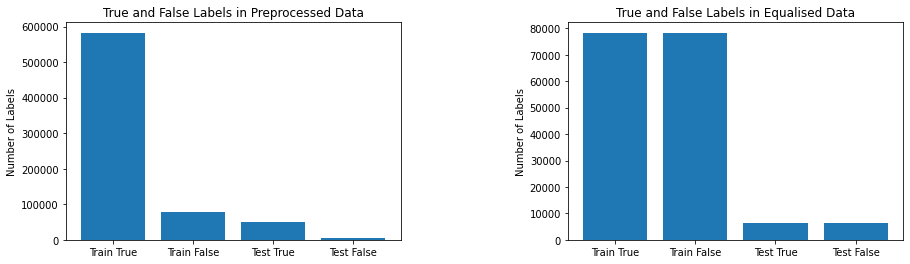

In [ ]:
# Count the number of True and False labels in the training and test data
pre_train_true = np.sum(pre_train_labels)
pre_train_false = pre_train_labels.size - pre_train_true
pre_test_true = np.sum(pre_test_labels)
pre_test_false = pre_test_labels.size - pre_test_true

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4), gridspec_kw={'wspace': 0.5})

# Plot the first bar chart on the first subplot
ax1.bar(['Train True', 'Train False', 'Test True', 'Test False'], [pre_train_true, pre_train_false, pre_test_true, pre_test_false])
ax1.set_ylabel('Number of Labels')
ax1.set_title('True and False Labels in Preprocessed Data')

# Count the number of True and False labels in the training and test data
train_true = np.sum(train_labels)
train_false = train_labels.size - train_true

test_true = np.sum(test_labels)
test_false = test_labels.size - test_true

# Plot the second bar chart on the second subplot
ax2.bar(['Train True', 'Train False', 'Test True', 'Test False'], [train_true, train_false, test_true, test_false])
ax2.set_ylabel('Number of Labels')
ax2.set_title('True and False Labels in Equalised Data')

# Show the figure
plt.show()


Below we plot some of the image pairs.

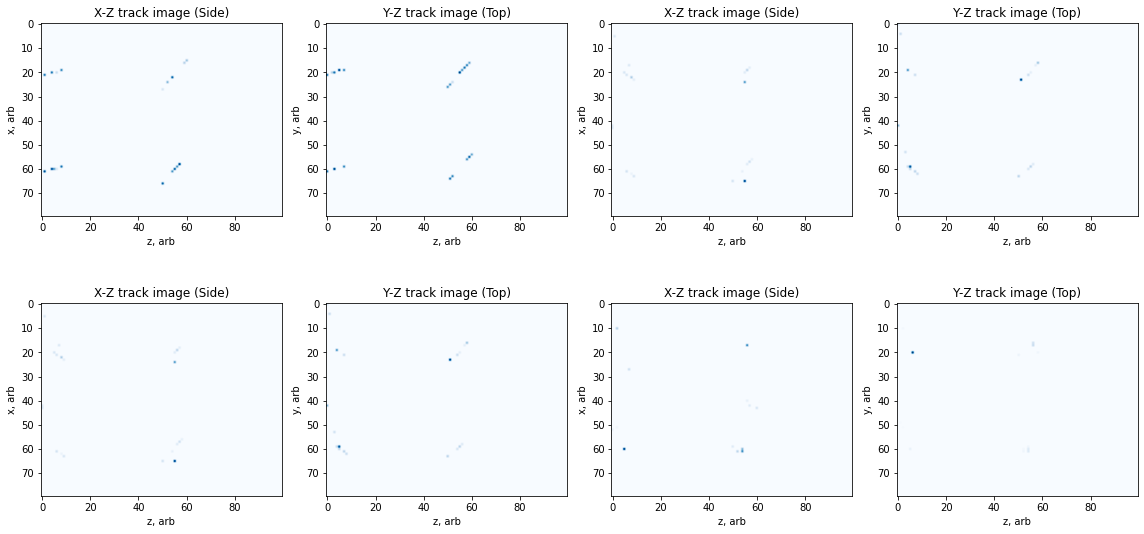

In [ ]:
indices = 7

for i in range(5, indices, 2):
    # Create a new figure with 2 rows and 4 columns
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

    for j in range(2):
        # Plot the first image in the pair
        im1 = axes[j, 0].imshow(train_data[i+j][:,:,0].T, cmap='inferno')
        axes[j, 0].set_title('X-Z track image (Side)')
        axes[j, 0].set_xlabel('z, arb')
        axes[j, 0].set_ylabel('x, arb')

        # Plot the second image in the pair
        im2 = axes[j, 1].imshow(train_data[i+j][:,:,1].T, cmap='inferno')
        axes[j, 1].set_title('Y-Z track image (Top)')
        axes[j, 1].set_xlabel('z, arb')
        axes[j, 1].set_ylabel('y, arb')

        # Plot the third image in the pair
        im3 = axes[j, 2].imshow(train_data[i+j+1][:,:,0].T, cmap='inferno')
        axes[j, 2].set_title('X-Z track image (Side)')
        axes[j, 2].set_xlabel('z, arb')
        axes[j, 2].set_ylabel('x, arb')

        # Plot the fourth image in the pair
        im4 = axes[j, 3].imshow(train_data[i+j+1][:,:,1].T, cmap='inferno')
        axes[j, 3].set_title('Y-Z track image (Top)')
        axes[j, 3].set_xlabel('z, arb')
        axes[j, 3].set_ylabel('y, arb')

    # Adjust the layout of the figure
    fig.tight_layout()

    # Show the figure
    plt.show()


---
# Task 1: $\nu_{\mu}$ Charge-Current (CC) Event Classifier
### Base Model

The first layer is a 2D convolutional layer with 32 filters of size 3x3 and ReLU activation function. The second layer is a 2D max pooling layer with a pool size of 2x2. The third layer is a dropout layer with a dropout rate of 0.25, which helps prevent overfitting. The same pattern is repeated with another set of convolutional, max pooling, and dropout layers. After the convolutional layers, the data is flattened and passed through a dense layer with 64 neurons and ReLU activation function. Another dropout layer with a dropout rate of 0.5 is applied before the final output layer, which is a dense layer with a single neuron and sigmoid activation function.

In [ ]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), input_shape=(100, 80, 2)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.1)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 78, 32)        608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 39, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 39, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 37, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 18, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 18, 32)        0

In [ ]:
#visualkeras.layered_view(model, legend=True) 

In [ ]:
#plot_model(model)

**Early Stopping**

The EarlyStopping callback is configured to monitor the validation loss, set to minimize the loss, have a patience of 5 (i.e., wait for 5 epochs before stopping the training if there is no improvement), and restore the weights from the epoch with the best validation loss.

**Shuffle Data**

The 'shuffle' parameter was set to True to shuffle the dataset and avoid the model learning e.g. that the first half of the data is True and the second half is False.

In [ ]:
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

# Train the model
history = model.fit(train_data, train_labels, validation_split=0.20, batch_size=64, epochs=30, 
shuffle=True, callbacks=[earlystop_callback])

Epoch 1/30
1959/1959 [==============================] - 44s 17ms/step - loss: 0.4602 - binary_accuracy: 0.7906 - val_loss: 0.4009 - val_binary_accuracy: 0.8322
Epoch 2/30
1959/1959 [==============================] - 32s 16ms/step - loss: 0.4105 - binary_accuracy: 0.8250 - val_loss: 0.3913 - val_binary_accuracy: 0.8377
Epoch 3/30
1959/1959 [==============================] - 32s 16ms/step - loss: 0.3958 - binary_accuracy: 0.8327 - val_loss: 0.3947 - val_binary_accuracy: 0.8320
Epoch 4/30
1959/1959 [==============================] - 32s 16ms/step - loss: 0.3871 - binary_accuracy: 0.8375 - val_loss: 0.3779 - val_binary_accuracy: 0.8426
Epoch 5/30
1959/1959 [==============================] - 32s 16ms/step - loss: 0.3803 - binary_accuracy: 0.8412 - val_loss: 0.4018 - val_binary_accuracy: 0.8265
Epoch 6/30
1959/1959 [==============================] - 32s 16ms/step - loss: 0.3743 - binary_accuracy: 0.8438 - val_loss: 0.3735 - val_binary_accuracy: 0.8464
Epoch 7/30
1959/1959 [==================

1743/1743 [==============================] - 5s 3ms/step


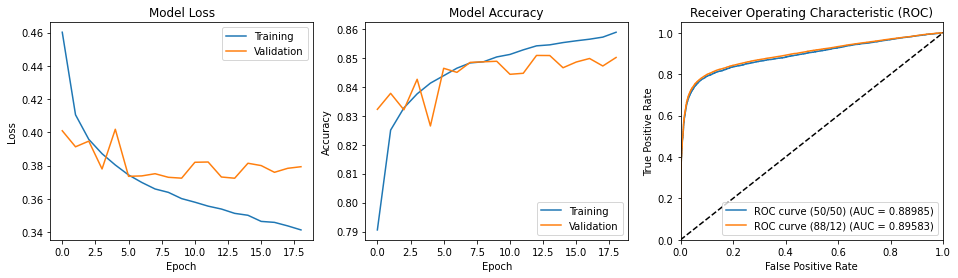

50/50 Test Set
--------------------------------------------------------------------------------------------------
402/402 [==============================] - 2s 4ms/step - loss: 0.3880 - binary_accuracy: 0.8449

88/12 Test Set
--------------------------------------------------------------------------------------------------
1743/1743 [==============================] - 8s 4ms/step - loss: 0.4321 - binary_accuracy: 0.7799


In [ ]:
model_metrics(history, model,test_data,test_labels, pre_test_data, pre_test_labels)

**Comments**

Model performance is ok, however we observe some overfitting. This may be improved by regularisation or adding further dropout layers (or higher percentage dropouts).



**Confusion Matrix**

The confusion matrix is a table that compares the actual target values with the predicted values in a classification model. It shows the number of true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP). In this 2x2 matrix, the rows represent actual target values, and the columns represent predicted values.


<div style="text-align: center;">
<img src="attachment:7f21c55f-4086-4483-bd04-6588a83e17eb.png" alt="image" width="400"/>
    </div>


1743/1743 [==============================] - 5s 3ms/step
50/50 Test Set Confusion Matrix
[[6041  381]
 [1611 4811]]
88/12 Test Set Confusion Matrix
[[ 6041   381]
 [11893 37441]]


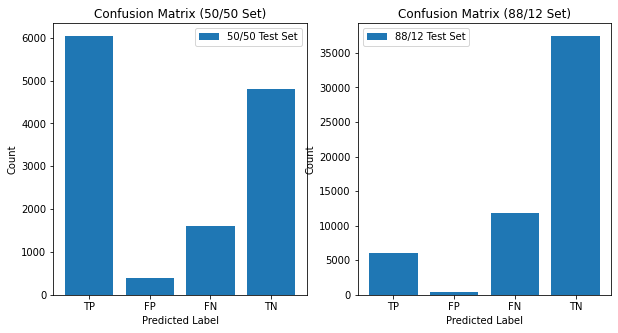

In [ ]:
y_true, y_pred, y_true_pre, y_pred_pre, confusion_mtx, confusion_mtx_pre  = plot_confusion_matrix(model, test_data, test_labels, pre_test_data, pre_test_labels)

**Feature Maps**

A feature map is a two-dimensional array that shows the activation of each filter applied to an input image or volume in a convolutional neural network (CNN). Each element in the feature map represents the output of a single neuron in the filter, which computes a dot product between its weights and the input.

Feature maps are useful because they allow us to visualize what parts of the input image or volume are being activated by each filter in the CNN. This information can help us understand how the CNN is processing the input data and identify patterns or features that are important. Feature maps can also be used for debugging and fine-tuning the CNN's architecture and parameters.

1/1 [==============================] - 0s 49ms/step


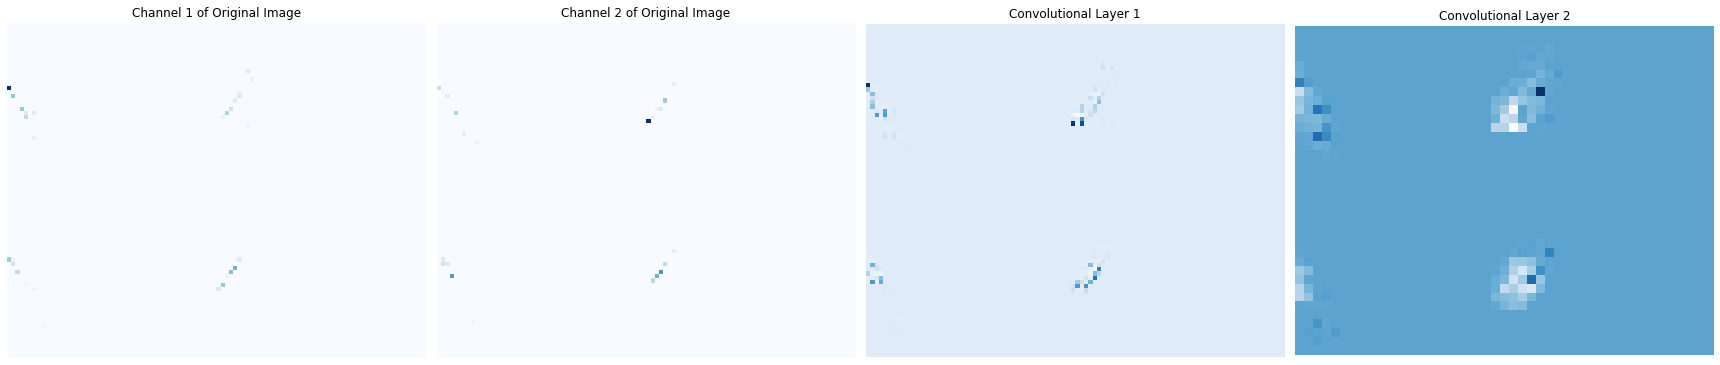

1/1 [==============================] - 0s 55ms/step


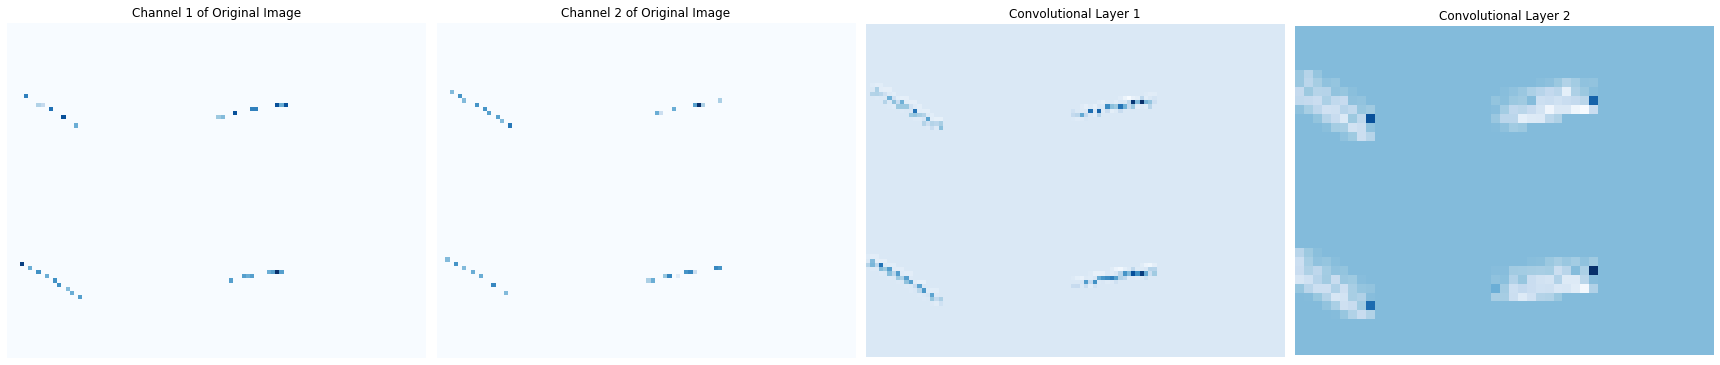

1/1 [==============================] - 0s 50ms/step


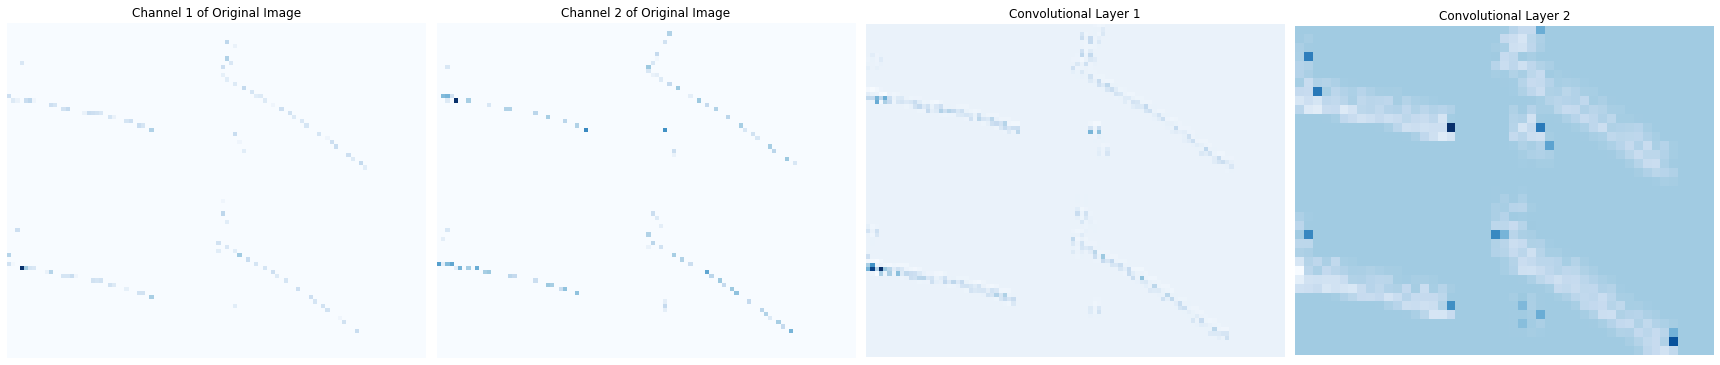

In [ ]:
get_feature_maps(model, train_data[28])
get_feature_maps(model, train_data[543])
get_feature_maps(model, train_data[6002])

---

### Model 1

Below we define CNN model to test out the binary classifier. The base model showed some overfitting, hence we now add regularisation (L2).

**Regularisation**

L2 regularization is a technique used in machine learning to prevent overfitting by adding a penalty term to the loss function that is proportional to the square of the magnitude of the weights. The purpose of this penalty term is to encourage the model to learn simpler, smoother weight values that generalize better to unseen data.

It is useful because it helps prevent overfitting, which occurs when a model becomes too complex and starts to fit the noise in the training data rather than the underlying patterns. By adding a regularization term to the loss function, L2 regularization encourages the model to learn more generalizable features and reduces the variance of the model.

The regularisation can be tuned by adjusting the regularization strength parameter, which controls the trade-off between the fit to the training data and the regularization term. Higher values of the regularization strength parameter result in stronger regularization and simpler models, while lower values result in weaker regularization and more complex models.

In [ ]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding='same', input_shape=(100, 80, 2), kernel_regularizer=regularizers.l2(0.001)))
model1.add(LeakyReLU(alpha=0.1))
model1.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)))
model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)))
model1.add(LeakyReLU(alpha=0.1))
model1.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)))
model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model1.add(LeakyReLU(alpha=0.1))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 80, 32)       608       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 100, 80, 32)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 80, 64)       18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100, 80, 64)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 40, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 40, 64)        36928     
                                                      

In [ ]:
#visualkeras.layered_view(model1, legend=True)  

In [ ]:
#plot_model(model1)

**Model Comments**

This model ends up being quite large, with around 2.1M parameters. 

In [ ]:
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

history1 = model1.fit(train_data, train_labels, validation_split=0.20, batch_size=64, epochs=30, shuffle=True, callbacks=[earlystop_callback])

Epoch 1/30
1959/1959 [==============================] - 102s 51ms/step - loss: 0.5183 - binary_accuracy: 0.8167 - val_loss: 0.4563 - val_binary_accuracy: 0.8323
Epoch 2/30
1959/1959 [==============================] - 99s 50ms/step - loss: 0.4314 - binary_accuracy: 0.8395 - val_loss: 0.4165 - val_binary_accuracy: 0.8482
Epoch 3/30
1959/1959 [==============================] - 99s 50ms/step - loss: 0.4220 - binary_accuracy: 0.8423 - val_loss: 0.4084 - val_binary_accuracy: 0.8524
Epoch 4/30
1959/1959 [==============================] - 99s 50ms/step - loss: 0.4149 - binary_accuracy: 0.8464 - val_loss: 0.4176 - val_binary_accuracy: 0.8486
Epoch 5/30
1959/1959 [==============================] - 99s 50ms/step - loss: 0.4094 - binary_accuracy: 0.8471 - val_loss: 0.4021 - val_binary_accuracy: 0.8493
Epoch 6/30
1959/1959 [==============================] - 99s 50ms/step - loss: 0.4081 - binary_accuracy: 0.8482 - val_loss: 0.4004 - val_binary_accuracy: 0.8517
Epoch 7/30
1959/1959 [=================

1743/1743 [==============================] - 14s 8ms/step


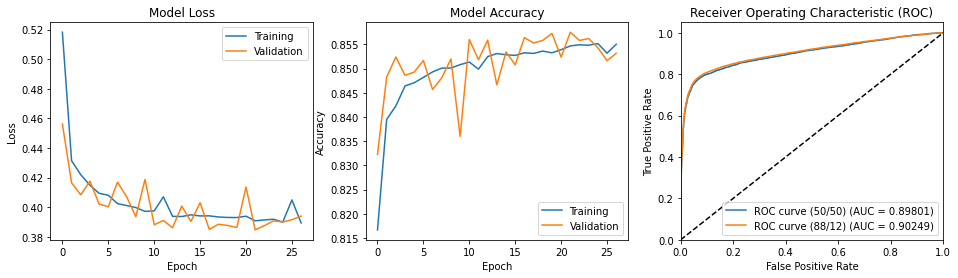

50/50 Test Set
--------------------------------------------------------------------------------------------------
402/402 [==============================] - 4s 10ms/step - loss: 0.3946 - binary_accuracy: 0.8539

88/12 Test Set
--------------------------------------------------------------------------------------------------
1743/1743 [==============================] - 18s 10ms/step - loss: 0.4233 - binary_accuracy: 0.8042


In [ ]:
model_metrics(history1, model1,test_data,test_labels, pre_test_data, pre_test_labels)

It seems clear that the L2 regularisation has helped to reduce overfitting of the model.

**Feature Maps**

Below we see the model still is able to learn some of the key features.

In [ ]:
get_feature_maps(model1, train_data[28])
get_feature_maps(model1, train_data[543])
get_feature_maps(model1, train_data[6002])

**Comments on metrics**

Loss and accuracy plots show overfitting quite early on. Loss even manages to increase as epochs progress. The accuracy remains flat at around 83%. ROC curves for both test sets are good, with Area Under Curve (AUC) of 0.89 (2 s.f.) - higher AUC is better, as it shows higher true positive classification and lower false positive classification.

1743/1743 [==============================] - 14s 8ms/step
50/50 Test Set Confusion Matrix
[[5967  455]
 [1421 5001]]
88/12 Test Set Confusion Matrix
[[ 5967   455]
 [10464 38870]]


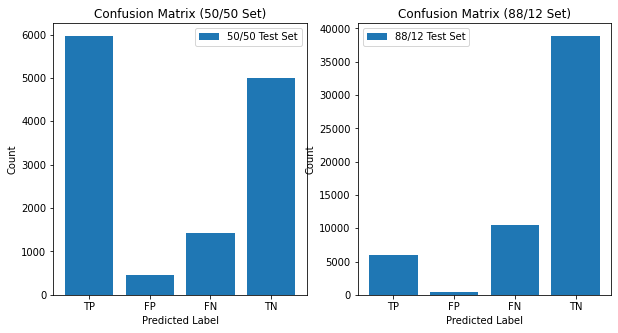

In [ ]:
y_true, y_pred, y_true_pre, y_pred_pre, confusion_mtx, confusion_mtx_pre  = plot_confusion_matrix(model1, test_data, test_labels, pre_test_data, pre_test_labels)

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred)
precision1, recall1, f1_score1, support1 = precision_recall_fscore_support(y_true_pre, y_pred_pre)

print('50/50 Set')
print('-----------------------------')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

print('88/12 Set')
print('-----------------------------')
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_score1)

**Comments on confusion matrix, precision, recall, F1 score**

For the 50/50 set, precision is high for both classes, indicating a low number of false positives, while recall is high for one class and slightly lower for the other, indicating that one class is more accurately identified than the other. The F1 score, which balances precision and recall, is good for both classes. For the 88/12 set, precision is high for one class and low for the other, indicating that there are more false positives for one class. Recall is high for one class but relatively low for the other, indicating that one class is more accurately identified than the other. The F1 score is also lower for one class than the other, indicating a lower overall accuracy.

---

### Inception Module

The Inception module was introduced in the paper "Going Deeper with Convolutions" by Christian Szegedy et al. [2]. An inception module is a type of convolutional neural network (CNN) module that allows for multiple filter sizes and pooling operations to be applied to the same input. It was introduced in the GoogLeNet [2] architecture for image classification and has been widely used in many CNN architectures since then. The inception module is designed to capture features at different scales and help the network learn complex patterns in the input data

In [ ]:
def inception_module(layer_in, filter1x1, filter3x3, filter5x5, filter_pool):
    # 1x1 convolution
    conv1 = Conv2D(filter1x1, (1,1), padding='same', activation='relu')(layer_in)
    
    # 3x3 convolution
    conv3 = Conv2D(filter3x3, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(filter3x3, (3,3), padding='same', activation='relu')(conv3)

    # 5x5 convolution
    conv5 = Conv2D(filter5x5, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(filter5x5, (5,5), padding='same', activation='relu')(conv5)
    
    # Pooling
    pool = MaxPooling2D((2,2), strides = 1, padding='same')(layer_in)
    pool = Conv2D(filter_pool, (1,1), padding='same', activation='relu')(pool)

    # concatenate filters, assumes filters/channels last
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)

    return layer_out

def inception_model():
    # Define the input branch
    inputs = Input(shape=(100, 80, 2))

    # First separable convolutional layer with 32 filters of size 7x7, followed by pooling of size 2x2 and spatial dropout of 40%
    conv1 = keras.layers.SeparableConv2D(128, 7, activation='relu', input_shape=(100,80,2))(inputs)
    pool1 = keras.layers.MaxPooling2D((2, 2), strides = 2)(conv1)
    drop1 = keras.layers.SpatialDropout2D(0.4)(pool1)

    # Second convolutional layer with 64 filters of size 3x3, followed by pooling of size 2x2 and dropout of 40%
    conv2 = keras.layers.Conv2D(128, 3, activation='relu', input_shape=(100,80,2))(drop1)
    pool2 = keras.layers.MaxPooling2D((2, 2), strides = 2)(conv2)
    drop2 = keras.layers.SpatialDropout2D(0.4)(pool2)

    # Inception layer
    incp1 = inception_module(drop2, 128, 64, 32, 8)

    # Third convolutional layer with 64 filters of size 3x3, followed by dropout of 70%
    conv3 = keras.layers.Conv2D(128, 3, activation='relu')(incp1)
    drop3 = keras.layers.Dropout(0.4)(conv3)

    # Fully connected neural network
    flatten = keras.layers.Flatten()(drop3)
    dense1 = keras.layers.Dense(128, activation='relu')(flatten)
    drop4 = keras.layers.Dropout(0.3)(dense1)
    dense2 = keras.layers.Dense(8, activation='relu')(drop4)

    # Dropout layer to prevent overfitting
    drop5 = keras.layers.Dropout(0.3)(dense2)

    # Output layer with sigmoid activation for binary classification
    output_layer = keras.layers.Dense(1, activation='sigmoid')(drop5)

    # Create the model
    model3 = Model(inputs=inputs, outputs=output_layer)

    # Compile the network with binary crossentropy loss and adam optimiser with learning rate of 1.0
    model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
                        loss      = 'binary_crossentropy', 
                        metrics   = 'binary_accuracy')
    
    return model3

inception_model = inception_model()
inception_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 80, 2)  0           []                               
                                ]                                                                 
                                                                                                  
 separable_conv2d_1 (SeparableC  (None, 94, 74, 128)  482        ['input_2[0][0]']                
 onv2D)                                                                                           
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 47, 37, 128)  0          ['separable_conv2d_1[0][0]']     
 )                                                                                          

In [ ]:
#visualkeras.layered_view(inception_model, legend=True)  

In [ ]:
#plot_model(model)

**Model Comments**

Once again, it is notable that the total number of parameters is the highest yet at around 5.4M. This was required to manage to achieve a high accuracy above 80%. A validation accuracy of around 83-84% is achieved relatively quickly, at around 8 epochs.

Once again the model is trained with callbacks to avoid overfitting.

In [ ]:
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

history3 = inception_model.fit(train_data, train_labels, 
                     validation_split=0.20, batch_size = 64, epochs=100, shuffle=True, callbacks=[earlystop_callback])

Epoch 1/100
1959/1959 [==============================] - 169s 84ms/step - loss: 0.4648 - binary_accuracy: 0.7904 - val_loss: 0.4272 - val_binary_accuracy: 0.8068
Epoch 2/100
1959/1959 [==============================] - 162s 83ms/step - loss: 0.4085 - binary_accuracy: 0.8310 - val_loss: 0.4205 - val_binary_accuracy: 0.8215
Epoch 3/100
1959/1959 [==============================] - 162s 83ms/step - loss: 0.3969 - binary_accuracy: 0.8375 - val_loss: 0.3827 - val_binary_accuracy: 0.8461
Epoch 4/100
1959/1959 [==============================] - 162s 83ms/step - loss: 0.3916 - binary_accuracy: 0.8401 - val_loss: 0.3719 - val_binary_accuracy: 0.8500
Epoch 5/100
1959/1959 [==============================] - 162s 83ms/step - loss: 0.3848 - binary_accuracy: 0.8425 - val_loss: 0.3666 - val_binary_accuracy: 0.8506
Epoch 6/100
1959/1959 [==============================] - 162s 83ms/step - loss: 0.3814 - binary_accuracy: 0.8446 - val_loss: 0.3747 - val_binary_accuracy: 0.8460
Epoch 7/100
1959/1959 [=====

1743/1743 [==============================] - 15s 8ms/step


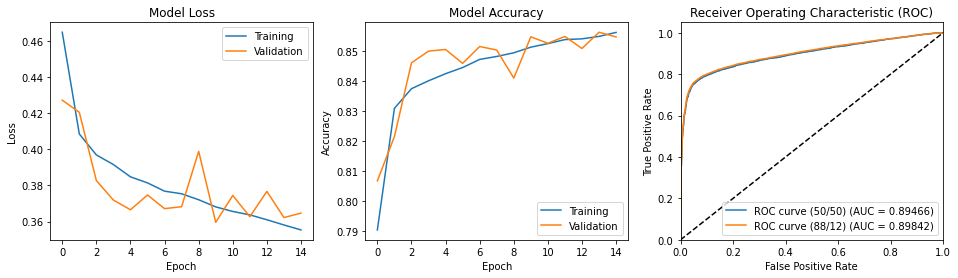

50/50 Test Set
--------------------------------------------------------------------------------------------------
402/402 [==============================] - 4s 10ms/step - loss: 0.3756 - binary_accuracy: 0.8518

88/12 Test Set
--------------------------------------------------------------------------------------------------
1743/1743 [==============================] - 19s 10ms/step - loss: 0.4034 - binary_accuracy: 0.7934


In [ ]:
model_metrics(history3, inception_model,test_data,test_labels, pre_test_data, pre_test_labels)

**Model Comments**

This model gives a fairly good accuracy of around 80% consistently. However, it is quite a large network with over 5,000,000 parameters. It also is therefore quite slow to train and not very efficient. Therefore, we will continue searching for a better model that has similar accuracy with fewer parameters.

**Feature Maps**

The feature maps have been used to remove redundant convolutional layers, they can be seen below.

1/1 [==============================] - 0s 295ms/step


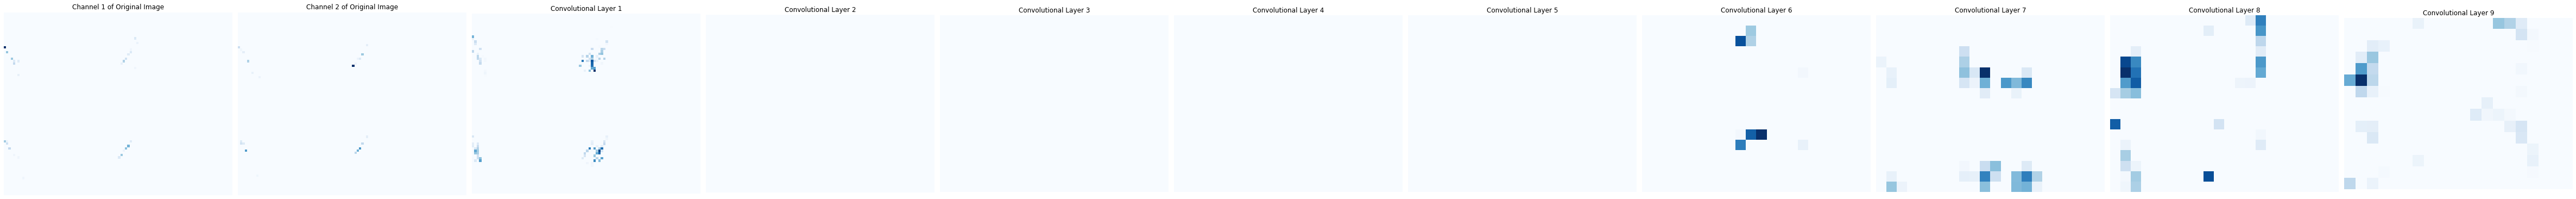

1/1 [==============================] - 0s 113ms/step


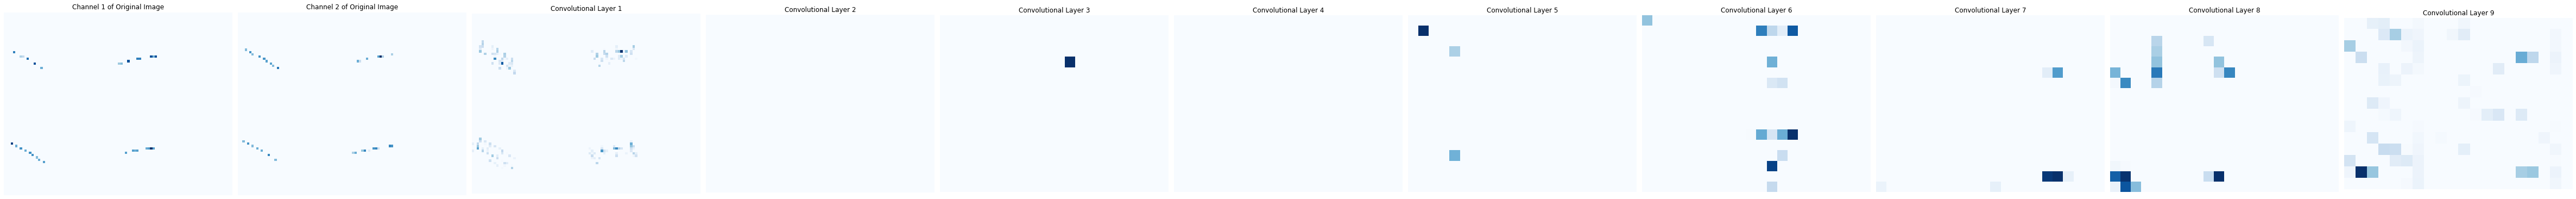

1/1 [==============================] - 0s 120ms/step


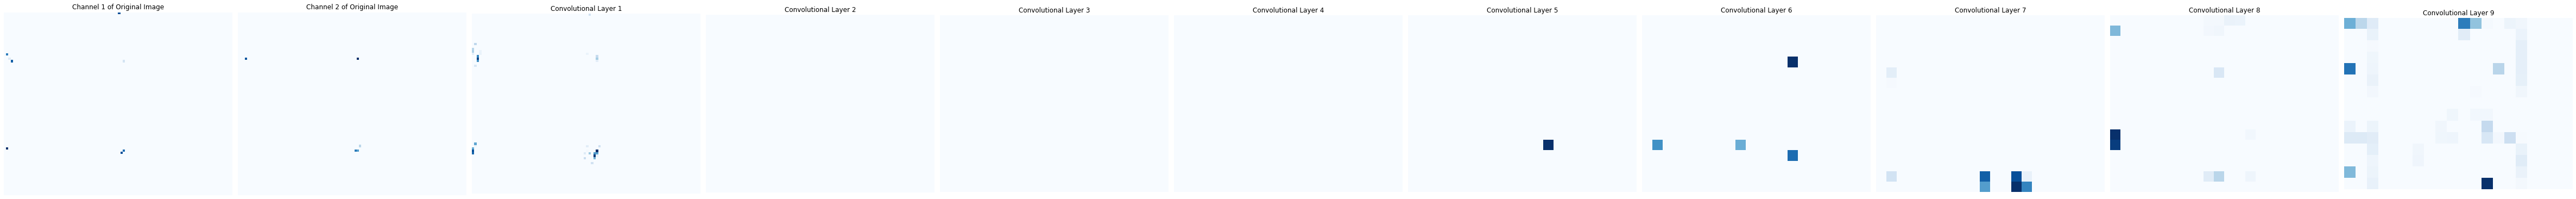

In [ ]:
# View some of the feature maps from the model
get_feature_maps(inception_model, train_data[28])
get_feature_maps(inception_model, train_data[543])
get_feature_maps(inception_model, train_data[6023])

## Multi-View CNN

Looking towards a better and more efficient approach, we can consider taking in the xy and yz views into the neural network separately. A proposed method is the multi-view CNN [4]. 

This method takes the xy and yz inputs into two identical models in two different branches, before merging both back together in the final layers. This allows the neural network to learn from both images (both perspectives). 

First, we must separate the training and testing datasets into single arrays of images, corresponding to the xy and yz images. We will test both on the original 88/12 and the rebalanced 50/50 datasets.

Normalising the data set by dividing by 255.0 was also tested (to set the range of pixel values to be 0 to 1). This resulted in a speed up in training.

In [ ]:
def normalize_images(images):
    """
    Normalize the pixel values of images to the range [0, 1].
    """
    image_size = (100, 80)
    image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255  # Normalize the pixel values to the range [0, 1]
    )
    normalized_images = image_generator.flow(
        x=images,
        batch_size=len(images),
        shuffle=False,
    ).next()
    return normalized_images

In [ ]:
# Split the image pairs into separate arrays for the first and second image
pre_test_data1 = normalize_images(pre_test_data[:, :, :, 0].reshape(-1, 100, 80, 1))
pre_test_data2 = normalize_images(pre_test_data[:, :, :, 1].reshape(-1, 100, 80, 1))

# Split the image pairs into separate arrays for the first and second image
train_data1 = normalize_images(train_data[:, :, :, 0].reshape(-1, 100, 80, 1))
train_data2 = normalize_images(train_data[:, :, :, 1].reshape(-1, 100, 80, 1))

# Split the image pairs into separate arrays for the first and second image
test_data1 = normalize_images(test_data[:, :, :, 0].reshape(-1, 100, 80, 1))
test_data2 = normalize_images(test_data[:, :, :, 1].reshape(-1, 100, 80, 1))

In [ ]:
# Flatten the labels
train_labels1 = train_labels.flatten().astype(int)

The below model architecture was adapted from the original base CNN model, duplicated twice for each branch of the model. Up to 5 convolutional layers per model was also tested, but did not provide any further improvements in loss or accuracy, and resulted in overfitting. MaxPooling2D was also used, as it has benefits when used in computer vision tasks and image recognition. Some benefits include: translation invariance, dimensionality reduction and robustness to small variations in the input image.

In [ ]:
def multi_model():

  # Define the inputs
  first_input = Input(shape=(100, 80, 1), name='first_input')
  second_input = Input(shape=(100, 80, 1), name='second_input')

  # Define the convolutional layers for the first input
  conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(first_input)
  pool1_1 = MaxPooling2D(pool_size=(2, 2))(conv1_1)
  dropout1_1 = Dropout(0.30)(pool1_1)

  conv1_2 = Conv2D(16, (3, 3), activation='relu', padding='same')(dropout1_1)
  pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
  dropout1_2 = Dropout(0.30)(pool1_2)

  conv1_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(dropout1_2)
  pool1_3 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
  dropout1_3 = Dropout(0.30)(pool1_3)

  # Define the convolutional layers for the second input
  conv2_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(second_input)
  pool2_1 = MaxPooling2D(pool_size=(2, 2))(conv2_1)
  dropout2_1 = Dropout(0.30)(pool2_1)

  conv2_2 = Conv2D(16, (3, 3), activation='relu', padding='same')(dropout2_1)
  pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
  dropout2_2 = Dropout(0.30)(pool2_2)

  conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(dropout2_2)
  pool2_3 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
  dropout2_3 = Dropout(0.30)(pool2_3)

  # Concatenate the output of the convolutional layers
  merged = Concatenate()([dropout1_3, dropout2_3])

  # Flatten the output
  flatten = Flatten()(merged)

  # Define the fully connected layers
  fc1 = Dense(8, activation='relu')(flatten)
  dropout3 = Dropout(0.30)(fc1)
  fc2 = Dense(1, activation='sigmoid')(dropout3)

  # Create the model
  multi_model = Model(inputs=[first_input, second_input], outputs=fc2)

  # Compile the model
  multi_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

  return multi_model

multi_model = multi_model()

multi_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 first_input (InputLayer)       [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 second_input (InputLayer)      [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 100, 80, 16)  160         ['first_input[0][0]']            
                                                                                              

In [ ]:
#plot_model(multi_model)

In [ ]:
# Allows early stopping of model training - to avoid overfitting
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

# Train the model on your separate arrays for the first and second images
multi_history = multi_model.fit({'first_input': train_data1, 'second_input': train_data2}, train_labels1, epochs=100, 
                                batch_size=64, shuffle=True, validation_split=0.20, callbacks=[earlystop_callback])

Epoch 1/100
618/618 [==============================] - 24s 20ms/step - loss: 0.6008 - accuracy: 0.6816 - val_loss: 0.5239 - val_accuracy: 0.7620
Epoch 2/100
618/618 [==============================] - 11s 18ms/step - loss: 0.5091 - accuracy: 0.7570 - val_loss: 0.4505 - val_accuracy: 0.7922
Epoch 3/100
618/618 [==============================] - 10s 17ms/step - loss: 0.4782 - accuracy: 0.7806 - val_loss: 0.4349 - val_accuracy: 0.8002
Epoch 4/100
618/618 [==============================] - 11s 18ms/step - loss: 0.4690 - accuracy: 0.7878 - val_loss: 0.4282 - val_accuracy: 0.8026
Epoch 5/100
618/618 [==============================] - 10s 16ms/step - loss: 0.4621 - accuracy: 0.7952 - val_loss: 0.4319 - val_accuracy: 0.8072
Epoch 6/100
618/618 [==============================] - 10s 16ms/step - loss: 0.4584 - accuracy: 0.7969 - val_loss: 0.4262 - val_accuracy: 0.8048
Epoch 7/100
618/618 [==============================] - 10s 16ms/step - loss: 0.4578 - accuracy: 0.7968 - val_loss: 0.4243 - val_ac

In [ ]:
multi_model.save('content/gdrive/trained_multi_model')

**Comments**

This multi-view CNN model appears to perform slightly better in training and validation (higher validation accuracy and lower loss) than the inception model. This is particularly impressive given that this model is many orders of magnitude smaller in terms of number of parameters, meaning that it trains quicker as well. Overall the multi-view CNN appears to be the most efficient model for tackling this binary classification problem.

**Optimising Parameters**

A few different parameter variations were tried, using more of a manual random search and grid search method in some cases. Different numbers of hidden conv2d layers were tried, but more than three showed overfitting, with no real improvement. Secondly, to tackle the overfitting problem, the dropout layer % was tested. It appeared that around 0.2 to 0.3 was best for the hidden layers and 0.5 for the output layer. This was tested using a manual grid search going from 0.1 to 0.9 in increments of 0.1. A similar method was used with the number of filters per conv2d layer - resulting in 16 being the apparent optimal.

**Test Loss & Accuracy**

In [ ]:
# Test & Predict on 50/50 dataset
multi_model.evaluate({'first_input': test_data1, 'second_input': test_data2}, test_labels.flatten().astype(int))
multi_preds = multi_model.predict({'first_input': test_data1, 'second_input': test_data2})

# Test & Predict on 88/12 dataset
multi_model.evaluate({'first_input': pre_test_data1, 'second_input': pre_test_data2}, pre_test_labels.flatten().astype(int))
multi_preds2 = multi_model.predict({'first_input': pre_test_data1, 'second_input': pre_test_data2})

1301/1301 [==============================] - 4s 3ms/step


**Comments**

After testing the model on the 50/50 and the 88/12 datasets, we see theres a fairly large difference of around 7% between the two. The 50/50 set has an accuracy of around 84-85%, whilst the 88/12 set has an accuracy of around 77-78%. It is likely this is due to the model having difficulty predicting false positives, so we will investigate this further. Note that ther is also slight deviation depending on how much data is used. 

When using more data to train the model (100 datasets), test accuracy improves to approx. 85% and 78% respectively.

In [ ]:
# Get the labels and preds in the right format
test_labels1 = test_labels.flatten().astype(float)
multi_preds1 = multi_preds.flatten().astype(float)

**Plotting accuracy, loss, ROC curve**

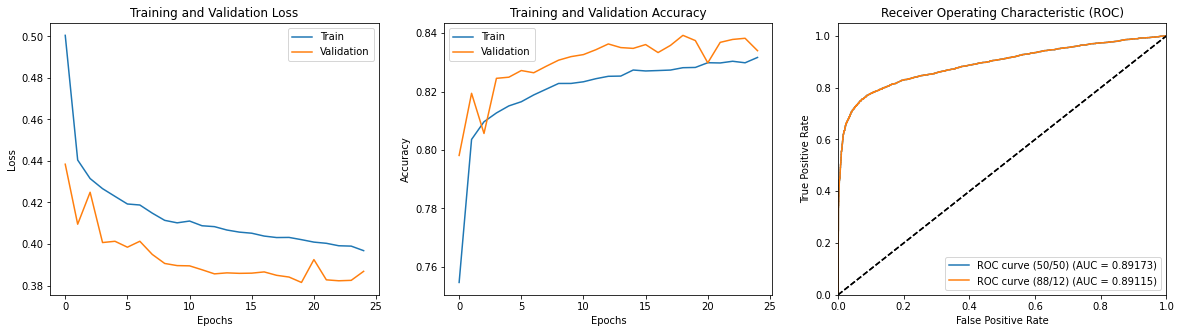

In [ ]:
model_plots(multi_history, test_labels1, multi_preds1, pre_test_labels.flatten().astype(float), multi_preds2)

**Comments**

A clear observation is that the training and validation loss and accuracy are separated quite clearly. Usually, this would be an issue. However, in this case we actually have the validation loss lower than the training, and the validation accuracy higher than the training. This actually shows that the model *performs better on validation data*, compared to training data. After researching this, it appears that the reason is most likely due to the dropout layers doing their job quite well and ensuring there is not overfitting whilst training, but once they are removed, we see that the accuracy goes up to where it should be.

Source: [3]

In [ ]:
# Define classes, get the classification report from labels and predictions
classes = ['Non Muon Neutrino CC', 'Muon Neutrino CC']
report = classification_report(test_labels1,  np.round(multi_preds1), target_names=classes)
print(report)

# Compute precision-recall curve and average precision for each class
precision = {}
recall = {}
average_precision = {}
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(test_labels1[:, i], multi_preds1[:, i])
    average_precision[i] = average_precision_score(test_labels1[:, i], multi_preds1[:, i])

# Plot precision-recall curve for each class
plt.figure()
for i in range(len(classes)):
    plt.plot(recall[i], precision[i], label='{} (AP = {:.2f})'.format(classes[i], average_precision[i]))

# Show the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


                      precision    recall  f1-score   support

Non Muon Neutrino CC       0.78      0.94      0.85      4948
    Muon Neutrino CC       0.92      0.74      0.82      4948

            accuracy                           0.84      9896
           macro avg       0.85      0.84      0.84      9896
        weighted avg       0.85      0.84      0.84      9896



IndexError: ignored

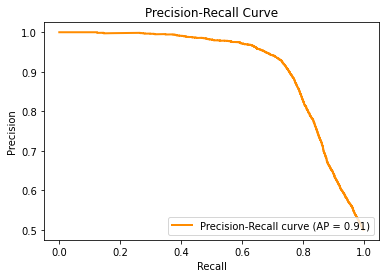

In [ ]:
# Compute the precision-recall curve and average precision
precision, recall, thresholds = precision_recall_curve(test_labels1, multi_preds1)
avg_precision = average_precision_score(test_labels1, multi_preds1)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

The precision-recall curve shows high precision (close to 1) until around 0.65 recall, after which it declines steeply to 0.5 precision at 1.0 recall, this indicates that the classifier is able to achieve high precision for a relatively small subset of instances that are easy to classify correctly (i.e., high recall instances), but as the recall threshold is increased to include more instances, the precision drops significantly.

This may suggest that the classifier is able to correctly classify the easy instances with high confidence, but as the instances become more difficult, the classifier starts to make more errors, resulting in a decrease in precision. This behavior could occur if the classifier is not able to capture the complexity or variability in the data to the fullest.

**Explanation of below**

Below I define a single branch of the model, then use plot_model to visualise it, which I then made a diagram of for the report. I also visualised some feature maps and convolution filters for the same reason.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Concatenate

# Define the inputs
input_ = Input(shape=(100, 80, 1), name='input')

# Define the convolutional layers
conv1 = Conv2D(16, (3, 3), activation='relu')(input_)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
dropout1 = Dropout(0.30)(pool1)

conv2 = Conv2D(16, (3, 3), activation='relu')(dropout1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
dropout2 = Dropout(0.30)(pool2)

conv3 = Conv2D(16, (3, 3), activation='relu')(dropout2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
dropout3 = Dropout(0.30)(pool3)

# Flatten the output
flatten = Flatten()(dropout3)

# Define the fully connected layers
fc1 = Dense(8, activation='relu')(flatten)
dropout4 = Dropout(0.50)(fc1)
fc2 = Dense(1, activation='sigmoid')(dropout4)

# Create the model
single_model = Model(inputs=input_, outputs=fc2)

# Compile the model
single_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

single_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 80, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 98, 78, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 39, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 39, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 37, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 18, 16)       0         
 2D)                                                         

(100, 80, 1)


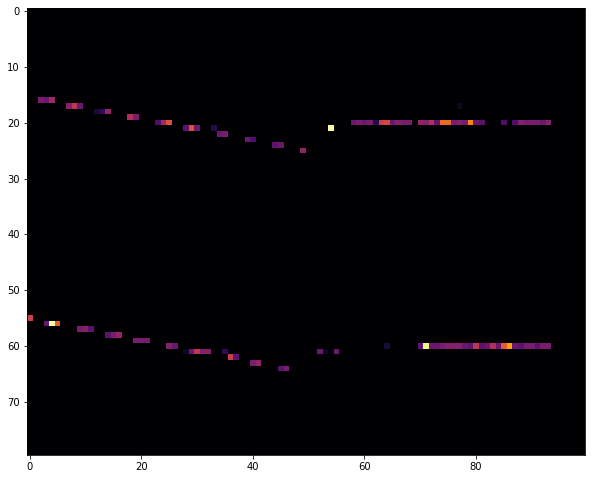

In [ ]:
# Have a look at the image
image_no = 9574 #3223
from scipy import ndimage
rotated = ndimage.rotate(train_data1[image_no], -90)
plt.figure(figsize=(10,10))
plt.imshow(rotated, cmap='inferno')

# This needs to be defined as one of the conv layers in the above model.summary (it changes each time you run the notebook)
conv_layer_name='conv2d_2'

print(train_data1[image_no].shape)

1/1 [==============================] - 0s 106ms/step


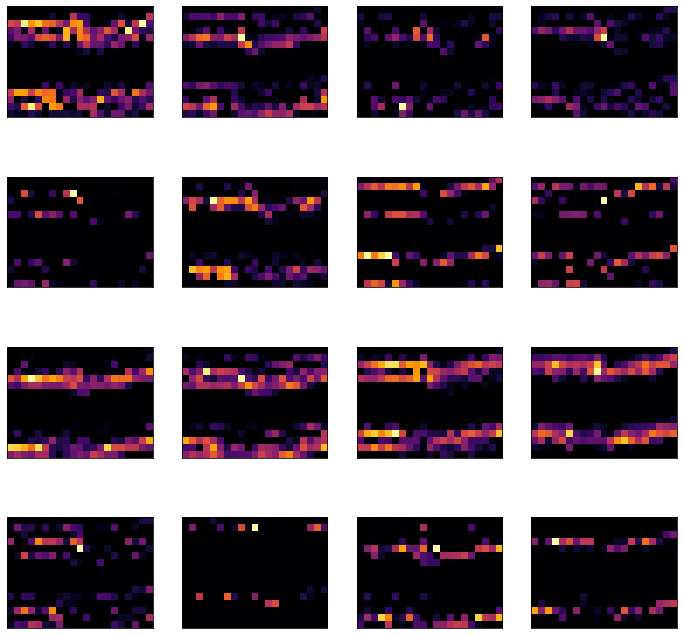

In [ ]:
def get_conv_output(model, layer_name, input_image):
  '''
  Function that gets the convolutional layer output
  Inputs: model, layer_name, input_image
  Outputs: just a plot
  '''
  # Create a new model that outputs the convolutional layer output
  conv_layer = model.get_layer(layer_name)
  new_model = Model(inputs=model.inputs, outputs=conv_layer.output)
  
  # Get the convolutional layer output for the given input image
  conv_output = new_model.predict(input_image)
  return conv_output

# Get the convolutional layer output for a sample input image
input_image = train_data1[image_no].reshape(-1, 100, 80, 1)
conv_output = get_conv_output(single_model, conv_layer_name, input_image)

# Plot the convolutional layer output images as a grid
n_filters = conv_output.shape[-1]
n_cols = int(np.ceil(np.sqrt(n_filters)))
n_rows = int(np.ceil(n_filters/n_cols))

# Iterate and plot
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12))
#fig.subplots_adjust(wspace=0, hspace=0)

for i in range(n_rows):
    for j in range(n_cols):
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        axs[i,j].set_frame_on(True)

        if i*n_cols+j < n_filters:
            axs[i,j].imshow(conv_output[0,:,:,i*n_cols+j].T, cmap='inferno')
        else:
            axs[i,j].set_visible(False)
plt.show()


 The pooling layers reduce the spatial dimensions of the output from the previous convolutional layer by a factor of the pool size. In this case, we have 3 convolutional layers with 4x4 spatial dimensions and a pool size of (2,2) after each convolutional layer, which results in an output feature map with 2x2 spatial dimensions. Therefore, the output feature maps of the last convolutional layers have 16 (2x2x4) features.

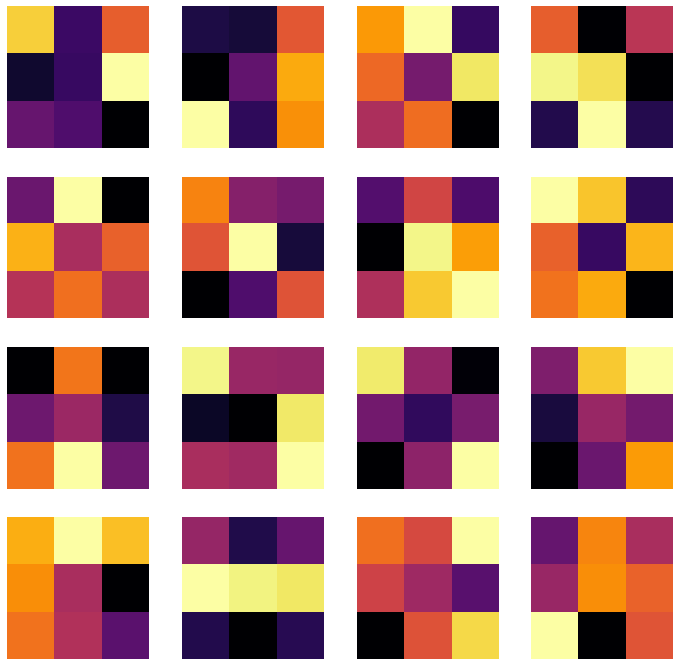

In [ ]:
# Get the filters for a given layer
layer = single_model.get_layer(conv_layer_name)
filters, biases = layer.get_weights()
n_filters = filters.shape[3]

# Plotting the filters
if n_filters <= 0:
    print("Error: There are no filters in this layer.")
else:
    # Determine the number of rows and columns for the subplot
    n_cols = 4
    n_rows = (n_filters + n_cols - 1) // n_cols
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 12))
    #fig.subplots_adjust(wspace=0, hspace=0)
    for i in range(n_rows):
        for j in range(n_cols):
            if i*n_cols + j < n_filters:
                axs[i][j].imshow(filters[:, :, :, i*n_cols + j][:, :, 0].T, cmap='inferno')
                
            axs[i][j].axis('off')


## Testing: Multi View and Inception Modules

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Lambda, AveragePooling2D

def inception_module(layer_in, filter1x1, filter3x3, filter5x5, filter_pool):
    # 1x1 convolution
    conv1 = Conv2D(filter1x1, (1,1), padding='same', activation='relu')(layer_in)
    
    # 3x3 convolution
    conv3 = Conv2D(filter3x3, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(filter3x3, (3,3), padding='same', activation='relu')(conv3)

    # 5x5 convolution
    conv5 = Conv2D(filter5x5, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(filter5x5, (5,5), padding='same', activation='relu')(conv5)
    
    # Pooling
    pool = MaxPooling2D((2,2), strides = 1, padding='same')(layer_in)
    pool = Conv2D(filter_pool, (1,1), padding='same', activation='relu')(pool)

    # concatenate filters, assumes filters/channels last
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)

    return layer_out


def multi_inception_model():

  # Define the inputs
  first_input = Input(shape=(100, 80, 1), name='first_input')
  second_input = Input(shape=(100, 80, 1), name='second_input')

  # Define the convolutional layers for the first input
  conv1_1 = Conv2D(filters=32, kernel_size=(7, 7), strides=(2, 2), activation='relu', padding='same')(first_input)
  pool1_1 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(conv1_1)
  lrn1_1 = Lambda(lambda x: tf.nn.lrn(x, depth_radius=5, alpha=0.0001, beta=0.75))(pool1_1)

  conv1_2 = Conv2D(filters=32, kernel_size=(1, 1), activation='relu', padding='same')(lrn1_1)
  conv1_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(conv1_2)
  lrn1_2 = Lambda(lambda x: tf.nn.lrn(x, depth_radius=5, alpha=0.0001, beta=0.75))(conv1_3)
  pool1_2 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(lrn1_2)

  incp1_1 = inception_module(pool1_2, 32, 32, 32, 8)
  incp1_2 = inception_module(incp1_1, 32, 32, 32, 8)

  pool1_3 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(incp1_2)

  incp1_3 = inception_module(pool1_3, 32, 32, 32, 8)


  # Define the convolutional layers for the second input
  conv2_1 = Conv2D(filters=32, kernel_size=(7, 7), strides=(2, 2), activation='relu', padding='same')(second_input)
  pool2_1 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(conv2_1)
  lrn2_1 = Lambda(lambda x: tf.nn.lrn(x, depth_radius=5, alpha=0.0001, beta=0.75))(pool2_1)

  conv2_2 = Conv2D(filters=32, kernel_size=(1, 1), activation='relu', padding='same')(lrn2_1)
  conv2_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(conv2_2)
  lrn2_2 = Lambda(lambda x: tf.nn.lrn(x, depth_radius=5, alpha=0.0001, beta=0.75))(conv2_3)
  pool2_2 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(lrn2_2)

  incp2_1 = inception_module(pool2_2, 32, 32, 32, 8)
  incp2_2 = inception_module(incp2_1, 32, 32, 32, 8)

  pool2_3 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(incp2_2)

  incp2_3 = inception_module(pool2_3, 32, 32, 32, 8)

  # Concatenate the output of the convolutional layers
  merged = Concatenate()([incp1_3, incp2_3])

  #incpfinal = inception_module(merged, 32,32,32,12)
  #avg_pool = AveragePooling2D(pool_size=(6,5))(incpfinal)

  # Flatten the output
  flatten = Flatten()(merged)
  #pre_output = Dense(8, activation='relu')(flatten)
  #output = Dense(1, activation='softmax')(avg_pool)

  # Define the fully connected layers
  fc1 = Dense(8, activation='relu')(flatten)
  dropout3 = Dropout(0.50)(fc1)
  fc2 = Dense(1, activation='softmax')(dropout3)

  # Create the model
  multi_model = Model(inputs=[first_input, second_input], outputs=fc2)

  # Compile the model
  multi_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

  return multi_model

multi_inception_model1 = multi_inception_model()

multi_inception_model1.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 first_input (InputLayer)       [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 second_input (InputLayer)      [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_773 (Conv2D)            (None, 50, 40, 32)   1600        ['first_input[0][0]']            
                                                                                           

In [ ]:
# Allows early stopping of model training - to avoid overfitting
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

# Train the model on your separate arrays for the first and second images
multi_history = multi_inception_model1.fit({'first_input': train_data1, 'second_input': train_data2}, train_labels1, epochs=100, 
                                batch_size=64, shuffle=True, validation_split=0.20, callbacks=[earlystop_callback])

An attempt was made to use both the inception module with the multi-view CNN. However, results showed that the regular multi-view without the inception module performed better (by approx 3-5%, whilst the network was much smaller). Therefore, this combined model was not used, but was left here in case it was to be tested in a future task.

---

## Task 2: Testing the classifier and investigating how metadata variables affect accuracy

### 1. Defining classifier performance

With each of the models, we have evaluated the performance by plotting accuracy and loss in training and validation, as well as the ROC curve to identify the rate of accuracy for positives and negatives. The ROC curve shows the trade-off between the true and false positive rate for the model, therefore this appears to answer the question of whether we choose false positives and false negatives.

Therefore, along with accuracy and loss, we will use the ROC curve to define classifier performance. Note: we will not use the confusion matrices, since the ROC curve essentially encapsulates the same information.

Below we again plot the train/val accuracy, loss and plot the ROC curves for each of the three tested models. Further metrics such as precision, recall and F1 score and precision recall plots have been used later on in the notebook.


In [ ]:
model_metrics(history1, model1,test_data,test_labels, pre_test_data, pre_test_labels)

In [ ]:
model_metrics(history3, inception_model,test_data,test_labels, pre_test_data, pre_test_labels)

In [ ]:
model_plots(multi_history, test_labels1, multi_preds1, pre_test_labels.flatten().astype(float), multi_preds2)

**Comments**

It can be observed that the accuracy and loss is very close for all three models. Similar for the ROC curves on each dataset, suggesting they all perform well for the classification problem. However, the multi-view model manages to maintain the same performance whilst being 100x smaller (approx) with only 30,000 parameters. Therefore, the MVCNN was chosen as the model to be used going forward.


### 2. Classifier performance on DIS and QE events

Next, we will test the classifier performance when distinguishing between $\nu_{\mu}$ CC events for both only DIS and QE events.

- The DIS events have interaction code: 2, 6, 10
- The QE events have interaction code: 0, 4, 8

I expect that the classifier will perform worse on DIS events (messy) compared to QE (clean) events, however there is significantly less data available for QE events - so this may hurt the accuracy a lot.


In [ ]:
train_data_raw, train_labels_raw = get_data_and_labels_raw(1, 50, metadata_type='interaction')
test_data_raw, test_labels_raw = get_data_and_labels_raw(51, 55, metadata_type='interaction')

In [ ]:
def separate_dis_qe_data(train_data_raw, train_labels_raw):
    '''
    This function separates the input training data and labels into two separate datasets for DIS and QE events.

    Args:
        train_data_raw: a numpy array containing the training data.
        train_labels_raw: a numpy array containing the labels for the training data.

    Returns:
        dis_train_data: a numpy array containing the training data for DIS events.
        dis_train_labels: a numpy array containing the labels for the DIS events.
        qe_train_data: a numpy array containing the training data for QE events.
        qe_train_labels: a numpy array containing the labels for the QE events.
    '''
    
    # get the interaction code for each event
    interaction_code = train_labels_raw[:, 0]
    
    # get the boolean arrays for DIS and QE events
    dis_mask = (interaction_code == 2) | (interaction_code == 6) | (interaction_code == 10)
    qe_mask = (interaction_code == 0) | (interaction_code == 4) | (interaction_code == 8)
    
    # separate the data and labels into DIS and QE datasets
    dis_train_data = train_data_raw[dis_mask]
    dis_train_labels = train_labels_raw[dis_mask]
    qe_train_data = train_data_raw[qe_mask]
    qe_train_labels = train_labels_raw[qe_mask]
    
    return dis_train_data, dis_train_labels, qe_train_data, qe_train_labels


In [ ]:
# Separate the data
dis_train_data, dis_train_labels, qe_train_data, qe_train_labels = separate_dis_qe_data(train_data_raw, train_labels_raw)
dis_test_data, dis_test_labels, qe_test_data, qe_test_labels = separate_dis_qe_data(test_data_raw, test_labels_raw)

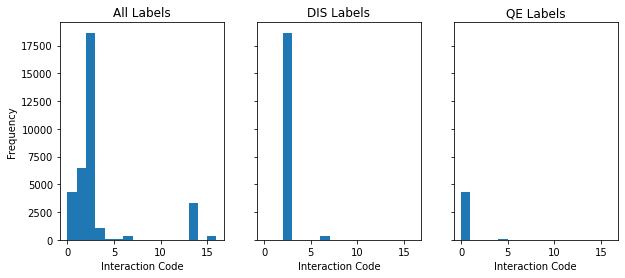

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), sharey=True)

# Plot the histograms
axes[0].hist(test_labels_raw, bins=range(0, 17))
axes[1].hist(dis_test_labels, bins=range(0, 17))
axes[2].hist(qe_test_labels, bins=range(0, 17))

# Set titles and axis labels
axes[0].set_title('All Labels')
axes[1].set_title('DIS Labels')
axes[2].set_title('QE Labels')
axes[0].set_ylabel('Frequency')
for ax in axes:
    ax.set_xlabel('Interaction Code')

# Show the plot
plt.show()

**Comments**

It is apparent from the above plot that QE events make up a very small percentage of the total data, whilst DIS makes up a large amount. I assume that since DIS is messier, performance will be worse than QE, at least to begin with on the model trained on the entire data. However, my guess is that once we train on each of these, then DIS will perform better since there is more available data for training.

**Preparing Data**

In [ ]:
# Label the data correctly
dis_train_labels = get_cc_event_labels(dis_train_labels)
qe_train_labels = get_cc_event_labels(qe_train_labels)
dis_test_labels = get_cc_event_labels(dis_test_labels)
qe_test_labels = get_cc_event_labels(qe_test_labels)

# Equalise the datasets
dis_train_data1, dis_train_labels1 = half_split(dis_train_data, dis_train_labels)
dis_test_data1, dis_test_labels1 = half_split(dis_test_data, dis_test_labels)
qe_train_data1, qe_train_labels1 = half_split(qe_train_data, qe_train_labels)
qe_test_data1, qe_test_labels1 = half_split(qe_test_data, qe_test_labels)

In [ ]:
print('DIS EVENTS')
print('-----------------------------------------------------------------------')
print()
print('For Original Dataset')
print(f"Percentage of DIS events in training data: {percentage_true(dis_train_labels) :.2f}%")
print(f"Percentage of DIS events in testing data: {percentage_true(dis_test_labels) :.2f}%")

print(f"No. of images in training data: {len(dis_train_data)}, No. of labels: {len(dis_train_labels)}")
print(f"No. of images in testing data: {len(dis_test_data)}, No. of labels: {len(dis_test_labels)}")

print('For 50/50 Dataset')
print(f"Percentage of DIS events in training data: {percentage_true(dis_train_labels1) :.2f}%")
print(f"Percentage of DIS events in testing data: {percentage_true(dis_test_labels1) :.2f}%")

print(f"No. of images in training data: {len(dis_train_data1)}, No. of labels: {len(dis_train_labels1)}")
print(f"No. of images in testing data: {len(dis_test_data1)}, No. of labels: {len(dis_test_labels1)}")
print()

print()
print()
print('QE EVENTS')
print('-----------------------------------------------------------------------')
print()
print('For Original Dataset')
print(f"Percentage of QE events in training data: {percentage_true(qe_train_labels) :.2f}%")
print(f"Percentage of QE events in testing data: {percentage_true(qe_test_labels) :.2f}%")

print(f"No. of images in training data: {len(qe_train_data)}, No. of labels: {len(qe_train_labels)}")
print(f"No. of images in testing data: {len(qe_test_data)}, No. of labels: {len(qe_test_labels)}")

print('For 50/50 Dataset')
print(f"Percentage of QE events in training data: {percentage_true(qe_train_labels1) :.2f}%")
print(f"Percentage of QE events in testing data: {percentage_true(qe_test_labels1) :.2f}%")

print(f"No. of images in training data: {len(qe_train_data1)}, No. of labels: {len(qe_train_labels1)}")
print(f"No. of images in testing data: {len(qe_test_data1)}, No. of labels: {len(qe_test_labels1)}")
print()

DIS EVENTS
-----------------------------------------------------------------------

For Original Dataset
Percentage of DIS events in training data: 98.43%
Percentage of DIS events in testing data: 98.35%
No. of images in training data: 114170, No. of labels: 114170
No. of images in training data: 18980, No. of labels: 18980
For 50/50 Dataset
Percentage of DIS events in training data: 50.00%
Percentage of DIS events in testing data: 50.00%
No. of images in training data: 3578, No. of labels: 3578
No. of images in training data: 628, No. of labels: 628



QE EVENTS
-----------------------------------------------------------------------

For Original Dataset
Percentage of QE events in training data: 99.05%
Percentage of QE events in testing data: 98.90%
No. of images in training data: 26459, No. of labels: 26459
No. of images in training data: 4371, No. of labels: 4371
For 50/50 Dataset
Percentage of QE events in training data: 50.00%
Percentage of QE events in testing data: 50.00%
No. of

**Comments**

From the above info, we can see some of the constraints we are working with. Probably the biggest is the lack of test data when we rebalance the dataset. This is simply because both QE and DIS data makes up such a small percentage of the total dataset.

In [ ]:
# Split the image pairs into separate arrays for the first and second image
qe_train_data_1 = qe_train_data1[:, :, :, 0]
qe_train_data_2 = qe_train_data1[:, :, :, 1]

qe_test_data_1 = qe_test_data1[:, :, :, 0]
qe_test_data_2 = qe_test_data1[:, :, :, 1]

# Split the image pairs into separate arrays for the first and second image
dis_train_data_1 = dis_train_data1[:, :, :, 0]
dis_train_data_2 = dis_train_data1[:, :, :, 1]

dis_test_data_1 = dis_test_data1[:, :, :, 0]
dis_test_data_2 = dis_test_data1[:, :, :, 1]

Testing the performance of our final model (Multi-View CNN) on each QIS and DIS events. The model has thus far only been trained on the entire dataset (will be loaded in to make sure this is the case).

#### DIS Dataset

First we evaluate the pre-trained model on the DIS dataset.

In [ ]:
multi_model_dis = keras.models.load_model("content/gdrive/trained_multi_model")

In [ ]:
test_loss_dis1, test_acc_dis1 = multi_model_dis.evaluate({'first_input': dis_test_data_1, 'second_input': dis_test_data_2}, dis_test_labels1.flatten().astype(int))

20/20 [==============================] - 0s 9ms/step - loss: 0.3856 - accuracy: 0.8360


**Comments**
Performance is generally in line with the standard.


In [ ]:
get_feature_maps(multi_model_dis, dis_test_data_1[30])

**Training the model on DIS events**

We can investigate whether training the model on purely DIS events would help improve the accuracy.

In [ ]:
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=8, restore_best_weights = True)

history_dis = multi_model_dis.fit({'first_input': dis_train_data_1, 'second_input': dis_train_data_2}, dis_train_labels1.flatten().astype(int), 
                     validation_split=0.20, batch_size =64, epochs=100, shuffle=True, callbacks=[earlystop_callback])

Epoch 1/100
38/38 [==============================] - 3s 21ms/step - loss: 0.4311 - accuracy: 0.8068 - val_loss: 0.3941 - val_accuracy: 0.8230
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 0.4245 - accuracy: 0.7993 - val_loss: 0.3939 - val_accuracy: 0.8239
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 0.4239 - accuracy: 0.8006 - val_loss: 0.3913 - val_accuracy: 0.8154
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: 0.4219 - accuracy: 0.8085 - val_loss: 0.3915 - val_accuracy: 0.8188
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 0.4204 - accuracy: 0.8073 - val_loss: 0.3891 - val_accuracy: 0.8188
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 0.4107 - accuracy: 0.8093 - val_loss: 0.3910 - val_accuracy: 0.8205
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 0.4144 - accuracy: 0.8081 - val_loss: 0.3879 - val_accuracy: 0.8256
Epoch 

**Plotting loss, accuracy, ROC curve**

20/20 [==============================] - 0s 3ms/step


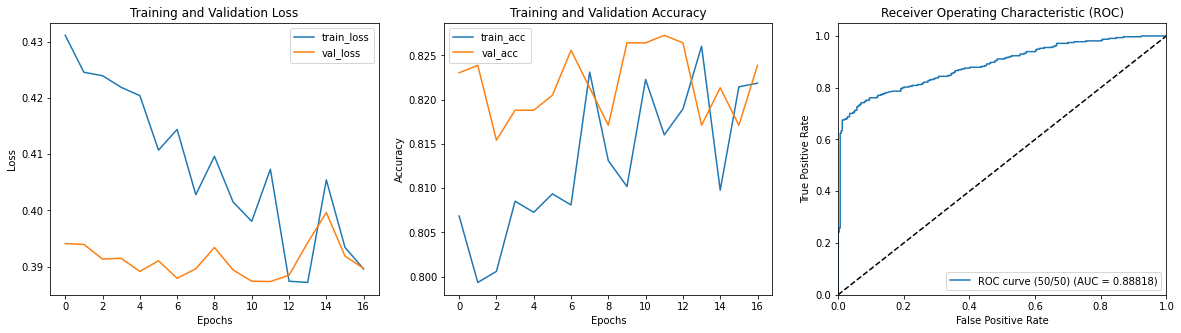

In [ ]:
dis_preds = multi_model_dis.predict({'first_input': dis_test_data_1, 'second_input': dis_test_data_2})
model_plots(history_dis, dis_test_labels1.flatten().astype(int), dis_preds, pre=False)

**Comments**

Performance remains similar to the original model, as shown by the accuracy and ROC curve.

**Test Accuracy**

In [ ]:
test_loss_dis1, test_acc_dis1 = multi_model_dis.evaluate({'first_input': dis_test_data_1, 'second_input': dis_test_data_2}, dis_test_labels1.flatten().astype(int))

20/20 [==============================] - 0s 4ms/step - loss: 0.3897 - accuracy: 0.8296


**Comments**

No significant change from the pre-trained model

#### QE Dataset
Now testing on QE data

In [ ]:
multi_model_qe = keras.models.load_model("content/gdrive/trained_multi_model")

In [ ]:
test_loss_qe1, test_acc_qe1 = multi_model_qe.evaluate({'first_input': qe_test_data_1, 'second_input': qe_test_data_2}, qe_test_labels1.flatten().astype(int))

3/3 [==============================] - 0s 6ms/step - loss: 0.2085 - accuracy: 0.9375


**Comments**

Test accuracy on the QE dataset is very strong (0.10 increase from the original dataset). This is likely due to the 'cleaner' tracks making identification of events easier.

In [ ]:
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=3, restore_best_weights = True)

history_qe = multi_model_qe.fit({'first_input': qe_train_data_1, 'second_input': qe_train_data_2}, qe_train_labels1.flatten().astype(int), 
                     validation_split=0.20, batch_size =64, epochs=100, shuffle=True, callbacks=[earlystop_callback])

Epoch 1/100
6/6 [==============================] - 3s 122ms/step - loss: 0.2798 - accuracy: 0.8961 - val_loss: 0.2290 - val_accuracy: 0.9341
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 0.2283 - accuracy: 0.9288 - val_loss: 0.2128 - val_accuracy: 0.9341
Epoch 3/100
6/6 [==============================] - 0s 21ms/step - loss: 0.2365 - accuracy: 0.9199 - val_loss: 0.2002 - val_accuracy: 0.9341
Epoch 4/100
6/6 [==============================] - 0s 21ms/step - loss: 0.2218 - accuracy: 0.9169 - val_loss: 0.1916 - val_accuracy: 0.9281
Epoch 5/100
6/6 [==============================] - 0s 20ms/step - loss: 0.2025 - accuracy: 0.9288 - val_loss: 0.1974 - val_accuracy: 0.9281
Epoch 6/100
6/6 [==============================] - 0s 20ms/step - loss: 0.2407 - accuracy: 0.9139 - val_loss: 0.1985 - val_accuracy: 0.9222
Epoch 7/100
6/6 [==============================] - 0s 21ms/step - loss: 0.2116 - accuracy: 0.9288 - val_loss: 0.1808 - val_accuracy: 0.9341
Epoch 8/100
6/6 [==

In [ ]:
get_feature_maps(multi_model_qe, dis_test_data_1[30])

3/3 [==============================] - 0s 4ms/step


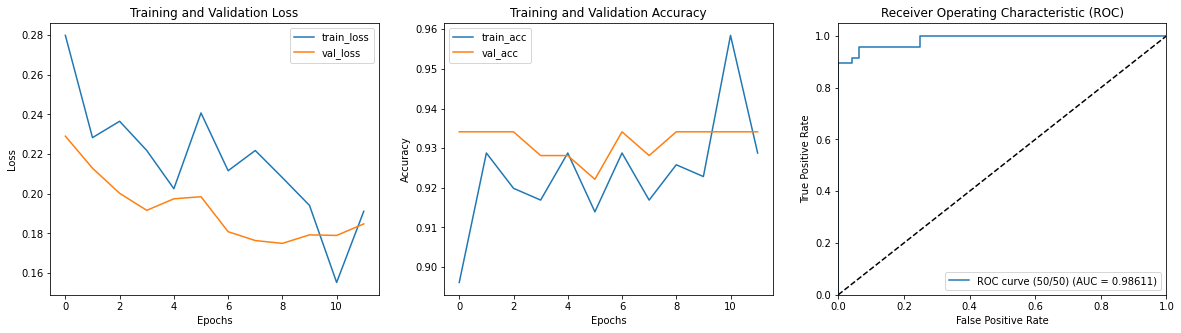

In [ ]:
qe_preds = multi_model_qe.predict({'first_input': qe_test_data_1, 'second_input': qe_test_data_2})
model_plots(history_qe,qe_test_labels1.flatten().astype(int), qe_preds, pre=False)

**Comments**

Above we can see the ROC curve plot, which does not look quite like a smooth curve as before. This is down to the lack of testing data, which would suggest that the ROC curve may not be very reliable to use as a comparison in this case.

In [ ]:
test_loss_qe1, test_acc_qe1 = multi_model_qe.evaluate({'first_input': qe_test_data_1, 'second_input': qe_test_data_2}, qe_test_labels1.flatten().astype(int))

3/3 [==============================] - 0s 6ms/step - loss: 0.1566 - accuracy: 0.9271


**Trained model test accuracy**

After training there was not a significant improvement, as it seems the original MVCNN model has learnt all the key features of the images already, and any further training is simply overfitting the model.

**Conclusion**

Comparing the DIS and QE accuracy, it is clear that QE has higher accuracy, even though there is much less data. This suggests the images being 'clean' makes a significant difference when it comes to identifying features for the cnn model.

### 3. Classifier performance on low/high energy neutrinos

Similar to before, we need to separate into two testing datasets: one with low energy, and one with high energy. We can see from the below plot that there is an exponential decay distribution in neutrino energy, so to preserve a reasonable amount of data for each test set, we can set the low energy threshold to energies < 10, and high energy as those above.

**Defining low/high energy threshold**

To define a threshold to classify an energy as low or high, we can first explore the data distribution below.

In [ ]:
nuenergy = np.array(df['neutrino']['nuenergy'])

fig, ax = plt.subplots()
ax.hist(nuenergy)

ax.set_xlabel('Neutrino Energy')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Neutrino Energy')

plt.show()

We see there is an exponential decay in number of events as energy is increased, which means the higher the energy, the fewer data points we have to work with. Keeping this in mind, we can set the low energy threshold to 5. This can obviously be changed (and will be changed) to gauge performance. 

**Expectations**

Based on the fact that the neutrino images are formed using scintillation light observed by photo-detectors, I expect that a higher energy neutrino will provide greater intensity scintillation and therefore this may translate to a distinct feature in the image, making the track appear brighter. This could mean that the accuracy in classification on high energy neutrinos may be higher than on low energy neutrinos.

In [ ]:
# Get the training and test datasets
train_data_energy, train_labels_energy = get_data_and_labels(1, 30, metadata_type='nuenergy')
train_data_energy, train_labels_vmucc = get_data_and_labels(1, 30, metadata_type='interaction')
test_data_energy, test_labels_energy = get_data_and_labels(31, 35, metadata_type='nuenergy')
test_data_energy, test_labels_vmucc = get_data_and_labels(31, 35, metadata_type='interaction')

# Put into dictionaries to easily handle data
energy_data_dict_train = {'images': train_data_energy,'nuenergy': train_labels_energy,'ccevent': train_labels_vmucc}
energy_data_dict_test = {'images': test_data_energy,'nuenergy': test_labels_energy,'ccevent': test_labels_vmucc}

Below, a function is defined to get separate the high and low energy data, depending on the threshold.

In [ ]:
def split_data(energy_data_dict, threshold=10.0):
    # Extract the image data, nuenergy, and ccevent columns from the dictionary
    images = energy_data_dict['images']
    nuenergy = energy_data_dict['nuenergy']
    ccevent = energy_data_dict['ccevent']
    
    # Find the indices of the low and high energy images
    low_energy_indices = np.where(nuenergy < threshold)[0]
    high_energy_indices = np.where(nuenergy >= threshold)[0]
    
    # Extract the low and high energy image data and labels
    low_energy_data = images[low_energy_indices]
    low_energy_labels = ccevent[low_energy_indices]
    high_energy_data = images[high_energy_indices]
    high_energy_labels = ccevent[high_energy_indices]
    
    # Return the low and high energy data and labels as numpy arrays in the correct order
    return low_energy_data, low_energy_labels, high_energy_data, high_energy_labels

In [ ]:
# Separate into high and low energy
low_energy_train_data, low_energy_train_labels, high_energy_train_data, high_energy_train_labels = split_data(energy_data_dict_train, threshold=5.0)
low_energy_test_data, low_energy_test_labels, high_energy_test_data, high_energy_test_labels = split_data(energy_data_dict_test, threshold=5.0)

# Rebalance datasets
low_energy_train_data1, low_energy_train_labels1 = half_split(low_energy_train_data, low_energy_train_labels)
high_energy_train_data1, high_energy_train_labels1 = half_split(high_energy_train_data, high_energy_train_labels)
low_energy_test_data1, low_energy_test_labels1 = half_split(low_energy_test_data, low_energy_test_labels)
high_energy_test_data1, high_energy_test_labels1 = half_split(high_energy_test_data, high_energy_test_labels)

# Split the image pairs into separate arrays for the first and second image

# Low energy
low_energy_train_data_1 = low_energy_train_data1[:, :, :, 0]
low_energy_train_data_2 = low_energy_train_data1[:, :, :, 1]
low_energy_test_data_1 = low_energy_test_data1[:, :, :, 0]
low_energy_test_data_2 = low_energy_test_data1[:, :, :, 1]

# High energy
high_energy_train_data_1 = high_energy_train_data1[:, :, :, 0]
high_energy_train_data_2 = high_energy_train_data1[:, :, :, 1]
high_energy_test_data_1 = high_energy_test_data1[:, :, :, 0]
high_energy_test_data_2 = high_energy_test_data1[:, :, :, 1]

In [ ]:
# Load in our pre-trained model
low_e_model = keras.models.load_model("content/gdrive/trained_multi_model")

In [ ]:
# Test the model accuracy
low_e_model.evaluate({'first_input': low_energy_test_data_1, 'second_input': low_energy_test_data_2}, low_energy_test_labels1.flatten().astype(int))

777/777 [==============================] - 3s 4ms/step - loss: 0.4410 - accuracy: 0.8083


[0.44096675515174866, 0.8083427548408508]

In [ ]:
# Model predictions
low_e_preds1 = low_e_model.predict({'first_input': low_energy_test_data_1, 'second_input': low_energy_test_data_2})

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(low_energy_test_labels1.flatten().astype(int), low_e_preds1)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for each test set
plt.plot(fpr, tpr, label='ROC curve (50/50) (AUC = %0.5f)' % roc_auc)

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Set axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

# Add legend
plt.legend(loc="lower right")

# Show the plot
plt.show()

**Comments**

Accuracy remains high, as expected. This is reflected in the ROC curve.

In [ ]:
# Load the pre-trained model
high_e_model = keras.models.load_model("content/gdrive/trained_multi_model")

In [ ]:
high_e_model.evaluate({'first_input': high_energy_test_data_1, 'second_input': high_energy_test_data_2}, high_energy_test_labels1.flatten().astype(int))

1023/1023 [==============================] - 4s 4ms/step - loss: 0.3694 - accuracy: 0.8491


[0.36943385004997253, 0.8491379022598267]

In [ ]:
# Model predictions
high_e_preds1 = high_e_model.predict({'first_input': high_energy_test_data_1, 'second_input': high_energy_test_data_2})

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(high_energy_test_labels1.flatten().astype(int), high_e_preds1)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for each test set
plt.plot(fpr, tpr, label='ROC curve (50/50) (AUC = %0.5f)' % roc_auc)

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Set axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

# Add legend
plt.legend(loc="lower right")

# Show the plot
plt.show()

**Comments**

It seems that the high energy data gives an accuracy around the same, if not higher than the low energy data. This differs from my initial expectation, since there is less data for high energy. However, this can be justified because the energy does not clearly affect the images themselves in any way, so doesnt affect the model performance. So we might be able to conclude or suggest that the actual patterns/features on the images themselves has more of an impact than number of data points, assuming the number of data points is above a certain threshold (maybe 10,000s).

### 4. Classifier performance on low/high energy muons

Now, a similar method will be repeated to test the classifier performance on low and high energy muons. First we will explore the energy distribution of the data.

Muon neutrino events have interaction code 0, 1, 2, 3, so we first retrieve these data points. Then, a threshold energy must be selected to separate our low and high energy muon data.



In [ ]:
# Get raw data
train_data_raw, train_labels_raw = get_data_and_labels_raw(1, 15, metadata_type='interaction')
test_data_raw, test_labels_raw = get_data_and_labels_raw(31, 35, metadata_type='interaction')

# Get energy data
train_labels_energy = get_data_and_labels_raw(1, 15, metadata_type='nuenergy', just_labels=True)
test_labels_energy = get_data_and_labels_raw(31, 35, metadata_type='nuenergy', just_labels=True)

In [ ]:
def drop_energy_by_interaction(labels_raw, labels_energy):
  '''
  Function that separates the dataset by the interactio code (keeps only muon neutrinos)
  '''
    mask = ~(labels_raw <= 3)
    filtered_labels_energy = labels_energy[mask]
    return filtered_labels_energy

In [ ]:
new_energy = drop_energy_by_interaction(train_labels_raw, train_labels_energy)

(array([6.368e+03, 3.426e+03, 1.665e+03, 5.870e+02, 2.320e+02, 9.800e+01,
        3.200e+01, 1.300e+01, 8.000e+00, 6.000e+00]),
 array([ 0.        ,  7.93029499, 15.86058998, 23.79088402, 31.72117996,
        39.651474  , 47.58176804, 55.51206207, 63.44235992, 71.37265015,
        79.302948  ]),
 <BarContainer object of 10 artists>)

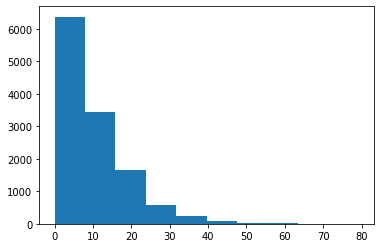

In [ ]:
plt.hist(new_energy)

The distribution of energies seems exponentially decaying

In [ ]:
def remove_elements(train_data_raw, train_labels_raw, train_labels_energy, threshold, low=True):

    if low == True:
      # Find the indices where the conditions are both met
      indices = np.where((train_labels_raw <= 3) & (train_labels_energy >= threshold))

    elif low == False:
      # Find the indices where the conditions are both met
      indices = np.where((train_labels_raw <= 3) & (train_labels_energy <= threshold))
    
    # Remove the corresponding elements from the arrays
    train_data_raw = np.delete(train_data_raw, indices, axis=0)
    train_labels_raw = np.delete(train_labels_raw, indices)
    train_labels_energy = np.delete(train_labels_energy, indices)
    
    return train_data_raw, train_labels_raw

In [ ]:
# Train data
train_data_low, train_labels_low = remove_elements(train_data_raw, train_labels_raw, train_labels_energy, threshold=5.0, low=True)
train_data_high, train_labels_high = remove_elements(train_data_raw, train_labels_raw, train_labels_energy, threshold=5.0, low=False)

# Test data
test_data_low, test_labels_low = remove_elements(test_data_raw, test_labels_raw, test_labels_energy, threshold=5.0, low=True)
test_data_high, test_labels_high = remove_elements(test_data_raw, test_labels_raw, test_labels_energy, threshold=5.0, low=False)

# Now convert the labels into True/False as usual
train_labels_low1 = get_cc_event_labels(train_labels_low)[:, np.newaxis]
train_labels_high1 = get_cc_event_labels(train_labels_high)[:, np.newaxis]

test_labels_low1 = get_cc_event_labels(test_labels_low)[:, np.newaxis]
test_labels_high1 = get_cc_event_labels(test_labels_high)[:, np.newaxis]

print(percentage_true(train_labels_low1))
print(percentage_true(train_labels_high1))

# Equalise the dataset
train_data_low2, train_labels_low2 = half_split(train_data_low, train_labels_low1)
train_data_high2, train_labels_high2 = half_split(train_data_high, train_labels_high1)

test_data_low2, test_labels_low2 = half_split(test_data_low, test_labels_low1)
test_data_high2, test_labels_high2 = half_split(test_data_high, test_labels_high1)

print(percentage_true(train_labels_low2))
print(percentage_true(train_labels_high2))

# Low energy
low_energy_train_data_1 = train_data_low2[:, :, :, 0]
low_energy_train_data_2 = train_data_low2[:, :, :, 1]

# High energy
high_energy_train_data_1 = train_data_high2[:, :, :, 0]
high_energy_train_data_2 = train_data_high2[:, :, :, 1]

# Low energy
low_energy_test_data_1 = test_data_low2[:, :, :, 0]
low_energy_test_data_2 = test_data_low2[:, :, :, 1]

# High energy
high_energy_test_data_1 = test_data_high2[:, :, :, 0]
high_energy_test_data_2 = test_data_high2[:, :, :, 1]

74.90666935727978
81.39837544316295
50.0
50.0


In [ ]:
mu_low_model = keras.models.load_model("content/gdrive/trained_multi_model")

In [ ]:
mu_low_model.evaluate({'first_input': low_energy_test_data_1, 'second_input': low_energy_test_data_2}, test_labels_low2.flatten().astype(int))

255/255 [==============================] - 1s 4ms/step - loss: 0.4326 - accuracy: 0.8131


[0.4326329827308655, 0.8130829930305481]

In [ ]:
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=7, restore_best_weights = True)

history_low_mu = mu_low_model.fit({'first_input': low_energy_train_data_1, 'second_input': low_energy_train_data_2}, train_labels_low2.flatten().astype(int), 
                     validation_split=0.33, batch_size =64, epochs=100, shuffle=True, callbacks=[earlystop_callback])

Epoch 1/100
261/261 [==============================] - 7s 17ms/step - loss: 0.4731 - accuracy: 0.7894 - val_loss: 0.4062 - val_accuracy: 0.8249
Epoch 2/100
261/261 [==============================] - 4s 16ms/step - loss: 0.4623 - accuracy: 0.7949 - val_loss: 0.3910 - val_accuracy: 0.8291
Epoch 3/100
261/261 [==============================] - 4s 16ms/step - loss: 0.4577 - accuracy: 0.7940 - val_loss: 0.3936 - val_accuracy: 0.8237
Epoch 4/100
261/261 [==============================] - 4s 15ms/step - loss: 0.4531 - accuracy: 0.7980 - val_loss: 0.4034 - val_accuracy: 0.8202
Epoch 5/100
261/261 [==============================] - 4s 15ms/step - loss: 0.4518 - accuracy: 0.7983 - val_loss: 0.3994 - val_accuracy: 0.8313
Epoch 6/100
261/261 [==============================] - 4s 17ms/step - loss: 0.4429 - accuracy: 0.8021 - val_loss: 0.4006 - val_accuracy: 0.8233
Epoch 7/100
261/261 [==============================] - 4s 15ms/step - loss: 0.4452 - accuracy: 0.8004 - val_loss: 0.3885 - val_accuracy:

In [ ]:
mu_low_model.evaluate({'first_input': low_energy_test_data_1, 'second_input': low_energy_test_data_2}, test_labels_low2.flatten().astype(int))

255/255 [==============================] - 1s 4ms/step - loss: 0.3821 - accuracy: 0.8370


[0.38208118081092834, 0.8370152115821838]

In [ ]:
mu_high_model = keras.models.load_model("content/gdrive/trained_multi_model")

In [ ]:
mu_high_model.evaluate({'first_input': high_energy_test_data_1, 'second_input': high_energy_test_data_2}, test_labels_high2.flatten().astype(int))

255/255 [==============================] - 1s 3ms/step - loss: 0.3870 - accuracy: 0.8413


[0.38695764541625977, 0.8413107395172119]

In [ ]:
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=7, restore_best_weights = True)

history_high_mu = mu_high_model.fit({'first_input': high_energy_train_data_1, 'second_input': high_energy_train_data_2}, train_labels_high2.flatten().astype(int), 
                     validation_split=0.33, batch_size =64, epochs=100, shuffle=True, callbacks=[earlystop_callback])

Epoch 1/100
261/261 [==============================] - 7s 18ms/step - loss: 0.4576 - accuracy: 0.8088 - val_loss: 0.3723 - val_accuracy: 0.8494
Epoch 2/100
261/261 [==============================] - 4s 16ms/step - loss: 0.4482 - accuracy: 0.8148 - val_loss: 0.3684 - val_accuracy: 0.8486
Epoch 3/100
261/261 [==============================] - 4s 16ms/step - loss: 0.4429 - accuracy: 0.8135 - val_loss: 0.3682 - val_accuracy: 0.8499
Epoch 4/100
261/261 [==============================] - 4s 16ms/step - loss: 0.4451 - accuracy: 0.8162 - val_loss: 0.3728 - val_accuracy: 0.8506
Epoch 5/100
261/261 [==============================] - 4s 15ms/step - loss: 0.4423 - accuracy: 0.8156 - val_loss: 0.3694 - val_accuracy: 0.8473
Epoch 6/100
261/261 [==============================] - 4s 16ms/step - loss: 0.4407 - accuracy: 0.8165 - val_loss: 0.3676 - val_accuracy: 0.8512
Epoch 7/100
261/261 [==============================] - 4s 16ms/step - loss: 0.4355 - accuracy: 0.8189 - val_loss: 0.3610 - val_accuracy:

In [ ]:
mu_high_model.evaluate({'first_input': high_energy_test_data_1, 'second_input': high_energy_test_data_2}, test_labels_high2.flatten().astype(int))

255/255 [==============================] - 1s 4ms/step - loss: 0.3726 - accuracy: 0.8429


[0.3726096749305725, 0.8429062366485596]

**Comments**

It looks like the higher energy events are easier to classify than low energy events, which was as expected. Additionally, training the model on specifically low energy events helped to improve accuracy by 2-3%, which suggests there actually are more features potentially to be learnt.

### Variables in the metadata that affect classifier performance

Based on the analysis and testing that was completed in this section, it was found that the following factors affected classifier performance: 

1. Image quality: essentially how clear the image was. This was important given that by viewing the feature maps we can see that the neural network picks up on minor pixel details, and the noiser it is then the more the CNN can get misled.

2. The distribution of data. This varied depending on the type of metadata that was chosen. i.e, some metadata were overrepresented or underrepresented in the dataset. This may have affected the model during training, such that it performed worse when there were very few of certain images, since it didn't have many images to train on for that specific case.


As for specific variables that most affected the performance:

1. Whether an interaction was DIS or QE. This was because the images were quite different (messy vs clean) depending on what the interaction was, therefore this impacted the accuracy.

2. Neutrino energy. This was likely because higher energy means brighter tracks on the images, which are easier for the CNN to distinguish.


---
## Extensions

### 1. A machine learning algorithm to determine the energy of the neutrino

Since the energy is a continuous value, this can be framed as a regression problem. The approach I will take would be to simply adapt our multi-view CNN to a regression model, and adapt to improve performance from there if needed.

First, obtain a new dataset with the energy metadata.

Approach:

As for the ML approach to this problem, based on the reviewed literature [5], and the initial testing, we can consider a combination of classification and regression to tackle this task. 

Since trying purely regression to predict the exact energies for the images proved quite difficult when trying to get reasonably high accuracy, another approach could be to classify the images into different bins of energies. Further extension to this could be to use these classifications and then perform regression to find the exact values. I anticipate this will be an easier way of improving accuracy since the range of possible values would be smaller.

In [ ]:
# Retrieve the raw energy data
train_data_raw, train_labels_raw = get_data_and_labels_raw(1, 20, metadata_type='nuenergy')
test_data_raw, test_labels_raw = get_data_and_labels_raw(76, 80, metadata_type='nuenergy')

In [ ]:
# Split the data into each plane of view
etrain_data_1 = train_data_raw[:, :, :, 0]
etrain_data_2 = train_data_raw[:, :, :, 1]

etest_data_1 = test_data_raw[:, :, :, 0]
etest_data_2 = test_data_raw[:, :, :, 1]

We may see below that there is a large range of values the energy can take (continuous), therefore this is a regression problem.

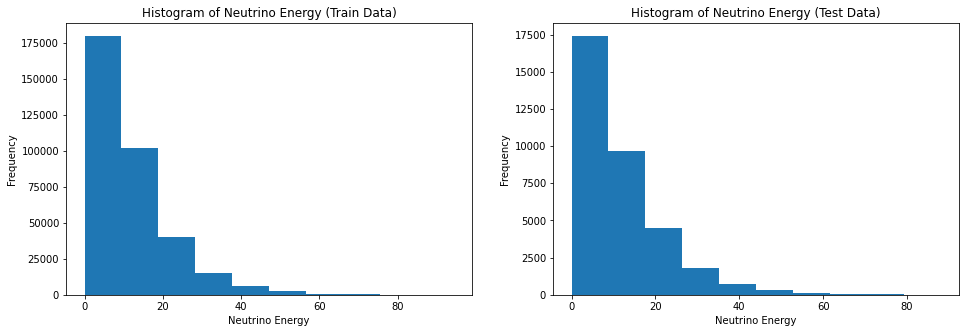

In [ ]:
# Plot histograms side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot histogram of train_labels_raw
ax1.hist(train_labels_raw)
ax1.set_xlabel('Neutrino Energy')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Neutrino Energy (Train Data)')

# Plot histogram of test_labels_raw
ax2.hist(test_labels_raw)
ax2.set_xlabel('Neutrino Energy')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Neutrino Energy (Test Data)')

plt.show()

next, the regression model for energy is defined. 

In [ ]:
# Define regression model
def regression_model():

    # Define the inputs
    first_input = Input(shape=(100, 80, 1), name='first_input')
    second_input = Input(shape=(100, 80, 1), name='second_input')

    # Define the convolutional layers for the first input
    conv1_1 = Conv2D(16, (3, 3), activation='relu')(first_input)
    pool1_1 = MaxPooling2D(pool_size=(2, 2))(conv1_1)
    dropout1_1 = Dropout(0.20)(pool1_1)

    conv1_2 = Conv2D(16, (3, 3), activation='relu')(dropout1_1)
    pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
    dropout1_2 = Dropout(0.20)(pool1_2)

    conv1_3 = Conv2D(16, (3, 3), activation='relu')(dropout1_2)
    pool1_3 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
    dropout1_3 = Dropout(0.20)(pool1_3)

    # Define the convolutional layers for the second input
    conv2_1 = Conv2D(16, (3, 3), activation='relu')(second_input)
    pool2_1 = MaxPooling2D(pool_size=(2, 2))(conv2_1)
    dropout2_1 = Dropout(0.20)(pool2_1)

    conv2_2 = Conv2D(16, (3, 3), activation='relu')(dropout2_1)
    pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
    dropout2_2 = Dropout(0.20)(pool2_2)

    conv2_3 = Conv2D(16, (3, 3), activation='relu')(dropout2_2)
    pool2_3 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
    dropout2_3 = Dropout(0.20)(pool2_3)

    # Concatenate the output of the convolutional layers
    merged = Concatenate()([dropout1_3, dropout2_3])

    # Flatten the output
    flatten = Flatten()(merged)

    # Define the fully connected layers
    fc1 = Dense(8, activation='relu')(flatten)
    dropout3 = Dropout(0.30)(fc1)
    fc2 = Dense(1, activation='linear')(dropout3)

    # Create the model
    multi_model = Model(inputs=[first_input, second_input], outputs=fc2)

    # Compile the model
    multi_model.compile(loss='mean_squared_error' , optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mean_absolute_error'])

    return multi_model


# Try an inception module as well
def inception_module(layer_in, filter1x1, filter3x3, filter5x5, filter_pool):
    # 1x1 convolution
    conv1 = Conv2D(filter1x1, (1,1), padding='same', activation='relu')(layer_in)
    
    # 3x3 convolution
    conv3 = Conv2D(filter3x3, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(filter3x3, (3,3), padding='same', activation='relu')(conv3)

    # 5x5 convolution
    conv5 = Conv2D(filter5x5, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(filter5x5, (5,5), padding='same', activation='relu')(conv5)
    
    # Pooling
    pool = MaxPooling2D((2,2), strides = 1, padding='same')(layer_in)
    pool = Conv2D(filter_pool, (1,1), padding='same', activation='relu')(pool)

    # concatenate filters, assumes filters/channels last
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)

    return layer_out


# Define a second regression model to try and improve performance by changing parameters
def regression_model2():

    # Define the inputs
    first_input = Input(shape=(100, 80, 1), name='first_input')
    second_input = Input(shape=(100, 80, 1), name='second_input')

    # Define the convolutional layers for the first input
    conv1_1 = Conv2D(128, (7, 7), activation='relu')(first_input)
    pool1_1 = MaxPooling2D(pool_size=(6, 6))(conv1_1)
    dropout1_1 = Dropout(0.20)(pool1_1)

    conv1_2 = Conv2D(64, (5, 5), activation='relu')(dropout1_1)
    pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
    dropout1_2 = Dropout(0.20)(pool1_2)

    # add an inception module
    incp1_1 = inception_module(dropout1_2,32,32,32,2)

    conv1_3 = Conv2D(64, (3, 3), activation='relu')(incp1_1)
    pool1_3 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
    dropout1_3 = Dropout(0.20)(pool1_3)

    # Define the convolutional layers for the second input
    conv2_1 = Conv2D(128, (7, 7), activation='relu')(second_input)
    pool2_1 = MaxPooling2D(pool_size=(6, 6))(conv2_1)
    dropout2_1 = Dropout(0.20)(pool2_1)

    conv2_2 = Conv2D(64, (5, 5), activation='relu')(dropout2_1)
    pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
    dropout2_2 = Dropout(0.20)(pool2_2)

    #Add an inception module
    incp2_1 = inception_module(dropout2_2,32,32,32,2)

    conv1_3 = Conv2D(64, (3, 3), activation='relu')(incp2_1)
    conv2_3 = Conv2D(64, (3, 3), activation='relu')(dropout2_2)
    pool2_3 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
    dropout2_3 = Dropout(0.20)(pool2_3)

    # Concatenate the output of the convolutional layers
    merged = Concatenate()([dropout1_3, dropout2_3])

    # Flatten the output
    flatten = Flatten()(merged)

    # Define the fully connected layers
    fc1 = Dense(128, activation='relu')(flatten)
    dropout3 = Dropout(0.40)(fc1)
    fc2 = Dense(1, activation='linear')(dropout3)

    # Create the model
    multi_model = Model(inputs=[first_input, second_input], outputs=fc2)

    # Compile the model
    multi_model.compile(loss='mean_squared_error' , optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mean_absolute_error'])

    return multi_model

#regression_model = regression_model()
regression_model = regression_model2()

regression_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 first_input (InputLayer)       [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_9 (Conv2D)              (None, 94, 74, 128)  6400        ['first_input[0][0]']            
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 15, 12, 128)  0          ['conv2d_9[0][0]']               
                                                                                                  
 dropout_2 (Dropout)            (None, 15, 12, 128)  0           ['max_pooling2d_4[0][0]']    

**Comments**

This model is adapted slightly from the usual multi-view cnn, for the regression problem. 

**Updated Comments**

A new variation of the model, with increased filters (7x7 on first layer, 3x3 on second) for each branch as well as increased number of neurons (64 per convolutional layer and 128 for dense output layer), has resulted in greater training performance. A single inception module was also added on each branch in between convolutional layers.

In [ ]:
# Training the model with a callback to avoid overfitting
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

regression_history = regression_model.fit({'first_input': etrain_data_1, 'second_input': etrain_data_2}, train_labels_raw.flatten().astype(int), batch_size=64, epochs=100, 
                                          validation_split=0.20, shuffle=True, callbacks=[earlystop_callback])

Epoch 1/100
1736/1736 [==============================] - 83s 45ms/step - loss: 88.1320 - mean_absolute_error: 6.8095 - val_loss: 86.2506 - val_mean_absolute_error: 6.2853
Epoch 2/100
1736/1736 [==============================] - 77s 44ms/step - loss: 82.4639 - mean_absolute_error: 6.5289 - val_loss: 83.0965 - val_mean_absolute_error: 6.2154
Epoch 3/100
1736/1736 [==============================] - 76s 44ms/step - loss: 80.5535 - mean_absolute_error: 6.4255 - val_loss: 80.4050 - val_mean_absolute_error: 6.2772
Epoch 4/100
1736/1736 [==============================] - 76s 44ms/step - loss: 79.2344 - mean_absolute_error: 6.3682 - val_loss: 86.1289 - val_mean_absolute_error: 6.2429
Epoch 5/100
1736/1736 [==============================] - 77s 44ms/step - loss: 78.4212 - mean_absolute_error: 6.3243 - val_loss: 79.4391 - val_mean_absolute_error: 6.2000
Epoch 6/100
1736/1736 [==============================] - 77s 44ms/step - loss: 77.2254 - mean_absolute_error: 6.2835 - val_loss: 80.8888 - val_me

**Comments**

Validation mae ends at around 6.5-6.6, which suggests the predictions deviate 6.5 on average from the true values. Given the range of possible values is up to around 90 GeV, this is not so bad performance. However, this is not so good at the lower energy range, where there are so many data points so distinguishing between smaller ranges is important.

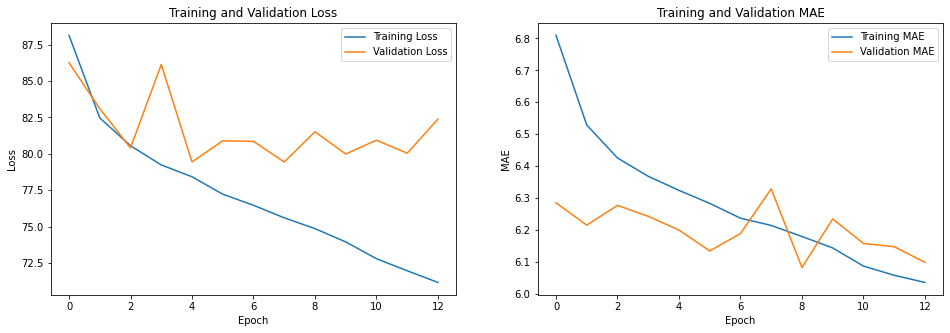

In [ ]:
# Get the training loss and MAE history
train_loss = regression_history.history['loss']
train_mae = regression_history.history['mean_absolute_error']

# Get the validation loss and MAE history
val_loss = regression_history.history['val_loss']
val_mae = regression_history.history['val_mean_absolute_error']

# Plot the training and validation loss
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Test the model
r_acc = regression_model.evaluate({'first_input': etest_data_1, 'second_input': etest_data_2}, test_labels_raw.flatten().astype(int))

1081/1081 [==============================] - 7s 6ms/step - loss: 77.5438 - mean_absolute_error: 6.3060


In [ ]:
# View model predictions
r_predictions = regression_model.predict({'first_input': etest_data_1, 'second_input': etest_data_2})

1081/1081 [==============================] - 5s 5ms/step


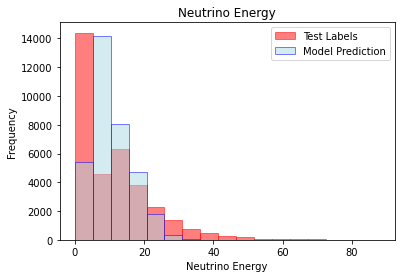

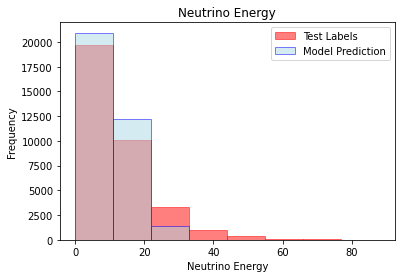

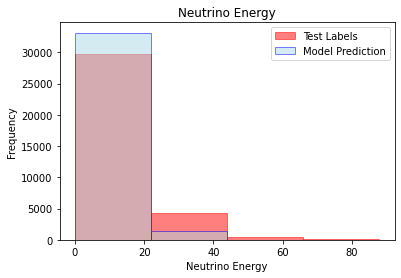

In [ ]:
# Calculate the range of values for the data
min_val = min(np.min(test_labels_raw), np.min(r_predictions))
max_val = max(np.max(test_labels_raw), np.max(r_predictions))

# different widths to try
bin_widths = [5,10,20]

for bin_width in bin_widths:

  # Calculate the number of bins based on the bin width
  num_bins = int(np.ceil((max_val - min_val) / bin_width))

  # Set the same bins for both histograms
  bins = np.linspace(min_val, max_val, num_bins)

  # Plot the histograms with the same bin width
  plt.hist(test_labels_raw, label='Test Labels', bins=bins, color='red', edgecolor='red', alpha=0.5, linewidth=1.0)
  plt.hist(r_predictions, label='Model Prediction', bins=bins, color='lightblue', edgecolor='blue',  alpha=0.5, linewidth=1.0)
  plt.title("Neutrino Energy")
  plt.xlabel('Neutrino Energy')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

**Comments**

Looking at the plots we can try to gauge the model's accuracy in the context of the neutrino energies. The first plot shows the bin width of 5. We can observe that the model is not really good at predicting energies within 5 GeV. Moving to the bin width of 10, the predictions overlap with the labels much more, suggesting the accuracy within 10 GeV is higher. Finally we see something similar with a width of 20. 




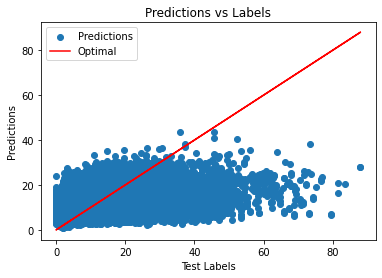

In [ ]:
## Assuming r_predictions and test_labels_raw are numpy arrays or lists
plt.scatter(test_labels_raw, r_predictions, label='Predictions')
plt.plot(test_labels_raw, test_labels_raw, color='red', label='Optimal')
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Predictions vs Labels')
plt.legend()
plt.show()

**Potential Improvements**

One reason for the discrepency between predictions and labels could be down to the fact that there are so many possible values that the neutrino energy can take. To improve this, we may consider framing this problem as a multiple classification first, to narrow down the energy ranges, before using regression to get the final result.

This is what will be attempted next. 

### Trying to classify energy ranges

In [ ]:
ranges = [(0,5), (10, 90)]

def preprocess_data(train_data, train_labels, ranges):
  '''
  Function to process the training data and labels, sorting them into different energy ranges. 
  Energy ranges may be changed.
  '''
  # initialise new labels
  new_labels = np.zeros(train_labels.shape, dtype=int)
    # loop over energy ranges
  for i, r in enumerate(ranges):

    # relabel and get training data
      mask = (train_labels >= r[0]) & (train_labels < r[1])
      new_labels[mask] = i
  return train_data, new_labels

In [ ]:
# Preprocess the data
train_data_bin, train_labels_bin = preprocess_data(train_data_raw, train_labels_raw, ranges)
test_data_bin, test_labels_bin = preprocess_data(test_data_raw, test_labels_raw, ranges)

# One-hot-encoding the labels
#train_labels2 = tf.keras.utils.to_categorical(train_labels_bin.flatten().astype(int), 1)
#test_labels2 = tf.keras.utils.to_categorical(test_labels_bin.flatten().astype(int), 1)

(array([74408.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 64459.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

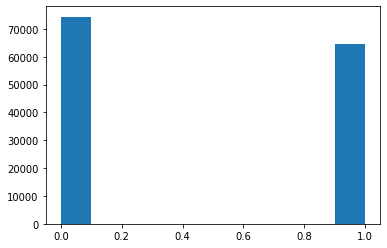

In [ ]:
plt.hist(train_labels_bin) # look at how many types of data we have

Note: The data imbalance is not so severe in this case, so I wont balance it for now.

In [ ]:
# Train data
train_data_1 = train_data_bin[:, :, :, 0]
train_data_2 = train_data_bin[:, :, :, 1]

In [ ]:
# Test data
test_data_1 = test_data_bin[:, :, :, 0]
test_data_2 = test_data_bin[:, :, :, 1]

In [ ]:
def multi_model_energy_regression():

  # Define the inputs
  first_input = Input(shape=(100, 80, 1), name='first_input')
  second_input = Input(shape=(100, 80, 1), name='second_input')

  # Define the convolutional layers for the first input
  conv1_1 = Conv2D(16, (3, 3), activation='relu')(first_input)
  pool1_1 = MaxPooling2D(pool_size=(2, 2))(conv1_1)
  dropout1_1 = Dropout(0.30)(pool1_1)

  conv1_2 = Conv2D(16, (3, 3), activation='relu')(dropout1_1)
  pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
  dropout1_2 = Dropout(0.30)(pool1_2)

  conv1_3 = Conv2D(16, (3, 3), activation='relu')(dropout1_2)
  pool1_3 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
  dropout1_3 = Dropout(0.30)(pool1_3)

  # Define the convolutional layers for the second input
  conv2_1 = Conv2D(16, (3, 3), activation='relu')(second_input)
  pool2_1 = MaxPooling2D(pool_size=(2, 2))(conv2_1)
  dropout2_1 = Dropout(0.30)(pool2_1)

  conv2_2 = Conv2D(16, (3, 3), activation='relu')(dropout2_1)
  pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
  dropout2_2 = Dropout(0.30)(pool2_2)

  conv2_3 = Conv2D(16, (3, 3), activation='relu')(dropout2_2)
  pool2_3 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
  dropout2_3 = Dropout(0.30)(pool2_3)

  # Concatenate the output of the convolutional layers
  merged = Concatenate()([dropout1_3, dropout2_3])

  # Flatten the output
  flatten = Flatten()(merged)

  # Define the fully connected layers
  fc1 = Dense(8, activation='relu')(flatten)
  dropout3 = Dropout(0.50)(fc1)
  fc2 = Dense(1, activation='sigmoid')(dropout3)

  # Create the model
  multi_model = Model(inputs=[first_input, second_input], outputs=fc2)

  # Compile the model
  multi_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

  return multi_model

multi_model_energy = multi_model_energy_regression()

In [ ]:
# Allows early stopping of model training - to avoid overfitting
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

# Train the model on your separate arrays for the first and second images
multi_energy_history = multi_model_energy.fit({'first_input': train_data_1, 'second_input': train_data_2}, train_labels_bin, epochs=100, 
                                batch_size=32, shuffle=True, validation_split=0.20, callbacks=[earlystop_callback])

In [ ]:
energy_classifier_acc = multi_model_energy.evaluate({'first_input': test_data_1, 'second_input': test_data_2}, test_labels2)

In [ ]:
energy_preds = multi_model_energy.predict({'first_input': test_data_1, 'second_input': test_data_2})

In [ ]:
# View the train/test loss and accuracy
model_plots(multi_energy_history, test_labels2, preds=energy_preds, pre_test_labels=None, pre_preds=None, pre=False, roc=False)

**Defining Multi-Class Classifier Performance**

Since there are multiple classes in this problem, it is no longer possible to use the ROC curve as a measure of performance. Research [1]  suggests potential metrics that can be used. This includes the confusion matrix, precision and recall, F1 score, cross entropy, mattheus correlation coefficient and cohen's kappa. 

First we will use the classification report, which shows precision, recall and F1 score. Precision is the proportion of true positive predictions among all positive predictions for a given class, recall is the proportion of true positive predictions among all true instances of that class, and F1-score is the harmonic mean of precision and recall.

The micro average row shows the overall precision, recall, and F1-score across all classes, weighted by the number of instances of each class. The macro average row shows the unweighted average of the precision, recall, and F1-score across all classes. The weighted average row shows the average of the precision, recall, and F1-score across all classes, weighted by the number of instances of each class.

The samples average row is only applicable for multi-label classification problems, and shows the average precision, recall, and F1-score across all samples.


In [ ]:
from sklearn.metrics import classification_report
classes = ['0 - 5 Gev', '5 - 90 GeV']
report = classification_report(test_labels2,  np.round(energy_preds), target_names=classes)
print(report)

from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

def plot_precision_recall(y_true, y_score):
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_precision_recall_curve(classifier, X_test, y_test, ax=ax)
    plt.title('Precision-Recall curve')
    plt.show()

plot_precision_recall(y_true, energy_preds)

**Comments**

It appears that no matter the energy range, the accuracy/precision is no better than guessing for the classifier. This suggests that regression is the best way forward. The classification of energy has been discontinued as it did not seem like the best use of time, particularly over regression.

However, completing this process has helped to determine ways to define performance for multi classifiers, which will be useful in further tasks.

### 2. A machine learning algorithm to determine the flavour of the neutrino

Similar to the Task 1, this is a classification problem. However this time it is a multi-classification problem as opposed to binary classification. The additional labels correspond to the different neutrino flavours. From the information given, we can classify 4 categories:

1. Muon Neutrinos (0, 1, 2, 3)
2. Electron Neutrinos (4, 5, 6, 7)
3. Tau Neutrinos (8, 9, 10, 11)
4. Other (12+)

We can give events with these flavours a value of 0, 1 and 2 respectively.

First we can explore the data to see the general neutrino flavour composition.


In [ ]:
# Get the raw data and labels for interactions
train_data_raw, train_labels_raw = get_data_and_labels_raw(1, 45, metadata_type='interaction')
test_data_raw, test_labels_raw = get_data_and_labels_raw(101, 105, metadata_type='interaction')

Below, the distribution of interactions is plotted on a histogram

Text(0, 0.5, 'Interaction Code')

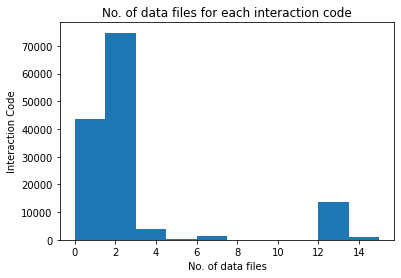

In [ ]:
# Plot the distribution of interactions
plt.title('No. of data files for each interaction code')
plt.hist(train_labels_raw)
plt.xlabel('No. of data files')
plt.ylabel('Interaction Code')

Note: There are no tau neutrinos in the data, so alternatively we can try to classify anything that is not a muon or electron neutrino in its place. Secondly, there is a lot more muon-neutrino data than any others. This will have to be balanced, and will likely result in large loss of data assuming we don't want to augment any (has been proven before not to be the best method).

This leads us to 3 classes.

Next, we will define some useful functions for this particular task

In [ ]:
def reassign_labels(train_labels):
  '''
    Inputs: train_labels (with original interaction labelling)
    Outputs: train_labels (with new labelling)
  '''
  # Reassign 0, 1, 2, and 3 to 0
  train_labels[(train_labels >= 0) & (train_labels <= 3)] = 0

  # Reassign 4, 5, 6, and 7 to 1
  train_labels[(train_labels >= 4) & (train_labels <= 7)] = 1

  # Reassign 8, 9, 10, and 11 to 2
  train_labels[(train_labels >= 8)] = 2

  return train_labels


def equalize_data(train_data, train_labels):
  '''
  This function will equalise our dataset among each of the three classification labels
  Inputs; train_data, train_labels
  Outputs; train_data, train_labels
  '''
  # Count the number of samples in each category
  num_samples_0 = np.sum(train_labels == 0)
  num_samples_1 = np.sum(train_labels == 1)
  num_samples_2 = np.sum(train_labels == 2)

  # Determine the smallest number of samples
  min_samples = min(num_samples_0, num_samples_1, num_samples_2)

  # Randomly select min_samples samples from each category
  indices_0 = np.random.choice(np.where(train_labels == 0)[0], size=min_samples, replace=False)
  indices_1 = np.random.choice(np.where(train_labels == 1)[0], size=min_samples, replace=False)
  indices_2 = np.random.choice(np.where(train_labels == 2)[0], size=min_samples, replace=False)

  # Concatenate the selected samples and their labels
  selected_data = np.concatenate([train_data[indices_0], train_data[indices_1], train_data[indices_2]])
  selected_labels = np.concatenate([train_labels[indices_0], train_labels[indices_1], train_labels[indices_2]])

  # Shuffle the selected data and labels
  shuffle_indices = np.random.permutation(len(selected_labels))
  selected_data = selected_data[shuffle_indices]
  selected_labels = selected_labels[shuffle_indices]

  return selected_data, selected_labels


In [ ]:
# Reassign the data labels, for each of our three classes
train_labels1 = reassign_labels(train_labels_raw)
test_labels1 = reassign_labels(test_labels_raw)

Text(0.5, 0, 'Neutrino Flavour Category')

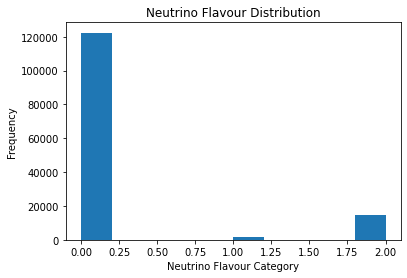

In [ ]:
# View the distribution of flavours
plt.title('Neutrino Flavour Distribution')
plt.hist(train_labels1)
plt.ylabel('Frequency')
plt.xlabel('Neutrino Flavour Category')

There's very few electron neutrinos in the dataset. As mentioned before, data augmentation techniques have been tested and don't seem to offer good enough replacements for lack of data, since it results in poor predictions on the lacking data set as the network ends up memorising the same data even if augmented. 

I wil try to see if the balanced data has enough data to make good accuracy.

(array([1694.,    0.,    0.,    0.,    0., 1694.,    0.,    0.,    0.,
        1694.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

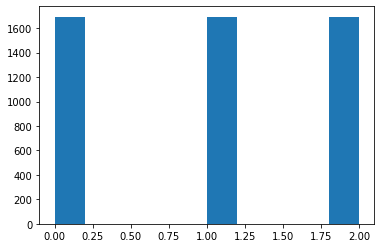

In [ ]:
# Balance our datasets to allow for unbiased training
train_data2, train_labels2 = equalize_data(train_data_raw, train_labels1)
test_data2, test_labels2 = equalize_data(test_data_raw, test_labels1)

# View the balanced dataset
plt.hist(train_labels2.flatten().astype(int))

In [ ]:
print(len(train_data2), len(train_labels2))
print(len(test_data2), len(test_labels2))

5082 5082
1338 1338


Note: The dataset is now balanced, however there is significantly less data as a consequence of that, given the nature of the imbalanced dataset. Using 50 datasets, there are 13,000 images for training. It is important to note that this may cause worse performance. Higher performance will almost certainly be found if more images are used for training. This was tested by comparing the use of 30 datasets (7,000 images after equalising) and 50 datasets (13,000 after equalising), which led to an increase from 30% to 60% accuracy (roughly).

In [ ]:
index_muon = np.where(train_labels2.flatten() == 0)
index_electron = np.where(train_labels2.flatten() == 1)
#index_other = np.where(train_labels2.flatten() == 1.9)

# print the index
print(index_muon)
print(index_electron)

(array([   1,    2,    3, ..., 5073, 5075, 5077]),)
(array([   0,    7,    8, ..., 5076, 5079, 5081]),)


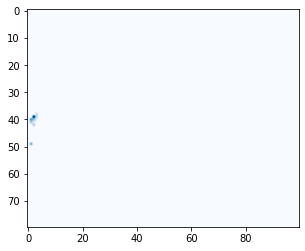

In [ ]:
plt.imshow(train_data2[3].reshape(2,100,80)[1].T, cmap='inferno')

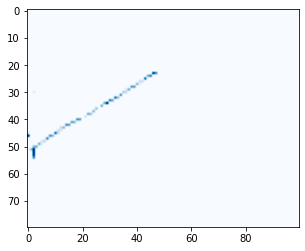

In [ ]:
plt.imshow(train_data2[6].reshape(2,100,80)[1].T, cmap='Blues')

In [ ]:
# One-hot-encoding the labels into 3 categories
train_labels2 = tf.keras.utils.to_categorical(train_labels2.flatten().astype(int), 3)
test_labels2 = tf.keras.utils.to_categorical(test_labels2.flatten().astype(int), 3)

In [ ]:
# Train data
train_data_1 = train_data2[:, :, :, 0]
train_data_2 = train_data2[:, :, :, 1]

# Test data
test_data_1 = test_data2[:, :, :, 0]
test_data_2 = test_data2[:, :, :, 1]

The below model is adapted from the multi-view CNN model. The number of dense outputs was changed to 3 to account for the new multiple classification problem and three categories. Secondly, the loss was changed to 'categorical_crossentropy' given that we are now considering a multiple classification problem. The activation function of the ouput layer was changed from sigmoid to softmax, given this is now a multiple classification model rather than binary classifier.

In [ ]:
def multi_model_flavour():

  # Define the inputs
  first_input = Input(shape=(100, 80, 1), name='first_input')
  second_input = Input(shape=(100, 80, 1), name='second_input')

  # Define the convolutional layers for the first input
  conv1_1 = Conv2D(16, (3, 3), activation='relu')(first_input)
  pool1_1 = MaxPooling2D(pool_size=(2, 2))(conv1_1)
  dropout1_1 = Dropout(0.20)(pool1_1)

  conv1_2 = Conv2D(16, (3, 3), activation='relu')(dropout1_1)
  pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
  dropout1_2 = Dropout(0.20)(pool1_2)

  conv1_3 = Conv2D(16, (3, 3), activation='relu')(dropout1_2)
  pool1_3 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
  dropout1_3 = Dropout(0.20)(pool1_3)

  # Define the convolutional layers for the second input
  conv2_1 = Conv2D(16, (3, 3), activation='relu')(second_input)
  pool2_1 = MaxPooling2D(pool_size=(2, 2))(conv2_1)
  dropout2_1 = Dropout(0.20)(pool2_1)

  conv2_2 = Conv2D(16, (3, 3), activation='relu')(dropout2_1)
  pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
  dropout2_2 = Dropout(0.20)(pool2_2)

  conv2_3 = Conv2D(16, (3, 3), activation='relu')(dropout2_2)
  pool2_3 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
  dropout2_3 = Dropout(0.20)(pool2_3)

  # Concatenate the output of the convolutional layers
  merged = Concatenate()([dropout1_3, dropout2_3])

  # Flatten the output
  flatten = Flatten()(merged)

  # Define the fully connected layers
  fc1 = Dense(8, activation='relu')(flatten)
  dropout3 = Dropout(0.4)(fc1)
  fc2 = Dense(3, activation='softmax')(dropout3)

  # Create the model
  multi_model = Model(inputs=[first_input, second_input], outputs=fc2)

  # Compile the model
  multi_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

  return multi_model

multi_model_flavour = multi_model_flavour()

multi_model_flavour.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 first_input (InputLayer)       [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 second_input (InputLayer)      [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_12 (Conv2D)             (None, 98, 78, 16)   160         ['first_input[0][0]']            
                                                                                            

In [ ]:
# Allows early stopping of model training - to avoid overfitting
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

# Train the model on your separate arrays for the first and second images
multi_flavour_history = multi_model_flavour.fit({'first_input': train_data_1, 'second_input': train_data_2}, train_labels2, epochs=100, 
                                batch_size=64, shuffle=True, validation_split=0.33, callbacks=[earlystop_callback])

Epoch 1/100
54/54 [==============================] - 4s 21ms/step - loss: 1.0972 - accuracy: 0.3719 - val_loss: 1.0482 - val_accuracy: 0.4267
Epoch 2/100
54/54 [==============================] - 1s 16ms/step - loss: 1.0470 - accuracy: 0.4036 - val_loss: 1.0106 - val_accuracy: 0.4756
Epoch 3/100
54/54 [==============================] - 1s 16ms/step - loss: 1.0225 - accuracy: 0.4521 - val_loss: 0.9844 - val_accuracy: 0.5149
Epoch 4/100
54/54 [==============================] - 1s 16ms/step - loss: 1.0103 - accuracy: 0.4747 - val_loss: 0.9872 - val_accuracy: 0.5369
Epoch 5/100
54/54 [==============================] - 1s 16ms/step - loss: 0.9914 - accuracy: 0.4689 - val_loss: 0.9826 - val_accuracy: 0.5298
Epoch 6/100
54/54 [==============================] - 1s 16ms/step - loss: 0.9862 - accuracy: 0.4768 - val_loss: 0.9740 - val_accuracy: 0.5340
Epoch 7/100
54/54 [==============================] - 1s 16ms/step - loss: 0.9658 - accuracy: 0.4771 - val_loss: 0.9568 - val_accuracy: 0.5292
Epoch 

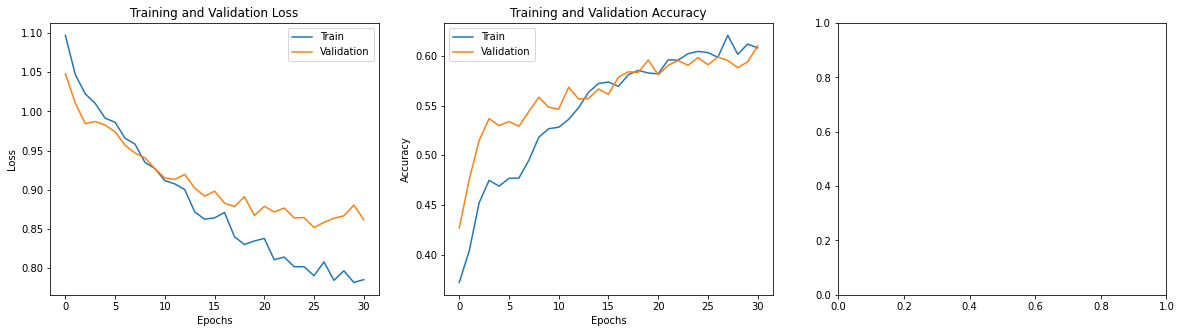

In [ ]:
# View the train/test loss and accuracy
model_plots(multi_flavour_history, test_labels2, preds=None, pre_test_labels=None, pre_preds=None, pre=False, roc=False)

**Comments**

Training and validation loss and accuracy shows some 'jumps' which was unexpected. This could be down to the lack of data, which means that the accuracy suddenly jumps up when a new feature is learnt. Accuracy peaks at around 61-62%. This is lower than the binary classifier, however it is important to note that in this case there are 3 classes, which means that classification is harder (a random guess would give 33.33% accuracy, rather than 50%), which suggests the accuracy is not terrible.

Note: training on 25,000 events improves accuracy to 65%



In [ ]:
flavour_loss, flavour_acc = multi_model_flavour.evaluate({'first_input': test_data_1, 'second_input': test_data_2}, test_labels2)

42/42 [==============================] - 0s 6ms/step - loss: 0.8557 - accuracy: 0.6069


In [ ]:
flavour_preds = multi_model_flavour.predict({'first_input': test_data_1, 'second_input': test_data_2})

42/42 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import classification_report
classes1 = ['Muon Neutrino', 'Electron Neutrino', 'Other']
report = classification_report(test_labels2,  np.round(flavour_preds), target_names=classes1)
print(report)

                   precision    recall  f1-score   support

    Muon Neutrino       0.88      0.53      0.66       446
Electron Neutrino       0.76      0.35      0.48       446
            Other       0.46      0.26      0.33       446

        micro avg       0.70      0.38      0.49      1338
        macro avg       0.70      0.38      0.49      1338
     weighted avg       0.70      0.38      0.49      1338
      samples avg       0.38      0.38      0.38      1338



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Comments**

- For the Muon Neutrino class, the model has a precision of 0.83, meaning that out of all the instances that the model predicted to be Muon Neutrino, 83% were correct. The recall is 0.66, meaning that out of all the actual instances of Muon Neutrino, the model correctly identified 66%. The F1-score is a harmonic mean of precision and recall, and in this case, it is 0.73.

- For the Electron Neutrino class, the model has a precision of 0.76, recall of 0.35, and F1-score of 0.48.

- For the Other class, the model has a precision of 0.34, recall of 0.31, and F1-score of 0.33. This suggests the predictions are no better than random guesses.

- The "micro avg" is an aggregate of all the classes, and it shows that the overall precision, recall, and F1-score for the model are 0.61, 0.44, and 0.51, respectively.

- The "macro avg" is another way of aggregating the results and it shows the average precision, recall, and F1-score across all classes. In this case, they are 0.64, 0.44, and 0.51, respectively.

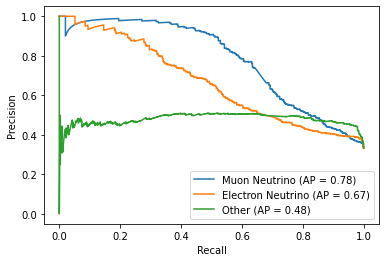

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute precision-recall curve and average precision for each class
precision = {}
recall = {}
average_precision = {}
for i in range(len(classes1)):
    precision[i], recall[i], _ = precision_recall_curve(test_labels2[:, i], flavour_preds[:, i])
    average_precision[i] = average_precision_score(test_labels2[:, i], flavour_preds[:, i])

# Plot precision-recall curve for each class
plt.figure()
for i in range(len(classes1)):
    plt.plot(recall[i], precision[i], label='{} (AP = {:.2f})'.format(classes1[i], average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


**Precision-Recall Curve Background**

The precision-recall (PR) curve is a graphical representation of the performance of a binary classification model, particularly for imbalanced datasets where the number of instances in one class is much greater than the other.

The PR curve plots the precision against the recall for different classification thresholds. Precision is the fraction of true positive (TP) classifications over all positive (TP + false positives (FP)) predictions. Recall (also called sensitivity) is the fraction of true positive predictions out of all the actual positive instances in the dataset. It measures the ability of the model to identify all the positive instances.

The precision-recall curve shows how precision and recall change as the classification threshold is varied. It plots the precision on the y-axis and recall on the x-axis, for different threshold values. The curve is constructed by calculating the precision and recall values for each threshold, and plotting them against each other.

**Plot Comments**

- Muon neutrino precision is the best for all recall scores
- Electron neutrino precision is quite a lot lower than muon neutrino, possibly because they don't have as distinct features
- Other, is as expected the worst precision, since those in the 'other' category don't have defiend trends, since its just a mix of different images which won't have the same pattern.

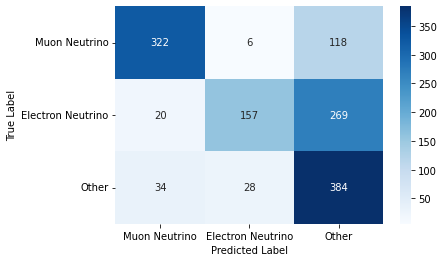

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for each class
cm = confusion_matrix(test_labels2.argmax(axis=1), flavour_preds.argmax(axis=1))

# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=classes1, yticklabels=classes1)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

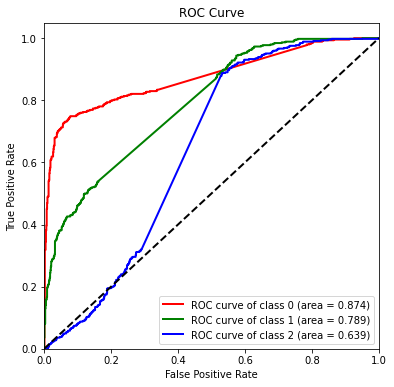

In [ ]:
# Get the ROC curves
fpr = {}
tpr = {}
roc_auc = {}
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels2[:, i], flavour_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each category
plt.figure(figsize=(6,6))
lw = 2
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.3f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Comments**

We can see that class 0 (muon neutrinos) is predicted well, with an AUC of 0.87. Class 2 (electron neutrinos) is predicted less well with AUC = 0.74. This is likely due to the lack of electron neutrino data in the dataset, since muon neutrinos are more abundant. Finally, class 2 sees the lowest AUC, but this is to be expected, since class 2 represents anything that is not a flavour - so the vast range of images would mean that it may be very hard to classify images that look quite different (because they are different).

Note: It is difficult to say whether the ROC curve is a useful measure in this case with three classes. In particular the y=x line corresponding to 0.5 rate is not accurate with 3 classes, since the true 'guessing rate' would be 0.333. Hence the classification report is probably a better metric to use here.

### Testing as a binary classifier

From the above, we see that the third 'other' category is bringing down the classifier accuracy, hence we will revert back to a binary classifier to determine whether the event is muon neutrino or electron neutrino.

In [ ]:
def remove_entries(train_data, train_labels):
  '''
  Function to remove specific entries (=2) in the training data and labels
  Inputs:  train_data, train_labels (raw data)
  Outputs: train_data, train_labels (with the selected entries removed)
  '''
  
  # Set the indices that we wish to remove
  indices = np.where(train_labels == 2)

  # Remove them
  train_data = np.delete(train_data, indices, axis=0)
  train_labels = np.delete(train_labels, indices)

  return train_data, train_labels


def equalize_data2(train_data, train_labels):
    '''
    This function will equalise our dataset among each of the two classification labels
    Inputs; train_data, train_labels
    Outputs; train_data, train_labels
    '''
    # Count the number of samples in each category
    num_samples_0 = np.sum(train_labels == 0)
    num_samples_1 = np.sum(train_labels == 1)

    # Determine the smallest number of samples
    min_samples = min(num_samples_0, num_samples_1)

    # Randomly select min_samples samples from each category
    indices_0 = np.random.choice(np.where(train_labels == 0)[0], size=min_samples, replace=False)
    indices_1 = np.random.choice(np.where(train_labels == 1)[0], size=min_samples, replace=False)

    # Concatenate the selected samples and their labels
    selected_data = np.concatenate([train_data[indices_0], train_data[indices_1]])
    selected_labels = np.concatenate([train_labels[indices_0], train_labels[indices_1]])

    return selected_data, selected_labels


In [ ]:
# Reassign the data labels, for each of our three classes
train_labelsb = reassign_labels(train_labels_raw)
test_labelsb = reassign_labels(test_labels_raw)

train_datab1, train_labelsb1 = remove_entries(train_data_raw, train_labelsb)
train_datab2, train_labelsb2 = equalize_data2(train_datab1, train_labelsb1)

In [ ]:
test_datab1, test_labelsb1 = remove_entries(test_data_raw, test_labelsb)
test_datab2, test_labelsb2 = equalize_data2(test_datab1, test_labelsb1)

Text(0.5, 0, 'Neutrino Flavour Category')

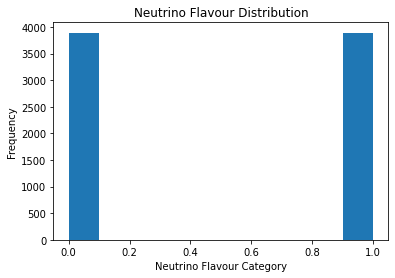

In [ ]:
# View the distribution of flavours
plt.title('Neutrino Flavour Distribution')
#|plt.hist(train_labels_raw)
#plt.hist(train_labelsb1)
plt.hist(train_labelsb2)
plt.ylabel('Frequency')
plt.xlabel('Neutrino Flavour Category')

In [ ]:
# Train data
train_data_b1 = train_datab2[:, :, :, 0]
train_data_b2 = train_datab2[:, :, :, 1]

# Test data
test_data_b1 = test_datab2[:, :, :, 0]
test_data_b2 = test_datab2[:, :, :, 1]

In [ ]:
print(len(train_data_b1))

7782


In [ ]:
def multi_model_flavour_b():

  # Define the inputs
  first_input = Input(shape=(100, 80, 1), name='first_input')
  second_input = Input(shape=(100, 80, 1), name='second_input')

  # Define the convolutional layers for the first input
  conv1_1 = Conv2D(16, (3, 3), activation='relu')(first_input)
  pool1_1 = MaxPooling2D(pool_size=(2, 2))(conv1_1)
  dropout1_1 = Dropout(0.20)(pool1_1)

  # Conv layer
  conv1_2 = Conv2D(16, (3, 3), activation='relu')(dropout1_1)
  pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
  dropout1_2 = Dropout(0.20)(pool1_2)

  # Conv layer
  conv1_3 = Conv2D(16, (3, 3), activation='relu')(dropout1_2)
  pool1_3 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
  dropout1_3 = Dropout(0.20)(pool1_3)

  # Define the convolutional layers for the second input
  conv2_1 = Conv2D(16, (3, 3), activation='relu')(second_input)
  pool2_1 = MaxPooling2D(pool_size=(2, 2))(conv2_1)
  dropout2_1 = Dropout(0.20)(pool2_1)

  # Conv layer
  conv2_2 = Conv2D(16, (3, 3), activation='relu')(dropout2_1)
  pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
  dropout2_2 = Dropout(0.20)(pool2_2)

  # Conv layer
  conv2_3 = Conv2D(16, (3, 3), activation='relu')(dropout2_2)
  pool2_3 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
  dropout2_3 = Dropout(0.20)(pool2_3)

  # Concatenate the output of the convolutional layers
  merged = Concatenate()([dropout1_3, dropout2_3])

  # Flatten the output
  flatten = Flatten()(merged)

  # Define the fully connected layers
  fc1 = Dense(8, activation='relu')(flatten)
  dropout3 = Dropout(0.4)(fc1)
  # Output layer (1 neuron)
  fc2 = Dense(1, activation='sigmoid')(dropout3)

  # Create the model
  multi_model = Model(inputs=[first_input, second_input], outputs=fc2)

  # Compile the model
  multi_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

  return multi_model

multi_model_flavour_b = multi_model_flavour_b()

multi_model_flavour_b.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 first_input (InputLayer)       [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 second_input (InputLayer)      [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_18 (Conv2D)             (None, 98, 78, 16)   160         ['first_input[0][0]']            
                                                                                            

In [ ]:
# Allows early stopping of model training - to avoid overfitting
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

# Train the model on your separate arrays for the first and second images
multi_flavour_b_history = multi_model_flavour_b.fit({'first_input': train_data_b1, 'second_input': train_data_b2}, train_labelsb2, epochs=100, 
                                batch_size=64, shuffle=True, validation_split=0.20, callbacks=[earlystop_callback])

Epoch 1/100
98/98 [==============================] - 5s 20ms/step - loss: 0.6281 - accuracy: 0.6092 - val_loss: 0.5787 - val_accuracy: 0.6924
Epoch 2/100
98/98 [==============================] - 1s 15ms/step - loss: 0.5962 - accuracy: 0.6524 - val_loss: 0.5848 - val_accuracy: 0.6724
Epoch 3/100
98/98 [==============================] - 1s 15ms/step - loss: 0.5905 - accuracy: 0.6573 - val_loss: 0.5617 - val_accuracy: 0.7270
Epoch 4/100
98/98 [==============================] - 1s 15ms/step - loss: 0.5716 - accuracy: 0.6625 - val_loss: 0.5417 - val_accuracy: 0.7315
Epoch 5/100
98/98 [==============================] - 2s 16ms/step - loss: 0.5581 - accuracy: 0.6707 - val_loss: 0.5093 - val_accuracy: 0.7264
Epoch 6/100
98/98 [==============================] - 1s 15ms/step - loss: 0.5511 - accuracy: 0.6723 - val_loss: 0.5131 - val_accuracy: 0.7303
Epoch 7/100
98/98 [==============================] - 1s 15ms/step - loss: 0.5316 - accuracy: 0.6731 - val_loss: 0.4887 - val_accuracy: 0.7322
Epoch 

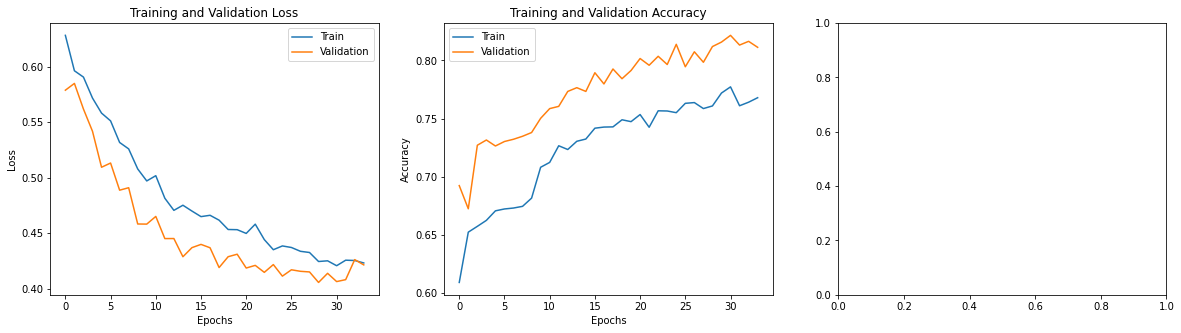

In [ ]:
# View the train/test loss and accuracy
model_plots(multi_flavour_b_history, test_labelsb2, preds=flavour_b_preds, pre_test_labels=None, pre_preds=None, pre=False, roc=False)

In [ ]:
flavour_b_loss, flavour_b_acc = multi_model_flavour_b.evaluate({'first_input': test_data_b1, 'second_input': test_data_b2}, test_labelsb2)
flavour_b_preds = multi_model_flavour_b.predict({'first_input': test_data_b1, 'second_input': test_data_b2})

from sklearn.metrics import classification_report
classes1 = ['Muon Neutrino', 'Electron Neutrino']
report = classification_report(test_labelsb2,  np.round(flavour_b_preds), target_names=classes1)
print(report)

28/28 [==============================] - 0s 3ms/step
                   precision    recall  f1-score   support

    Muon Neutrino       0.92      0.67      0.78       446
Electron Neutrino       0.74      0.94      0.83       446

         accuracy                           0.81       892
        macro avg       0.83      0.81      0.80       892
     weighted avg       0.83      0.81      0.80       892



Classification report shows good precision for muon neutrinos. Electron neutrinos have slightly worse precision but higher recall and f1-score.

In [ ]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labelsb2.flatten().astype(int), flavour_b_preds)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ROC curve shows good performance generally, with AUC of 0.88

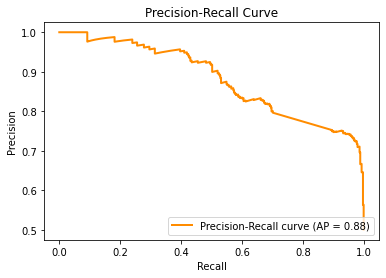

In [ ]:
# Compute the precision-recall curve and average precision
precision, recall, thresholds = precision_recall_curve(test_labelsb2, flavour_b_preds)
avg_precision = average_precision_score(test_labelsb2, flavour_b_preds)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

**Comments**

We can clearly see by all the above metrics that the performance as a binary classifier for flavour classification is better, and that removing the 'other' category is likely more useful as well. 7,700 events for training --> test acc of 0.80.

### 3. A machine learning algorithm to determine 𝑦= lepton energy over neutrino energy

This task involves determining the lepton energy divided by the neutrino energy (like a ratio). Similar to before, this would be a regression task, where the aim is to predict both lepton and neutrino energy.

First data is retrieved with corresponding labels.

In [ ]:
# Get the raw data and labels for interactions
train_data_int, train_labels_int = get_data_and_labels_raw(1, 40, metadata_type='nuenergy')
test_data_int, test_labels_int = get_data_and_labels_raw(41, 45, metadata_type='nuenergy')

# Get the raw data and labels for lepton energy
train_data_lep, train_labels_lep = get_data_and_labels_raw(1, 40, metadata_type='lepenergy')
test_data_lep, test_labels_lep = get_data_and_labels_raw(41, 45, metadata_type='lepenergy')

After testing, it was found that dividing by zero led to NaN in the dataset, which meant the model was not able to train properly. Below a function is defined to remove any data and labels with a NaN.

In [ ]:
def remove_zero_labels(train_data_lep, train_labels_int, train_labels_lep):
  '''
  Function to remove any zero labels and corresponding data, to avoid nans in the data
  Inputs: train_data_lep, train_labels_int, train_labels_lep
  Outputs: final_data, final_labels
  '''
  # find indices where label is not zero
  indices = np.where(train_labels_int == 0)

  # filter data using the indices to keep
  final_data = np.delete(train_data_lep, indices, axis=0)

  # filter labels using the indices to keep
  final_train_labels_int = np.delete(train_labels_int, indices)
  final_train_labels_lep = np.delete(train_labels_lep, indices)

  # perform division
  final_labels = np.divide(final_train_labels_lep, final_train_labels_int)

  return final_data, final_labels

In [ ]:
# Remove the zero labels
train_data, train_labels = remove_zero_labels(train_data_lep, train_labels_int, train_labels_lep)
test_data, test_labels = remove_zero_labels(test_data_lep, test_labels_int, test_labels_lep)

In [ ]:
# check how many ahve been removed
print(train_data_lep.shape, train_labels_lep.shape)
print(train_data.shape,train_labels.shape)

print(test_data_lep.shape, test_labels_lep.shape)
print(test_data.shape,test_labels.shape)

(278155, 100, 80, 2) (278155, 1)
(275749, 100, 80, 2) (275749,)
(34649, 100, 80, 2) (34649, 1)
(34383, 100, 80, 2) (34383,)


In [ ]:
# Train data
train_data_1 = train_data[:, :, :, 0]
train_data_2 = train_data[:, :, :, 1]

# Test data
test_data_1 = test_data[:, :, :, 0]
test_data_2 = test_data[:, :, :, 1]

The regression MVCNN model used before for neutrino energy regression will be re-used in this case since it is a similar problem.

In [ ]:
# Define regression model
def regression_model():

    # Define the inputs
    first_input = Input(shape=(100, 80, 1), name='first_input')
    second_input = Input(shape=(100, 80, 1), name='second_input')

    # Define the convolutional layers for the first input
    conv1_1 = Conv2D(16, (3, 3), activation='relu')(first_input)
    pool1_1 = MaxPooling2D(pool_size=(2, 2))(conv1_1)
    dropout1_1 = Dropout(0.20)(pool1_1)

    conv1_2 = Conv2D(16, (3, 3), activation='relu')(dropout1_1)
    pool1_2 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
    dropout1_2 = Dropout(0.20)(pool1_2)

    conv1_3 = Conv2D(16, (3, 3), activation='relu')(dropout1_2)
    pool1_3 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
    dropout1_3 = Dropout(0.20)(pool1_3)

    # Define the convolutional layers for the second input
    conv2_1 = Conv2D(16, (3, 3), activation='relu')(second_input)
    pool2_1 = MaxPooling2D(pool_size=(2, 2))(conv2_1)
    dropout2_1 = Dropout(0.20)(pool2_1)

    conv2_2 = Conv2D(16, (3, 3), activation='relu')(dropout2_1)
    pool2_2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)
    dropout2_2 = Dropout(0.20)(pool2_2)

    conv2_3 = Conv2D(16, (3, 3), activation='relu')(dropout2_2)
    pool2_3 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
    dropout2_3 = Dropout(0.20)(pool2_3)

    # Concatenate the output of the convolutional layers
    merged = Concatenate()([dropout1_3, dropout2_3])

    # Flatten the output
    flatten = Flatten()(merged)

    # Define the fully connected layers
    fc1 = Dense(8, activation='relu')(flatten)
    dropout3 = Dropout(0.30)(fc1)
    fc2 = Dense(1, activation='linear')(dropout3)

    # Create the model
    multi_model = Model(inputs=[first_input, second_input], outputs=fc2)

    # Compile the model
    multi_model.compile(loss='mean_squared_error' , optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mean_absolute_error'])

    return multi_model

# Trying out the updated regression model from the neutrino energy regression task
regression_model_lep = regression_model2()

# Temporarily commenting this out
#regression_model_lep = regression_model()
regression_model_lep.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 first_input (InputLayer)       [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_47 (Conv2D)             (None, 94, 74, 128)  6400        ['first_input[0][0]']            
                                                                                                  
 max_pooling2d_20 (MaxPooling2D  (None, 15, 12, 128)  0          ['conv2d_47[0][0]']              
 )                                                                                                
                                                                                            

In [ ]:
# Allows early stopping of model training - to avoid overfitting
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

# Train the model on your separate arrays for the first and second images
lep_model_history = regression_model_lep.fit({'first_input': train_data_1, 'second_input': train_data_2}, train_labels, epochs=100, 
                                batch_size=64, shuffle=True, validation_split=0.20, callbacks=[earlystop_callback])

Epoch 1/100
3447/3447 [==============================] - 167s 45ms/step - loss: 0.0570 - mean_absolute_error: 0.1930 - val_loss: 0.0466 - val_mean_absolute_error: 0.1770
Epoch 2/100
3447/3447 [==============================] - 149s 43ms/step - loss: 0.0464 - mean_absolute_error: 0.1774 - val_loss: 0.0449 - val_mean_absolute_error: 0.1745
Epoch 3/100
3447/3447 [==============================] - 148s 43ms/step - loss: 0.0453 - mean_absolute_error: 0.1751 - val_loss: 0.0446 - val_mean_absolute_error: 0.1764
Epoch 4/100
3447/3447 [==============================] - 148s 43ms/step - loss: 0.0447 - mean_absolute_error: 0.1735 - val_loss: 0.0448 - val_mean_absolute_error: 0.1740
Epoch 5/100
3447/3447 [==============================] - 148s 43ms/step - loss: 0.0444 - mean_absolute_error: 0.1729 - val_loss: 0.0440 - val_mean_absolute_error: 0.1746
Epoch 6/100
3447/3447 [==============================] - 147s 43ms/step - loss: 0.0442 - mean_absolute_error: 0.1723 - val_loss: 0.0429 - val_mean_abs

In [ ]:
lep_loss, lep_acc = regression_model_lep.evaluate({'first_input': test_data_1, 'second_input': test_data_1}, test_labels)
lep_preds = regression_model_lep.predict({'first_input': test_data_1, 'second_input': test_data_2})

1075/1075 [==============================] - 6s 5ms/step


**Comments**

The original MVCNN and an updated version, originally used in the neutrino energy regression task, was tested for this task. The original MVCNN is a lot lighter (30k parameters) and gives decent accuracy (MAE = 0.18), whilst the updated version has many more parameters (500k+), but does improve accuracy to around 0.16 to 0.17.

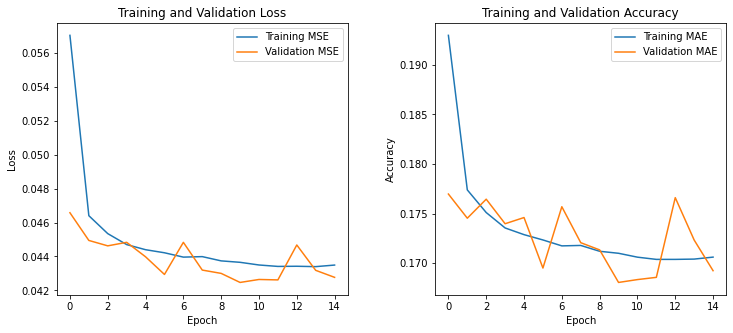

In [ ]:
# Get the training loss and accuracy from the history object
train_loss = lep_model_history.history['loss']
train_acc = lep_model_history.history['mean_absolute_error']

# Get the validation loss and accuracy from the history object
val_loss = lep_model_history.history['val_loss']
val_acc = lep_model_history.history['val_mean_absolute_error']

# Create subplots for the loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'wspace':0.3})

# Plot the training and validation loss
ax1.plot(train_loss, label='Training MSE')
ax1.plot(val_loss, label='Validation MSE')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot the training and validation accuracy
ax2.plot(train_acc, label='Training MAE')
ax2.plot(val_acc, label='Validation MAE')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

plt.show()

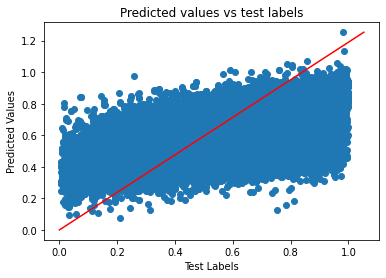

In [ ]:
# Plot the predictions against labels
plt.figure()
plt.scatter(test_labels, lep_preds)
plt.xlabel('Test Labels')
plt.ylabel('Predicted Values')
plt.title('Predicted values vs test labels')

# add y=x line
max_val = max(np.max(test_labels), np.max(lep_preds))
plt.plot([0, max_val-0.2], [0, max_val], color='red')

plt.show()

Looks like there is underprediction in the especially high and low energy range.

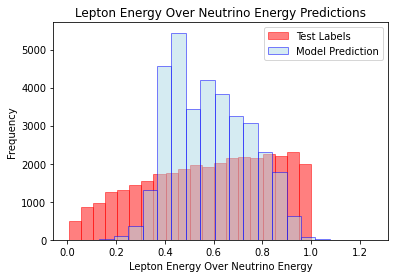

In [ ]:
# define the number of bins
bins = 20
# plot the histograms
plt.hist(test_labels, label='Test Labels', bins=bins, color='red', edgecolor='red', alpha=0.5, linewidth=1.0)
plt.hist(lep_preds, label='Model Prediction', bins=bins, color='lightblue', edgecolor='blue',  alpha=0.5, linewidth=1.0)

# add plot title and axis labels
plt.title("Lepton Energy Over Neutrino Energy Predictions")
plt.xlabel('Lepton Energy Over Neutrino Energy')
plt.ylabel('Frequency')

# add legend
plt.legend()

# display the plot
plt.show()

Looking at the plot of predictions and labels, it can be seen that the predictions tend to have higher and more frequent (2) peaks and exist within a smaller range. The distribution does not very well represent the data. Also we can see where the MAE of approximately 0.18 is coming from: the particularly high and particularly low lepton/neutrino values, where it underpredicts. It overpredicts in the middle range, with two peaks at 0.5 and 0.7, and a third seemingly anomalous peak at 0.6.

<ipython-input-46-fe6f5fc34fa8>:1: RuntimeWarning: invalid value encountered in true_divide
  ex1 = np.divide(train_labels_lep, train_labels_int)


Text(0, 0.5, 'Lepton/Neutrino Energy')

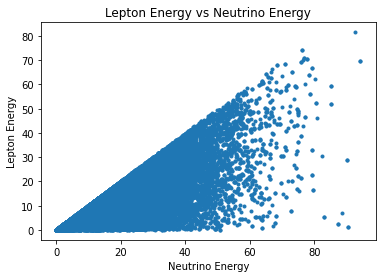

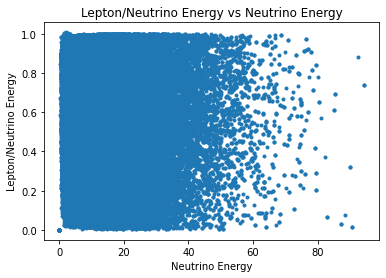

In [ ]:
# Divide the lepton energies by neutrino energies
ex1 = np.divide(train_labels_lep, train_labels_int)
# Change the NaNs
ex2 = np.nan_to_num(ex1, nan=0, posinf=0, neginf=0)

# plot data
plt.figure()
plt.title('Lepton Energy vs Neutrino Energy')
plt.plot(train_labels_int, train_labels_lep, '.')
plt.xlabel('Neutrino Energy')
plt.ylabel('Lepton Energy')

# Plot ratio
plt.figure()
plt.title('Lepton/Neutrino Energy vs Neutrino Energy')
plt.plot(train_labels_int, ex2, '.' )
plt.xlabel('Neutrino Energy')
plt.ylabel('Lepton/Neutrino Energy')

Above we try to see the actual trend between the lepton and neutrino energies.

### 4. A machine learning algorithm to determine the number of protons or pions

I may return to this task later.

### 5. A machine learning algorithm to determine the interaction mode.

Determining the interaction mode is a multi class classification problem, similar to before when determining the neutrino flavours. However, in this case there are more classes.

In [ ]:
# Get the raw data and labels for interactions
train_data_raw, train_labels_raw = get_data_and_labels_raw(1, 30, metadata_type='interaction')
test_data_raw, test_labels_raw = get_data_and_labels_raw(51, 55, metadata_type='interaction')

The data must be separated into images and labels for each interaction mode. There are several as determined by the interaction codes. 

One approach to this may be to use ensemble models. For instance, we may use a previously defined classifier to determine the neutrino flavour first with good accuracy. Next another model can be used to determine the type of interaction e.g. DIS or QE, narrowing down eventually to the interaction mode number.

We may start with a two stage ensemble model:

1. Neutrino Flavour Classification (e.g. Muon, Electron)
2. Interaction Type Classification (e.g. DIS, QE, RES)


Since we already have a flavour classifier from a previous task, we now only need an interaction type classifier. This would be a multi-class classifier. 

First, a dataset consisting of DIS, QE and RES events needs to be created.

In [ ]:
def remove_entries_interaction(train_data, train_labels):
    """
    Removes entries from the training data and labels that correspond
    to specific label values.

    Args:
    train_data: NumPy array containing the training data
    train_labels: NumPy array containing the corresponding labels

    Returns:
    Tuple containing the modified training data and labels
    """
    
    # Get the indices of the elements in train_labels that match any of the specified numbers
    indices = np.where(np.isin(train_labels, [3,7,8,9,10,11,13,14,15,16,12]))
    
    # Remove the corresponding entries from the training data and labels
    train_data = np.delete(train_data, indices, axis=0)
    train_labels = np.delete(train_labels, indices)
    
    # Return the modified training data and labels
    return train_data, train_labels

In [ ]:
train_data_ints, train_labels_ints = remove_entries_interaction(train_data_raw, train_labels_raw)
test_data_ints, test_labels_ints = remove_entries_interaction(test_data_raw, test_labels_raw)

**DEFINING CLASSES**

- Type: QE, Label: 0
- Type: RES: Label: 1
- Type: DIS, Label: 2

In [ ]:
def label_entries_interaction(train_labels):
    """
    Changes the values of the entries in train_labels based on the following conditions:
    If the entry is 0 or 4, change it to 0.
    If the entry is 1 or 5, change it to 1.
    If the entry is 2 or 6, change it to 2.

    Args:
    train_labels: NumPy array containing the training labels

    Returns:
    NumPy array containing the modified training labels
    """
    # Use np.where to replace the labels based on the given conditions
    train_labels = np.where(train_labels == 0, 0, train_labels)
    train_labels = np.where(train_labels == 4, 0, train_labels)
    train_labels = np.where(train_labels == 1, 1, train_labels)
    train_labels = np.where(train_labels == 5, 1, train_labels)  
    train_labels = np.where(train_labels == 2, 2, train_labels)
    train_labels = np.where(train_labels == 6, 2, train_labels)

    # Return the modified training labels
    return train_labels


In [ ]:
train_labels = label_entries_interaction(train_labels_ints)
test_labels = label_entries_interaction(test_labels_ints)

(array([ 26458.,      0.,      0.,      0.,      0.,  39669.,      0.,
             0.,      0., 114170.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

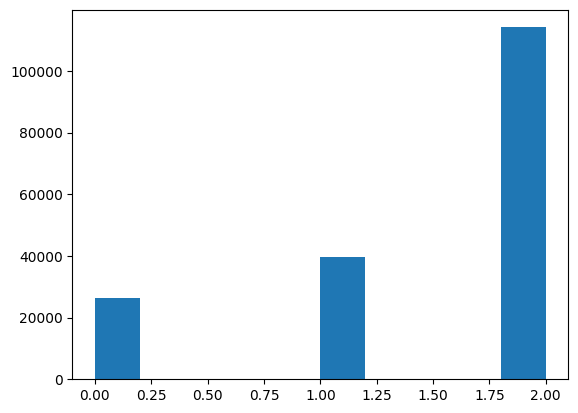

In [ ]:
plt.hist(train_labels)

Looks like there is a skew towards DIS events. QE events are the least common.

In [ ]:
def equalize_data(train_data, train_labels):
    '''
    This function will equalize our dataset among each of the three classification labels
    Inputs; train_data, train_labels
    Outputs; train_data, train_labels
    '''
    # Count the number of samples in each category
    num_samples_0 = np.sum(train_labels == 0)
    num_samples_1 = np.sum(train_labels == 1)
    num_samples_2 = np.sum(train_labels == 2)

    # Determine the smallest number of samples
    min_samples = min(num_samples_0, num_samples_1, num_samples_2)

    # Randomly select min_samples samples from each category
    indices_0 = np.random.choice(np.where(train_labels == 0)[0], size=min_samples, replace=False)
    indices_1 = np.random.choice(np.where(train_labels == 1)[0], size=min_samples, replace=False)
    indices_2 = np.random.choice(np.where(train_labels == 2)[0], size=min_samples, replace=False)

    # Concatenate the selected samples and their labels
    selected_data = np.concatenate([train_data[indices_0], train_data[indices_1], train_data[indices_2]])
    selected_labels = np.concatenate([train_labels[indices_0], train_labels[indices_1], train_labels[indices_2]])

    # Shuffle the selected data and labels (to make sure that the classes aren't in order in the dataset)
    shuffle_indices = np.random.permutation(len(selected_labels))
    selected_data = selected_data[shuffle_indices]
    selected_labels = selected_labels[shuffle_indices]

    return selected_data, selected_labels

In [ ]:
train_data2, train_labels2 = equalize_data(train_data_ints, train_labels)
test_data2, test_labels2 = equalize_data(test_data_ints, test_labels)

(array([26458.,     0.,     0.,     0.,     0., 26458.,     0.,     0.,
            0., 26458.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

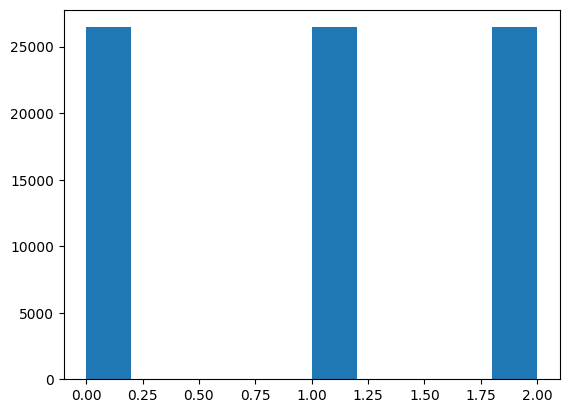

In [ ]:
plt.hist(train_labels2)

In [ ]:
import tensorflow.keras.utils as np_utils

# one hot encode 
train_labels1 = np_utils.to_categorical(train_labels2, num_classes=3)
test_labels1 = np_utils.to_categorical(test_labels2, num_classes=3)

In [ ]:
# Train data
train_data_1 = train_data2[:, :, :, 0]
train_data_2 = train_data2[:, :, :, 1]

# Test data
test_data_1 = test_data2[:, :, :, 0]
test_data_2 = test_data2[:, :, :, 1]

In [ ]:
print(np.shape(train_data_1))
print(np.shape(test_data_1))

(79374, 100, 80)
(13032, 100, 80)


The multi-class classifier model is defined below. Notable changes to the original MVCNN include: loss is now categorical crossentropy, output activation is softmax, with 3 output nodes.

Further changes were made, inspired by the model proposed by A. Aurisano et al. [2]. 

**SUMMARY OF MODEL**

- The first convolutional layer conv1_1 has 64 filters of size 7 x 7, with 'same' padding and stride of 2 x 2. This is a common choice for the first layer in a CNN, as it allows the model to learn low-level features while reducing the dimensionality of the input. The 'same' padding ensures that the output feature maps have the same spatial dimensions as the input, while the stride of 2 x 2 reduces the size of the feature maps by half.

- The output of conv1_1 is then passed through a max pooling layer pool1_1 with a pool size of 2 x 2 and stride of 2 x 2. This layer downsamples the feature maps further, which helps to reduce the computation required by the model and allows it to learn more abstract features.

- A local response normalization (LRN) layer lrn1_1 is then applied to the output of pool1_1. LRN is a technique used to improve the generalization of the model and reduce overfitting, as it normalizes the values in each feature map based on the values in neighboring maps at the same spatial position.

- Two more convolutional layers conv1_2 and conv1_3 are applied to the output of lrn1_1. These layers use smaller filter sizes (1 x 1 and 3 x 3) to learn more complex features from the input.

- Another LRN layer lrn1_2 is applied to the output of conv1_3 before passing it through a max pooling layer pool1_2 with a pool size of 3 x 3 and stride of 2 x 2.

- Two inception modules incep1_1 and incep1_2 are then applied to the output of pool1_2. Inception modules are a type of layer that contains multiple convolutional filters of different sizes and are designed to capture a variety of features at different scales. 16 filters were used for all layers in the module.

- The output of the last inception module incep1_2 is then passed through another max pooling layer pool1_3 with a pool size of 2 x 2. This layer further downsamples the feature maps and helps to capture the most salient features.

In [ ]:
from keras.layers import Lambda

def inception_module(layer_in, filter1x1, filter3x3, filter5x5, filter_pool):
    # 1x1 convolution
    conv1 = Conv2D(filter1x1, (1,1), padding='same', activation='relu')(layer_in)
    
    # 3x3 convolution
    conv3 = Conv2D(filter3x3, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(filter3x3, (3,3), padding='same', activation='relu')(conv3)

    # 5x5 convolution
    conv5 = Conv2D(filter5x5, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(filter5x5, (5,5), padding='same', activation='relu')(conv5)
    
    # Pooling
    pool = MaxPooling2D((2,2), strides = 1, padding='same')(layer_in)
    pool = Conv2D(filter_pool, (1,1), padding='same', activation='relu')(pool)

    # concatenate filters, assumes filters/channels last
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)

    return layer_out


# Define multi classification model
def interaction_model():

  # Define the inputs
  first_input = Input(shape=(100, 80, 1), name='first_input')
  second_input = Input(shape=(100, 80, 1), name='second_input')

  # Define the convolutional layers for the first input
  conv1_1 = Conv2D(64, (7, 7), activation='relu', padding='same', strides=(2,2))(first_input)
  pool1_1 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(conv1_1)
  lrn1_1 = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75))(pool1_1)
  
  
  conv1_2 = Conv2D(64, (1, 1), activation='relu', padding='same')(lrn1_1)
  conv1_3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1_2)

  lrn1_2 = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75))(conv1_3)
  pool1_2 = MaxPooling2D(pool_size=(3, 3), strides=(2,2))(lrn1_2)
  
  incep1_1 = inception_module(pool1_2, 16, 16, 16, 16)
  incep1_2 = inception_module(incep1_1, 16, 16, 16, 16)

  pool1_3 = MaxPooling2D(pool_size=(2, 2))(incep1_2)
  incep1_3 = inception_module(pool1_3, 16, 16, 16, 16)


  # Define the convolutional layers for the second input
  conv2_1 = Conv2D(64, (7, 7), activation='relu', padding='same', strides=(2,2))(second_input)
  pool2_1 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(conv2_1)
  lrn2_1 = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75))(pool2_1)
  
  conv2_2 = Conv2D(64, (1, 1), activation='relu', padding='same')(lrn2_1)
  conv2_3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2_2)

  lrn2_2 = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75))(conv1_3)
  pool2_2 = MaxPooling2D(pool_size=(3, 3), strides=(2,2))(lrn2_2)
  
  incep2_1 = inception_module(pool2_2, 16, 16, 16, 16)
  incep2_2 = inception_module(incep2_1, 16, 16, 16, 16)

  pool2_3 = MaxPooling2D(pool_size=(2, 2))(incep2_2)
  incep2_3 = inception_module(pool2_3, 16, 16, 16, 16)

  # Concatenate the output of the convolutional layers
  merged = Concatenate()([incep1_3, incep2_3])

  # Flatten the output
  flatten = Flatten()(merged)

  # Define the fully connected layers
  fc1 = Dense(256, activation='relu')(flatten)
  dropout3 = Dropout(0.50)(fc1)
  fc2 = Dense(3, activation='softmax')(dropout3)

  # Create the model
  multi_model = Model(inputs=[first_input, second_input], outputs=fc2)

  # Compile the model
  multi_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

  return multi_model

interaction_model = interaction_model()

interaction_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 first_input (InputLayer)       [(None, 100, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_68 (Conv2D)             (None, 50, 40, 64)   3200        ['first_input[0][0]']            
                                                                                                  
 max_pooling2d_21 (MaxPooling2D  (None, 25, 20, 64)  0           ['conv2d_68[0][0]']              
 )                                                                                                
                                                                                            

In [ ]:
# Allows early stopping of model training - to avoid overfitting
earlystop_callback = EarlyStopping(monitor='val_loss',mode ="min", patience=5, restore_best_weights = True)

# Train the model on your separate arrays for the first and second images
interaction_model_history = interaction_model.fit({'first_input': train_data_1, 'second_input': train_data_2}, train_labels1, epochs=100, 
                                batch_size=32, shuffle=True, validation_split=0.20, callbacks=[earlystop_callback])

Epoch 1/100
1985/1985 [==============================] - 75s 26ms/step - loss: 1.0451 - accuracy: 0.4401 - val_loss: 1.0267 - val_accuracy: 0.4686
Epoch 2/100
1985/1985 [==============================] - 50s 25ms/step - loss: 1.0157 - accuracy: 0.4710 - val_loss: 1.0063 - val_accuracy: 0.4775
Epoch 3/100
1985/1985 [==============================] - 52s 26ms/step - loss: 1.0012 - accuracy: 0.4842 - val_loss: 1.0003 - val_accuracy: 0.4820
Epoch 4/100
1985/1985 [==============================] - 51s 26ms/step - loss: 0.9887 - accuracy: 0.4934 - val_loss: 0.9960 - val_accuracy: 0.4918
Epoch 5/100
1985/1985 [==============================] - 46s 23ms/step - loss: 0.9813 - accuracy: 0.5001 - val_loss: 0.9969 - val_accuracy: 0.4891
Epoch 6/100
1985/1985 [==============================] - 46s 23ms/step - loss: 0.9733 - accuracy: 0.5059 - val_loss: 0.9931 - val_accuracy: 0.4898
Epoch 7/100
1985/1985 [==============================] - 50s 25ms/step - loss: 0.9680 - accuracy: 0.5111 - val_loss: 0

**Comments**

In this case, the initial MVCNN was tested. However, the original model was no good at classifying QE, RES and DIS events, with 0.33 accuracy (as good as random guessing). This led to testing of different network parameters (filters, neurons etc.). Essentially it was found that many more parameters were needed to improve the accuracy - as detailed in the text cell before the model is defined.

Training and validation accuracy seems to plateau at around 0.5 with this network. Further testing may involve using the inception module in each of the branches, given that there appears to be sufficient features so it would be useful.

**Testing MVCNN with Inception modules**

Furthermore, a range of inception modules (up to 3) were tested in both branches of the MVCNN. This improved initial training performance, however the plateau at 50% accuracy still remained.

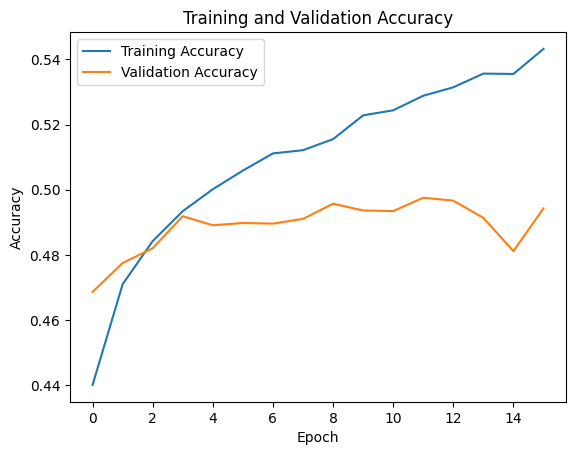

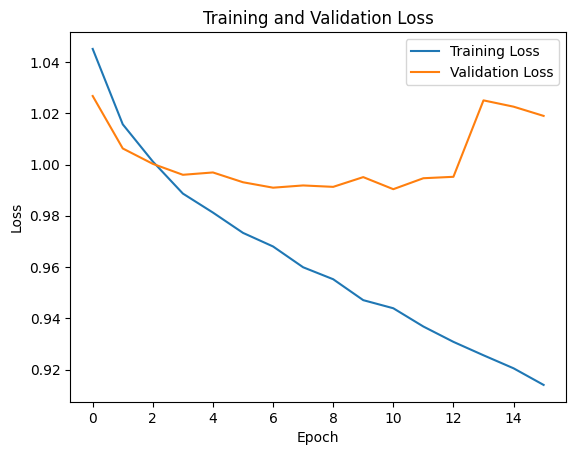

In [ ]:
# Get training and validation accuracy and loss
train_acc = interaction_model_history.history['accuracy']
val_acc = interaction_model_history.history['val_accuracy']
train_loss = interaction_model_history.history['loss']
val_loss = interaction_model_history.history['val_loss']

# Plot accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = interaction_model.evaluate({'first_input': test_data_1, 'second_input': test_data_2}, test_labels1)

print('Test Accuracy:', test_accuracy)

408/408 [==============================] - 3s 6ms/step - loss: 0.9942 - accuracy: 0.4861
Test Accuracy: 0.4861111044883728


408/408 [==============================] - 3s 5ms/step


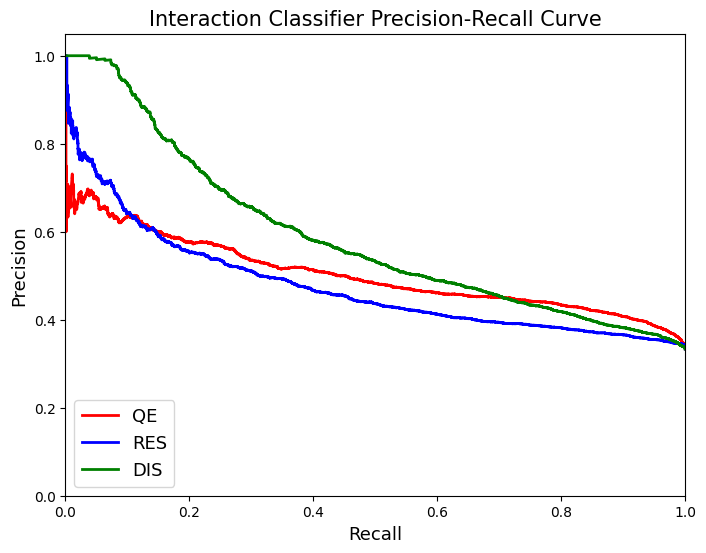

In [ ]:
# Get the predicted probabilities for each class
y_pred = interaction_model.predict({'first_input': test_data_1, 'second_input': test_data_2})

# Get the true labels in one-hot format
y_true = np.zeros_like(y_pred)
y_true[np.arange(len(y_pred)), np.argmax(test_labels1, axis=1)] = 1

# Compute precision, recall, and threshold for each class
precision = dict()
recall = dict()
thresholds = dict()
class_labels = {0: 'QE', 1: 'RES', 2: 'DIS'}
colors = ['r', 'b', 'g']
for i, label in class_labels.items():
    precision[label], recall[label], thresholds[label] = precision_recall_curve(y_true[:, i], y_pred[:, i])

# Plot the precision-recall curves for each class
fig, ax = plt.subplots(figsize=(8, 6))
for i, (label, color) in enumerate(zip(class_labels.values(), colors)):
    ax.plot(recall[label], precision[label], color=color, lw=2, label=label)
ax.set_title('Interaction Classifier Precision-Recall Curve', fontsize=15)
ax.set_xlabel('Recall', fontsize=13)
ax.set_ylabel('Precision', fontsize=13)
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
ax.legend(loc="lower left", fontsize=13)
plt.show()

In [ ]:
# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(np.argmax(test_labels1, axis=1), y_pred_labels))

              precision    recall  f1-score   support

           0       0.46      0.64      0.54      4344
           1       0.47      0.38      0.42      4344
           2       0.55      0.44      0.49      4344

    accuracy                           0.49     13032
   macro avg       0.49      0.49      0.48     13032
weighted avg       0.49      0.49      0.48     13032



Looks like best f1-score is for class 0, QE, followed by DIS. This is visualised in the precision-recall curve.

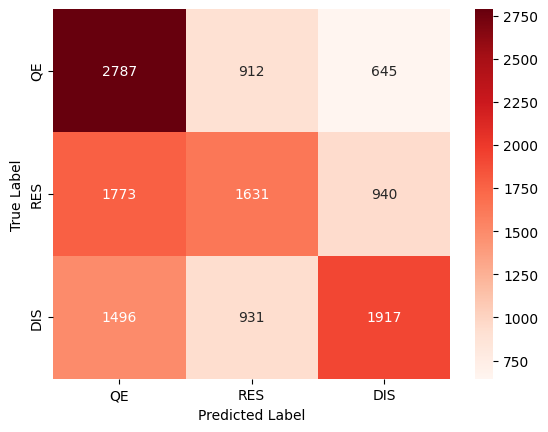

In [ ]:
import seaborn as sns
# Compute confusion matrix for each class
cm = confusion_matrix(test_labels1.argmax(axis=1), y_pred.argmax(axis=1))
classes2 = ['QE', 'RES', 'DIS']
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=classes2, yticklabels=classes2)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix shows the predicted trues and falses.

**Comments**

Looking at the performance of this classifier, it seems that it is not sufficient to be used in an ensemble to determine interaction modes, i.e. assuming our flavour classifier remains at 0.80 accuracy, and this model is 0.50 accuracy, then the combined accuracy may be 0.80 * 0.50, which I would not say is high enough to make it worthwhile.

Looking at each precision-recall curve:

- QE PR curve shows relatively lower performance compared to RES until 0.2 recall, and low performance compared to DIS up to 0.7 recall. This is also somewhat surprising as I would have assumed 'clean' QE events are easier to classify than 'messy' RES and DIS events.

- QE PR curve has a less steep gradient compared to all other curves, and precision decreases less over 0 to 1 recall. RES and DIS have similar gradients and tend to decrease together, suggesting these events could 'look' similar to the classifier.

- In the region of 0.8 to 1.0 recall, QE has the highest precision

## Conclusion

Three models were tested on muon-neutrino charged-current event classification, trained on 164,000 event image pairs, similar to those detected by the NOvA experiment. A multi-view CNN model was determined as the most efficient, with accuracy of 0.8391 and two orders of magnitude fewer total parameters than the compared models. Performance was tested on a variety of datasets e.g. DIS, QE, high and low neutrino energy and high and low muon energy, resulting in satisfactory performance ($>$ 0.80 accuracy). The MVCNN was adapted to other applications: regression of neutrino energy (MAE: 6.52), regression of the lepton to neutrino energy ratio (MAE: 0.18),  binary classification of neutrino flavour (0.8083 accuracy) and a multi-classification of interaction type (0.50 accuracy).

The MVCNN model may be improved by investigating different strategies of fusing the visual features from each branch. For instance, fusing convolutional feature maps at different network depths, fusion of bottleneck latent representations prior to classification and score fusion may be considered, as proposed by M. Seeland et al.. Additionally, transfer learning may result in accuracy improvements for the classifier. For instance, work by A. Aurisano et al. used a fine-tuned ResNet18 model resulted in an F1 score of 0.896. Future research may wish to consider the application of the presented MVCNN model on similar neutrino image datasets e.g. for supernova neutrino classification, or to determine different characteristics such as number of protons or pions and interaction mode for the event.


## References

[1] Grandini, M., Bagli, E. and Visani, G. (2020). Metrics for Multi-Class Classification: an Overview. arXiv:2008.05756 [cs, stat]. [online] Available at: https://arxiv.org/abs/2008.05756.
‌

[2] Szegedy, C., Liu, W., Jia, Y., Sermanet, P., Reed, S., Anguelov, D., Erhan, D., Vanhoucke, V. and Rabinovich, A. (2014). Going Deeper with Convolutions. [online] arXiv.org. Available at: https://arxiv.org/abs/1409.4842.

[3] Stack Overflow. (n.d.). machine learning - Higher validation accuracy, than training accurracy using Tensorflow and Keras. [online] Available at: https://stackoverflow.com/questions/43979449/higher-validation-accuracy-than-training-accurracy-using-tensorflow-and-keras [Accessed 29 Mar. 2023].
‌

[4] Seeland, M. and Mäder, P. (2021). Multi-view classification with convolutional neural networks. PLOS ONE, 16(1), p.e0245230. doi:https://doi.org/10.1371/journal.pone.0245230.
‌

[5] Fischer, P., Dosovitskiy, A. and Brox, T. (n.d.). Image Orientation Estimation with Convolutional Networks. [online] Available at: https://lmb.informatik.uni-freiburg.de/Publications/2015/FDB15/image_orientation.pdf.
‌
‌